# 1. Longest Common Subsequences (LCSs) Code

### 1. Preprocessing and Validation
The `validate_and_process_string()` function ensures that input strings are clean and ready for processing. It uses a **list** as the main data structure for storing valid characters during the conversion process. Lists are chosen here because they provide efficient appends ($O(1)$) and are later joined into a string. This ensures the preprocessing step is both fast and straightforward.

The function converts all characters to uppercase (Since Genes are denoted in uppercase format probably) to eliminate case sensitivity and filter out invalid characters. Any invalid characters (such as numbers or symbols) are reported to the user to avoid downstream errors.

---

### 2. Dynamic Programming for LCS
The heart of the solution lies in the **dynamic programming (DP)** approach. The `lcs_table()` function constructs a **2D array (list of lists)** as a lookup table. Each cell $[i][j]$ in this table stores the length of the LCS for the substrings $x[:i]$ and $y[:j]$.

### Why Bottom-Up DP?
The **bottom-up dynamic programming approach** was chosen over a **top-down (recursive)** approach for this problem due to specific trade-offs between the two methods.

1. **Scalability**:
   - The bottom-up approach handles large strings efficiently without risking stack overflow. This is particularly important for problems like LCS, where input sizes can be significant.
2. **Efficiency**:
   - Bottom-up DP eliminates function call overhead associated with recursion, making it faster for large inputs.
3. **Tabulation Support**:
   - Bottom-up DP works seamlessly with tabulation, where the table acts as a roadmap to solve the problem from the ground up.

This will be discussed in greater detail below, but the use of a table is fundamental to ensuring the efficiency and correctness of the algorithm.

### Why Tables Are Crucial in Tabulation
The **tabulation** method used in bottom-up DP relies heavily on tables (or 2D arrays) to systematically store the results of smaller subproblems. This approach ensures:
1. Overlapping subproblems are computed only once, and the results are reused, saving computational time.
2. The table allows direct access to precomputed values with $O(1)$ indexing, enabling efficient updates and queries.

### Why Arrays?
- **2D Arrays (List of Lists)**:
  - Arrays are ideal for the DP table because they provide efficient indexing ($O(1)$) for accessing and updating values.
  - The 2D structure allows us to systematically store results for overlapping subproblems, which are reused as we build the solution.

- **Sets for Uniqueness**:
  - During backtracking in `find_all_lcs()`, we use a **set** to store all unique LCSs. This ensures that duplicate subsequences are removed efficiently.
  - The use of a set avoids manual duplicate checks and provides $O(1)$ average complexity for insertions, which is crucial when dealing with multiple LCSs in cases of repeated characters.


---

### 3. Explanation of the Algorithm

### DP Table Construction
The algorithm begins by creating a 2D array (the DP table) to store results for overlapping subproblems:
1. **Initialization**:
   - The table is initialized to zeros, with dimensions $(m+1) \times (n+1)$, where $m$ and $n$ are the lengths of the input strings.
2. **Filling the Table**:
   - For each character pair from the input strings:
     - If the characters match, the value at $[i][j]$ is set to $dp[i-1][j-1] + 1$, extending the LCS by one.
     - If they do not match, the value is the maximum of the top or left cell ($\max(dp[i-1][j], dp[i][j-1])$), representing the longest LCS so far.
3. **Result**:
   - By repeating the process above and solving the subproblems of choosing the top or left cell, we end up with the bottom-right cell of the table containing the length of the LCS for the full strings, which is the final result of the DP computation.
---
### Backtracking to Extract LCS

The `find_all_lcs()` function performs a top-down recursive backtracking through the lookup table to find all LCS sequences.


- The precomputed DP table acts as a guide, restricting the recursion to valid paths only, avoiding unnecessary exploration of the search space.

- Recursive backtracking dynamically generates subsequences without the need to store all intermediate results in memory, reducing space complexity compared to a fully bottom-up approach.

### Backtracking Steps

#### 1. Character Matches
- If `x[i−1] == y[j−1]`, the character is added to the current LCS, and the recursion continues with smaller substrings (`m−1`, `n−1`).

#### 2. Character Mismatches
- If characters don’t match, the recursion explores both directions (up or left in the table) where the LCS length remains unchanged.

#### 3. Ensuring Uniqueness
- A set is used to store all LCS sequences during recursion, ensuring that duplicates are removed efficiently.

#### Why Recursion is Feasible for Backtracking?

- In backtracking, recursion only follows valid paths in the lookup table, where the LCS length remains consistent.
- The recursion depth corresponds to the LCS length (`l`), which is significantly smaller than the sizes of the input strings (`m` or `n`).  
  For example:
  - Even if `m` and `n` are 1,000 characters, `l` might be only 10, resulting in much shallower recursion.
---

### 4. Trade-offs in the Design

### Top-Down vs. Bottom-Up in DP `lcs_table`
The choice between a top-down (recursive) and bottom-up (iterative) approach involved weighing the following factors:

#### Top-Down Approach
- **Advantages**:
  - Mirrors the problem structure, making the logic more intuitive.
  - Solves subproblems on demand, which can reduce memory usage for sparse problems.
- **Disadvantages**:
  - **Stack Overflow Risk**: Recursive calls can exceed the maximum call stack depth for large inputs, especially for strings with lengths exceeding several thousand characters.
  - **Overhead**: Recursive calls involve function call overhead, which can degrade performance for large-scale problems.
  - **Debugging Challenges**: Understanding and debugging recursive flows can be more complex compared to iterative solutions.

#### Bottom-Up Approach
- **Advantages**:
  - Avoids stack overflow by using an iterative structure.
  - Eliminates recursive function call overhead, making it more efficient for large-scale problems.
  - Works well with tabulation, as the entire table is constructed systematically.
- **Disadvantages**:
  - Requires computing all subproblems, even those that may not be used directly in the final solution.
  - Higher memory usage if not optimized with space-saving techniques like rolling arrays.

### Why Bottom-Up for This Problem?
1. **Problem Structure**:
   - The LCS problem benefits from tabulation since all subproblem results are ultimately needed to construct the solution.
2. **Scalability**:
   - For large strings, bottom-up DP handles the problem efficiently without risking stack overflow.
3. **Efficiency**:
   - By eliminating recursive calls and leveraging tabulation, the bottom-up approach reduces both time and space complexity for this problem.

---
## Overall Solution Strategy Combination
### Why Not Fully Bottom-Up?

While bottom-up tabulation is efficient for constructing the lookup table, extending it to extract all LCS sequences in `find_all_lcs()` function introduces significant challenges:

### 1. Space Complexity
- Storing all possible subsequences in the DP table would drastically increase memory usage, especially for inputs with multiple equally long LCSs.

#### 2. Complexity
- Managing lists of subsequences in each cell of the table is more complicated and computationally expensive.

#### 3. Readability
- The iterative logic for extracting LCS sequences becomes harder to follow and debug compared to recursive backtracking.

#### 4. Scalability
- A fully bottom-up approach would require storing intermediate results for all subsequences, leading to a combinatorial explosion in memory usage.

---

### Why Not Fully Top-Down?

Using recursion for both LCS length computation and backtracking has its drawbacks:

#### 1. Stack Overflow Risk
- Computing the LCS length recursively for large strings risks exceeding the maximum stack depth, especially without memoization.

#### 2. Redundant Computations
- A top-down approach would recompute overlapping subproblems multiple times unless memoization is applied, which introduces additional overhead.

#### 3. Performance
- Even with memoization, recursive function call overhead makes it less efficient than a bottom-up approach for computing LCS lengths.

---

### 5. Handling Edge Cases
The code robustly handles several edge cases:
1. **Empty Strings**:
   - If either string is empty, the function immediately returns an LCS length of 0 and no subsequences.
2. **No Common Characters**:
   - For completely mismatched strings (e.g., "AAA" and "BBB"), the algorithm returns an LCS length of 0.
3. **Multiple Equally Long LCSs**:
   - For strings like "ABAB" and "BABA," the algorithm ensures all valid LCSs are included, and duplicates are removed using a set.

> In Testing my Program, I tested each function on its own rather than checking the final outcome to ensure that all functions work as expected 

## 2. LCS 2D Matrix

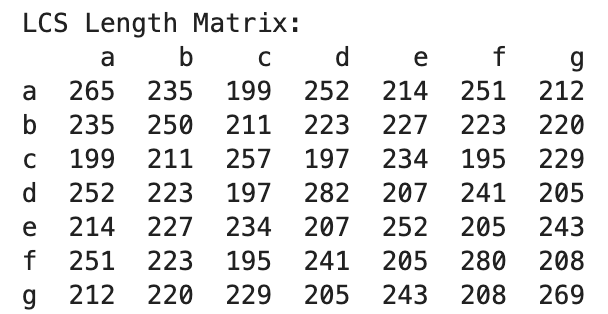

### 2.c.i. Inferring Strong Relationships Between Strings:
To determine which strings are more strongly related, we can analyze the Longest Common Subsequence (LCS) Length Matrix. Higher LCS values between two strings indicate stronger relationships because they share more subsequences in common. For example:
- `d` and `a` have an LCS length of 252, suggesting a strong relationship.
- `f` and `a` have a similarly high LCS value of 251.
- Conversely, `c` and `a` (199) or `f` and `c` (195) have lower values, indicating weaker relationships.

From this analysis:
- Strings with the highest pairwise LCS values could indicate parent-child relationships.
- Weaker relationships might suggest more distant ancestry.

---

### 2.c.ii. Inferring the Genealogy Binary Tree:
The genealogy binary tree can be inferred using these steps:

1. **Root Identification**:
   - The root (grandparent string) should generally have the highest average LCS with all other strings, as it is the most central ancestor.
   - Example: `a` has a high average LCS, making it a good candidate for the root.

2. **Parent-Child Pairing**:
   - Pair strings based on descending LCS values, ensuring that child strings are matched with their closest parent.

3. **Tree Reconstruction**:
   - Start with the root and recursively group strings into parent-child relationships by selecting the next strongest connections.

<u>**We will talk about that more in the Greedy Approach Below**<u>

## 3.1 Greedy Genealogy Solution Explanation




### Problem Overview
The goal is to construct a **Perfect** genealogy tree for a set of genes (strings) based on their **Longest Common Subsequence (LCS)** matrix. The tree includes:
1. **One grandparent node**.
2. **Two parent nodes**.
3. **Children nodes** assigned to parents.

This task is solved using a **greedy algorithm** that focuses on direct local relationships between the genes, leveraging **LCS scores** to infer the genealogy structure step by step.

---
### Elements of a Greedy Algorithm (Cormen et al., 2022)

A greedy algorithm follows a specific methodology to solve problems by building a solution incrementally. The primary elements include:

1. **Greedy Choice Property**:  
   The solution is constructed by making local, optimal choices at each step without revisiting earlier decisions.

2. **Optimal Substructure**:  
   The global optimal solution can be achieved by combining locally optimal solutions to subproblems.

3. **Feasibility**:  
   Every step adheres to the problem constraints, ensuring that the solution remains valid throughout.

4. **No Backtracking**:  
   Once a choice is made, it cannot be undone, focusing on efficiency by avoiding exhaustive exploration.

---

### Satisfying the Greedy Elements in the Algorithm

1. **Greedy Choice Property**:  
    At every step, the algorithm makes the best local decision:
    - **Grandparent Selection**: The string with the highest average LCS score is chosen.
    - **Parent Selection**: The two nodes with the highest LCS scores relative to the grandparent are selected as parents.
    - **Child Assignment**: Each child is assigned to a parent based on its highest LCS score with that parent.
    
    These choices maximize immediate relationships without considering how they might affect the overall tree structure.

2. **Optimal Substructure**:  
The problem of constructing the tree can be divided into subproblems:
    - Assigning parents based on their relationships with the grandparent.
    - Assigning children based on their relationships with parents.

Solving these subproblems optimally at each step contributes to the overall structure.

3. **Feasibility**:  
The algorithm adheres to the constraints of the problem:
    - A single grandparent node.
    - Two parent nodes.
    - Children nodes assigned to parents based on their LCS scores.

Each step respects these structural requirements.

4. **No Backtracking**:  
Once a grandparent, parent, or child is selected, the decision is final. The algorithm does not revisit earlier choices, ensuring computational efficiency.

---

### Greedy Strategy Explanation

1. **Local Decisions at Each Step**:
   as explained above in the  **Greedy Choice Property** section.

2. **Maximization of Immediate Relationships**:
   - At each step, the algorithm seeks to maximize **LCS scores** between a node and its immediate neighbors (parent and its children):
     - For example, the grandparent maximizes its average relationship with the rest of the nodes.
     - Parents and children are assigned to maximize their pairwise LCS scores.

3. **Avoidance of Global Computations**:
   - The greedy strategy does not attempt to evaluate the overall structure of the tree. Instead, it operates on **local information** to reduce computational complexity:
     - The algorithm proceeds hierarchically and sequentially, ensuring that each level (grandparent, parents, children) is built based on local criteria and according to the previous choices of nodes, rather than attempting to optimize the entire tree at once.

     - Decisions are made step-by-step without backtracking or considering future assignments or different combinations of the overall tree structure.
     - This minimizes the need for exhaustive search or global optimization techniques.

4. **Trade-Offs of the Greedy Approach**:
   - **Efficiency**: The algorithm is computationally efficient, making it suitable for larger datasets where global optimization might be impractical.
   - **Simplicity**: By focusing on local relationships, the algorithm is straightforward to implement and understand.
   - **Sacrificed Global Optimality**:
     - The greedy approach may miss the globally optimal genealogy structure because it does not evaluate relationships beyond the current step.
     - For instance, a child node might have a stronger relationship with a non-parent node, but this is ignored if the child is assigned to its immediate parent based on local LCS scores.


---

### The Trade-Off: Sorting vs. MaxHeap

The algorithm could have relied on **sorting** to identify the top candidates (parents or children) based on their LCS scores. Sorting provided a straightforward way to rank nodes in descending order of relevance. The steps involved:

1. **Generate Candidate Scores**:
   - For parent selection, LCS scores with the grandparent were calculated.
   - For child assignment, LCS scores with the parent were calculated.

2. **Sort Candidates**:
   - Candidates were sorted in descending order of their LCS scores using Python’s built-in sorting function, which has a time complexity of `O(n log n)`.

3. **Select Top `k` Candidates**:
   - From the sorted list, the top `k = 2` candidates were chosen for assignment.

### Limitations of Sorting
1. **Computational Overhead**:
   - Sorting the entire list of candidates is computationally expensive, especially when only the top `k` candidates are needed.

2. **Inefficiency for Partial Results**:
   - Sorting processes all elements, even though the algorithm only requires the top `k` elements, leading to unnecessary computations.

---

To address the inefficiency of sorting, we replaced it with a **heap-based selection** for both parent and child candidates. This change improves the algorithm's performance by focusing only on the required top elements.

#### **Why Use a MaxHeap?**
1. **Efficiency**:
   - Sorting has a time complexity of `O(n log n)` for selecting the top `k` candidates.
   - A heap reduces this to `O(n)` for heap creation and `O(k log n)` for extracting the top `k` elements.
   - For small `k` (e.g., 2 parents or 2 children), this significantly reduces overhead.

2. **Dynamic Updates**:
   - Heaps allow for efficient insertion and removal, making them ideal for dynamic scenarios where candidate pools might change during computation.

3. **Trade-Off**:
   - While heaps improve computational efficiency, they introduce slightly more complexity in implementation compared to sorting.

4. **Real-World Applicability**:
   - Heaps are better suited for large datasets where partial results (e.g., the top `k` elements) are more important than fully sorted lists.

> I used My Own Implementation of the heap in Task Scheduler Project 1 for this assignment.


## 3.2 Global Strategy (Levenshtein Distance LD vs LCS):

A **global strategy** evaluates all relationships across the entire tree simultaneously, ensuring that the chosen structure maximizes the overall score or minimizes the mutation cost. This involves systematically analyzing all possible configurations of the tree and choosing the one that provides the best overall outcome.

In our problem, a global strategy would evaluate all potential assignments of strings to grandparent, parent, and child roles, ensuring that the cumulative similarity (or minimized mutation cost) is optimized. The expected output of such an approach is a globally optimal **<u>perfect</u>** genealogy tree.

## Levenshtein Distance (LD)

The **Longest Common Subsequence (LCS)** as a metric, while intuitive, is not well-suited for this problem due to several limitations:

- **Ignores Critical Mutation Processes**: LCS does not account for insertions, deletions, and substitutions, which are central to the relationships described in the problem.
- **Misrepresentation of Relationships**: By focusing solely on matching regions, LCS can misrepresent relationships when mutations cause structural shifts or significant edits.
- **Lack of Transformation Insights**: LCS provides no insight into the operations required to transform one string into another, making it less effective for understanding mutation-driven relationships.
---

To address the limitations of LCS, I explored **Levenshtein Distance (LD)**, a metric explicitly designed to quantify the number of edits—insertions, deletions, and substitutions—needed to transform one string into another. In the field of bioinformatics, LD is widely recognized for its utility in analyzing genetic sequences and determining evolutionary relationships. For instance, it quantifies the mutations distinguishing two DNA sequences, helping researchers understand how closely related they are. This makes LD suitable for applications such as sequence alignment, phylogenetic tree reconstruction, and evolutionary modeling (Berger et al., 2021).

### Advantages of LD:
- **Explicit Mutation Modeling**: LD directly models the mutation process described in the problem, providing a more accurate and comprehensive representation of relationships.
- **Resilience to Alignment Shifts**: Unlike LCS, LD captures transformation costs and is resilient to alignment shifts caused by mutations, ensuring that genealogical relationships are accurately reflected.
- **Real-World Applicability**: LD is widely used in bioinformatics tasks, such as sequence alignment and phylogenetic tree reconstruction, supporting its relevance and suitability for this project.

---
### Explanatory Example

To clear the distinction and show how both LCS and LD may deliver different information about the same gene similarity, let's talk about the example below.


### Case 1: LCS Suggests High Similarity, but LD Reveals Significant Differences

We have 2 genes, each of length <u>**12**<u>:

**String A:** `"ACGTACGTACGT"`  
**String B:** `"ACGTGTCGACGT"`

At first glance, these two strings share a lot of subsequences, which might suggest high similarity.

#### LCS Calculation:
The Longest Common Subsequence between `"ACGTACGTACGT"` and `"ACGTGTCGACGT"` is:  
**LCS = "ACGTACGT"**  
**Length of LCS = 8**

The LCS length of 8 out of 12 genes suggests that the strings are highly similar, sharing a large matching subsequence. However, this ignores mutations that disrupt the overall relationship.

#### LD Calculation:
To transform `"ACGTACGTACGT"` into `"ACGTGTCGACGT"`, we need:
1. Substitute `"A"` with `"G"` at position 5 in String A.
2. Substitute `"C"` with `"G"` at position 7 in String A.
3. Substitute `"T"` with `"A"` at position 9 in String A.  

**Levenshtein Distance (LD) = 3**

The LD score of 3 reveals that three mutations separate these strings. Despite the long shared subsequence highlighted by LCS, LD shows that the strings are not as closely related due to significant transformations.

---

### Case 2: LCS Suggests Low Similarity, but LD Reveals a Close Relationship

We have 2 genes, each of length <u>**12**<u>:


**String C:** `"ACGTACGTACGT"`  
**String D:** `"GTACGTACGTAC"`

These strings appear to differ because the entire sequence has been shifted (circular rotation).

#### LCS Calculation:
The Longest Common Subsequence between `"ACGTACGTACGT"` and `"GTACGTACGTAC"` is:  
**LCS = "ACGTACGT"**  
**Length of LCS = 8**

The LCS only identifies one contiguous match, suggesting moderate similarity (LCS length = 8). It fails to recognize that the strings are nearly identical, just rotated.

#### LD Calculation:
To transform `"ACGTACGTACGT"` into `"GTACGTACGTAC"`, we need:
1. Delete `"A"` at the start.
2. Append `"A"` to the end.  

**Levenshtein Distance (LD) = 2**

The LD score of 2 reveals that the strings are closely related, requiring only two simple operations (a deletion and an insertion). This contrasts with the LCS's inability to capture this strong relationship due to its focus on contiguous subsequences.

### Key Insights From the Example

#### Case 1: LCS Overestimates Similarity
- **LCS Insight:** Suggests high similarity (length = 8), but it ignores the significant mutations that distinguish the strings.
- **LD Insight:** Identifies the three substitutions, showing the strings are less closely related than LCS implies.

#### Case 2: LCS Underestimates Similarity
- **LCS Insight:** Fails to capture the true relationship, as it cannot account for shifts in sequence structure.
- **LD Insight:** Recognizes the minimal changes needed (1 deletion, 1 insertion), accurately showing the strings are closely related.

In these tests, we compared the same gene (`"ACGTACGTACGT"`) to two different genes, `"ACGTGTCGACGT"` and `"GTACGTACGTAC"`, both of which had the same LCS length of 8. At first glance, the identical LCS values suggest that both genes are equally similar to the reference gene. However, a deeper look at their Levenshtein Distances (LD) reveals stark differences in their relationships to the reference gene.

For `"ACGTGTCGACGT"`, LCS highlights a long shared subsequence, but LD uncovers three significant mutations (substitutions), showing that the gene is less closely related than the LCS suggests. Conversely, for `"GTACGTACGTAC"`, LCS fails to recognize the underlying similarity caused by a simple circular shift in the sequence. LD, however, accurately reflects the minimal transformations required (a deletion and an insertion), confirming the two sequences are closely related.

---
## 1. Inputs & Outputs:

- **Input**: A set of 7 strings representing genes.
- **Goal**: The goal is to recover the genealogy tree based on their shared subsequences.
- **Output**: The algorithm outputs a nested tuple representing the genealogy tree structure:
$$
(Grandparent, ((Parent1, (Child1, Child2)), (Parent2, (Child3, Child4))))
$$

## 2. Algorithmic Flow

### Levenshtein Distance (LD)

#### Compute LD Matrix:
1. The code calculates the Levenshtein Distance (LD) for every pair of strings:
   - Create a 2D table (matrix) where each cell represents the minimum number of edits (insertions, deletions, or substitutions) needed to transform one string into another up to a certain index.
   - Fill the table by propagating the minimum cost so far for each operation.
2. Store the results in a matrix `distance_matrix`, where `distance_matrix[i][j]` contains the LD for strings $i$ and $j$.

#### Convert Distance to Similarity:

When we calculate the Levenshtein Distance (LD) between two strings, the result represents the number of edit operations (insertions, deletions, or substitutions) required to transform one string into another. A smaller LD value means the two strings are more similar (closer in terms of mutations), while a larger LD value means they are more dissimilar (more mutations are required).

---

#### What is Max Distance (max_dist)?

#### Definition:
The maximum distance (`max_dist`) is the largest possible Levenshtein Distance between any two strings in the given set.

#### Purpose:
It provides a reference point to normalize the distances into similarity scores. By defining a "maximum possible difference," we can ensure all distances are scaled consistently.

*   **Optimizations in this Step**:
    
    *   **Symmetry**: Since the distance between two strings `i` and `j` is symmetric (i.e., `dist(i, j) = dist(j, i)`), only the upper triangle of the distance matrix is computed, reducing the number of calculations from **$O(N^2)$** to **$O(N(N-1)/2)$**.
    *   **Space Optimization**: The dynamic programming implementation of Levenshtein distance uses **two rows** (`previous` and `current`) instead of a full matrix, reducing space complexity to **$O(N)$** for string lengths $N$.
---

#### What is Similarity Score?

#### Definition:
The similarity score is a value that reflects how similar two strings are, with higher values indicating greater similarity. It is derived by inverting the distance, so:

- A smaller LD corresponds to a larger similarity score.
- A larger LD corresponds to a smaller similarity score.

#### Formula:
$$
\text{similarity} = \text{max\_dist} - \text{LD}
$$

This transformation effectively inverts the relationship between LD and similarity:

- If LD is small (high similarity), the similarity score will be large.
- If LD is large (low similarity), the similarity score will be small.

---

#### Why Use This Transformation?

#### Interpretation:
Similarity scores are more intuitive for tree construction. Instead of minimizing distances, we can maximize similarity scores when selecting relationships (e.g., grandparent → parent or parent → children).

#### Tree Construction Logic:
In the genealogy tree, we aim to connect strings that are more similar (closer in terms of mutations). Using similarity scores simplifies this process because higher scores directly indicate stronger relationships.

---

### Example

Suppose we calculate the following LD values for a set of strings:

- $LD(a, b) = 3$
- $LD(a, c) = 5$
- $LD(b, c) = 4$

Let the maximum distance (`max_dist`) in the dataset be 10 (this value is computed as the largest LD in the `distance_matrix`).

#### Similarity Scores:
The similarity scores are calculated as:

- $Similarity(a, b) = \text{max\_dist} - LD(a, b) = 10 - 3 = 7$
- $Similarity(a, c) = 10 - 5 = 5$
- $Similarity(b, c) = 10 - 4 = 6$

#### Interpretation:
- $a$ and $b$ have the highest similarity score (7), indicating they are more closely related.
- $a$ and $c$ have a lower similarity score (5), indicating they are less related.

---

### How is Similarity Used in the Code?

#### Compute Similarity Matrix:
The code calculates a similarity matrix by transforming the LD matrix:
$$
\text{similarity\_matrix}[i][j] = \text{max\_dist} - \text{distance\_matrix}[i][j]
$$

#### Guide Tree Construction:
Relationships in the tree are built to maximize cumulative similarity scores across the hierarchy:
- **Grandparent → Parent1 and Parent2**
- **Parent → Children**

The similarity scores drive the selection of relationships that best fit the mutation-driven genealogy.

#### Precompute Triplet Scores (Dynamic Programming):
1. For every subset of three strings, compute all possible parent-child configurations:
   - For each configuration, calculate the total similarity between the parent and its two children.
2. Store the best configuration for each triplet in a DP table (`triplet_dp`).

#### Build the Tree (Global Search):
1. Consider every string as a potential grandparent.
2. Partition the remaining six strings into two groups of three in all possible ways.
3. For each partition:
   - Retrieve the best triplet configuration (parent and children) for each group from the DP table.
   - Compute the total score for the tree structure:
   $$
   \text{score} = \text{similarity(grandparent, parent1)} + \text{similarity(grandparent, parent2)} + \text{group1\_score} + \text{group2\_score}
   $$
4. Keep track of the tree structure with the highest score.
---
#### Strengths:
- Explicitly models the mutation process, ensuring the tree reflects actual genealogical relationships.
- Captures insertions, deletions, and substitutions, aligning with the problem description.

#### Limitations:
- Computationally intensive due to the exhaustive search for the globally optimal tree.

The algorithm uses a **bottom-up dynamic programming approach** combined with careful preprocessing and symmetry to efficiently construct the globally optimal perfect genealogy binary tree. Below, I break the strategy into clear phases to show the step-by-step thought process behind it.

* * *
### 1\. Dynamic Programming for Bottom-Up Tree Construction

The ultimate goal is to build a **perfect binary tree** where:

1.  Each node corresponds to a string.
2.  The similarity scores between the parent node and its children are maximized.

The algorithm uses a **bottom-up dynamic programming** approach to solve this recursively.

#### Dynamic Programming Breakdown

*   **State Definition**:  
    A DP dictionary (`dp`) is used, where each **key** is a `frozenset` representing a subset of node indices, and each **value** is a tuple:
    
    
    `(best_score, best_structure)`
    
    *   `best_score`: The maximum similarity score achievable for this subset of nodes.
    *   `best_structure`: The nested tree structure representing the optimal arrangement.
*   **Base Case**:  
    For subsets of size `1` (leaf nodes), the best score is `0`, and the best structure is the corresponding label.
    
    `dp[frozenset([i])] = (0.0, labels[i])`
    
*   **Recursive Case** (for subsets of size `3` or larger):  
    For any subset of size `n` that forms a perfect binary tree:
    
    1.  Select a node `root` as the potential root of the tree.
    2.  Partition the remaining nodes into **two equal-sized subsets** (left and right subtrees).
        *   Only subsets of valid sizes are considered (e.g., for size `7`, the left and right subtrees must each have `3` nodes).
        *   Precomputed combinations of subsets (using `generate_combinations_iterative`) speed up this partitioning step.
    3.  Retrieve the **best scores and structures** for the left and right subsets from the DP table.
    4.  Compute the total similarity score for this tree configuration:
        
        *   The similarity score is derived from the `similarity_matrix` values between the root and the roots of the left and right subtrees.


        `total_score = (similarity_matrix[root][left_root_idx] +similarity_matrix[root][right_root_idx] +left_score +right_score )`
        
    4.  Update the DP table with the best score and tree structure for this subset.
*   **Optimal Solution**:  
    At the end, the optimal tree structure and its score for the entire set of nodes (full `frozenset` of all indices) are retrieved from the DP table.
    

* * *
### 3\. How is this problem a DP problem:

To determine whether a problem is suitable for a DP approach, it must satisfy the following key conditions:

- **Optimal Substructure**
- **Overlapping Subproblems**
- **Well-Defined State Representation**
- **Clear Transition Mechanism**

This section elucidates these conditions and demonstrates how the problem of constructing a globally optimal perfect genealogy binary tree aligns with them, thereby justifying the use of a DP-based solution.

### A. Optimal Substructure

**Definition:**

A problem exhibits optimal substructure if an optimal solution to the problem can be constructed from optimal solutions to its subproblems.

**Application to the Genealogy Tree Problem:**

#### Global Optimality from Subtrees

The overall goal is to maximize the similarity scores across the perfect entire binary tree. To achieve this, the tree is constructed by selecting an optimal root and then optimally partitioning the remaining nodes into left and right subtrees. Each subtree must also be arranged optimally to contribute to the global maximum similarity score.

#### Recursive Construction

By ensuring that each subtree is optimal, the combination of these optimal subtrees leads to an optimal global structure. This hierarchical approach inherently relies on the optimal substructure property.

### B. Overlapping Subproblems

**Definition:**

A problem has overlapping subproblems if the same subproblems are solved multiple times during the computation of the solution.

**Application to the Genealogy Tree Problem:**

#### Repeated Subset Evaluations

When partitioning nodes into left and right subtrees, the same subsets of nodes may be evaluated multiple times as part of different larger subsets. For instance, a subset of three nodes might be part of several larger subsets that require its optimal arrangement.

#### Memoization via DP Table

By storing the results of these subsets in the DP dictionary (`dp`), the algorithm avoids redundant computations. Once the optimal arrangement for a particular subset is computed, it can be reused whenever that subset reappears, thereby efficiently handling overlapping subproblems.

### C. Well-Defined State Representation

**Definition:**

The state in DP represents a subproblem, capturing all necessary information to make optimal decisions for that subproblem.

**Application to the Genealogy Tree Problem:**

#### State Definition Using Subsets

Each state is represented by a `frozenset` of node indices, encapsulating a specific subset of nodes that need to be arranged into an optimal subtree. This immutable representation ensures that subsets can be reliably used as keys in the DP dictionary.

#### State Information

For each subset, the DP table stores a tuple containing the `best_score` (the maximum similarity score achievable for that subset) and the `best_structure` (the corresponding optimal subtree structure). This comprehensive state representation ensures that all necessary information is available to construct larger optimal trees.

### D. Clear Transition Mechanism

**Definition:**

A transition mechanism defines how to build the solution to a larger problem from the solutions to smaller subproblems.

**Application to the Genealogy Tree Problem:**

#### Partitioning into Subtrees

For any subset of nodes larger than one, the algorithm selects a potential root and partitions the remaining nodes into two equal-sized subsets representing the left and right subtrees. This partitioning leverages the precomputed combinations to ensure efficiency.

#### Combining Subtree Solutions

The total similarity score for the current subset is calculated by summing the similarity scores between the root and the roots of the left and right subtrees, along with the scores of the left and right subtrees themselves. This aggregated score reflects the quality of the current tree configuration.

#### Updating the DP Table

After evaluating all possible roots and partitions, the algorithm updates the DP table with the best score and corresponding tree structure for the current subset. This ensures that the optimal solutions are propagated upwards, facilitating the construction of the global optimal tree.


* * *
### 4\. Combining Local and Global Relationships

The algorithm is inherently **global** in its approach:

*   It considers all possible partitions and configurations to maximize the overall similarity score across the entire tree.
    
*   This guarantees a globally optimal tree structure, unlike a **greedy local strategy** that might only optimize relationships at individual nodes.

* * *

## Summary of Strategy

1.  **Compute Pairwise Distances**: Use Levenshtein distance to derive the similarity matrix.
2.  **Dynamic Programming**: Recursively construct the best tree for all subsets of nodes using bottom-up DP.
3.  **Subset Partitioning**: Precompute combinations to efficiently partition nodes into left and right subtrees.
4.  **Global Optimization**: Ensure the overall tree similarity score is maximized by considering all possible configurations.

* * *

### Why This Strategy Works

*   The bottom-up DP approach guarantees optimal results for the problem of reconstructing a perfect genealogy tree.
*   Space and time are carefully optimized:
    *   Space-efficient DP for distance computation.
    *   Precomputed combinations to avoid redundant operations.
    *   Symmetry in the distance matrix to halve computations.
*   The algorithm balances clarity, efficiency, and correctness, making it robust and scalable for small to moderately large datasets.

This strategy ensures that the final genealogy tree not only satisfies the perfect binary tree structure but also maximizes similarity between parent and child nodes according to the defined metric (Levenshtein Distance), making it an ideal solution for the problem at hand.

To tackle this problem efficiently, I made several deliberate choices for my data structures and algorithms. Here’s a breakdown of what I implemented, why I made these decisions, and how I optimized them.

1.  **Dynamic Programming for Levenshtein Distance**  
    When computing the edit distance between two strings, the typical approach involves filling a full 2D DP table of size $ (M * N)$ (where `m` and `n` are the lengths of the two strings). While this works correctly, the space complexity can be quite large for longer strings.
    
    *   **My Optimization**: Instead of maintaining the full table, I reduced the space complexity to $O(N)$ by using just **two lists**: `previous` and `current`.  
        Here’s my thought process:
        *   At any point, the calculation for a cell in the current row only depends on the values from the previous row and the current row itself.
        *   Therefore, I don’t need to keep the entire matrix in memory—just the previous row and the current row are sufficient.
    *   **Why This Matters**: For long gene strings (which are typical in biological applications), this space optimization significantly reduces memory usage without affecting performance or correctness.
    
    **Alternative Considered**:  
    A naive implementation would use a full 2D matrix initialized as:
    
    
    `dp = [[0] * (n + 1) for _ in range(m + 1)]`
    
    *   This has $ O(M * N)$ space complexity, which scales poorly for larger strings.
    *   My approach avoids this redundancy while retaining clarity and efficiency.

* * *

2.  **Using `frozenset` for Subset Representation**  
    In the bottom-up dynamic programming approach to reconstruct the genealogy tree, I needed to keep track of subsets of strings and their corresponding scores. Since these subsets had to serve as **keys** in my DP table (a dictionary), I needed a structure that was:
    
    *   **Immutable** (so it doesn’t accidentally change), and
        
    *   **Hashable** (for efficient lookups in the dictionary).
        
    *   **My Choice**: I used `frozenset` to represent subsets.
        
        *   `frozenset` ensures immutability and hashability, which allows me to safely store and retrieve DP results.
        *   This also avoids issues with duplicate subsets, since `frozenset` automatically eliminates order as a factor.
    
    **Alternative Considered**:  
    I thought about using a sorted tuple to represent subsets, like this:
   
    
    `subset = tuple(sorted(arr))`
    
    However, sorting each subset introduces an $ O(r * log r)$ overhead, where $r$ is the size of the subset. For large or frequent operations, this additional computation can be costly. Using `frozenset` avoids this overhead entirely.
    

* * *

3.  **Symmetric Distance Matrix**  
    Calculating the distances (or similarities) between all pairs of strings is central to constructing the genealogy tree. Initially, I considered computing the full pairwise distance matrix directly:

    
    
    `for i in range(n):`
    <br><br>
        <ul>`for j in range(n):`
    <br><br>
             <ul>`matrix[i][j] = levenshtein_distance(strings[i], strings[j])`
    <br><br>
    
    *   However, this approach performs redundant calculations because the distance between `i` and `j` is the same as between `j` and `i`.
        
    *   **My Optimization**: I leveraged the symmetry of the distance matrix. I only computed distances for the **upper triangle** (`i < j`) and then mirrored the values:
        
        `matrix[i][j] = matrix[j][i] = levenshtein_distance(strings[i], strings[j])`
        
    *   **Why This Matters**: This reduced the number of computations from **$O(N^2)$** to **$O(N(N-1)/2)$**, which is a significant improvement as `N` grows.
        

* * *

4.  **Precomputed Combinations for Subtree Sizes**  
    To efficiently explore valid partitions for perfect binary trees, I needed all combinations of nodes for potential left and right subtrees.
    
    *   **My Approach**: I precomputed these combinations using an iterative function `generate_combinations_iterative` and stored them in a **combination cache**.
        
        Here’s why I did this:
        
        *   The same subtree sizes are used repeatedly when building larger trees. Precomputing and caching these combinations avoids redundant generation at runtime.
    
    **Alternative Considered**:  
    I could have generated the combinations **on-the-fly** during the DP process using `itertools.combinations`. For example:
    
    `for left_subset in itertools.combinations(nodes, left_size):`
    
    *   **Tradeoff**: While on-the-fly generation reduces memory usage, it increases computation time because the combinations are recalculated every time.
    *   **My Decision**: I prioritized faster runtime by precomputing combinations, as memory usage wasn’t a bottleneck for this dataset.

* * *

### Computational Critique

1.  **Levenshtein Distance Runtime**:
    
    *   The current implementation has a time complexity of **$O(M * N)$** per pair of strings, where $M$ and $N$ are string lengths.
    *   This becomes costly for large strings or large datasets (with $N^2$ pairwise comparisons).  
        **Improvement Considered**: Using approximations like **Hamming Distance** (for equal-length strings) or hash-based similarity measures could reduce computation time in preliminary stages.
2.  **Subset Combination Cache**:
    
    *   Precomputing combinations is memory-intensive for large sets.
    *   **Tradeoff**: I chose to prioritize time efficiency over memory, but if the problem scales to thousands of strings, I’d switch to on-the-fly generation.
* * *

In [41]:
labels, strings = zip(*set_strings)  # labels = ('a','b','c','d','e','f','g')
strings=list(strings)
print(compute_distance_matrix(strings))
best_score, best_structure = best_genealogy_LD(labels, strings,n=7)
print("LD (Global) Best Score:", best_score)
print("LD (Global) Tree Structure:", best_structure)

[[  0  40  97  41  77  38  91]
 [ 40   0  73  76  44  73  71]
 [ 97  73   0 111  37 113  61]
 [ 41  76 111   0 100  69 109]
 [ 77  44  37 100   0  99  35]
 [ 38  73 113  69  99   0 106]
 [ 91  71  61 109  35 106   0]]
LD (Global) Best Score: 443.0
LD (Global) Tree Structure: ('b', (('a', ('d', 'f')), ('e', ('c', 'g'))))


# 4. Tree Graphs

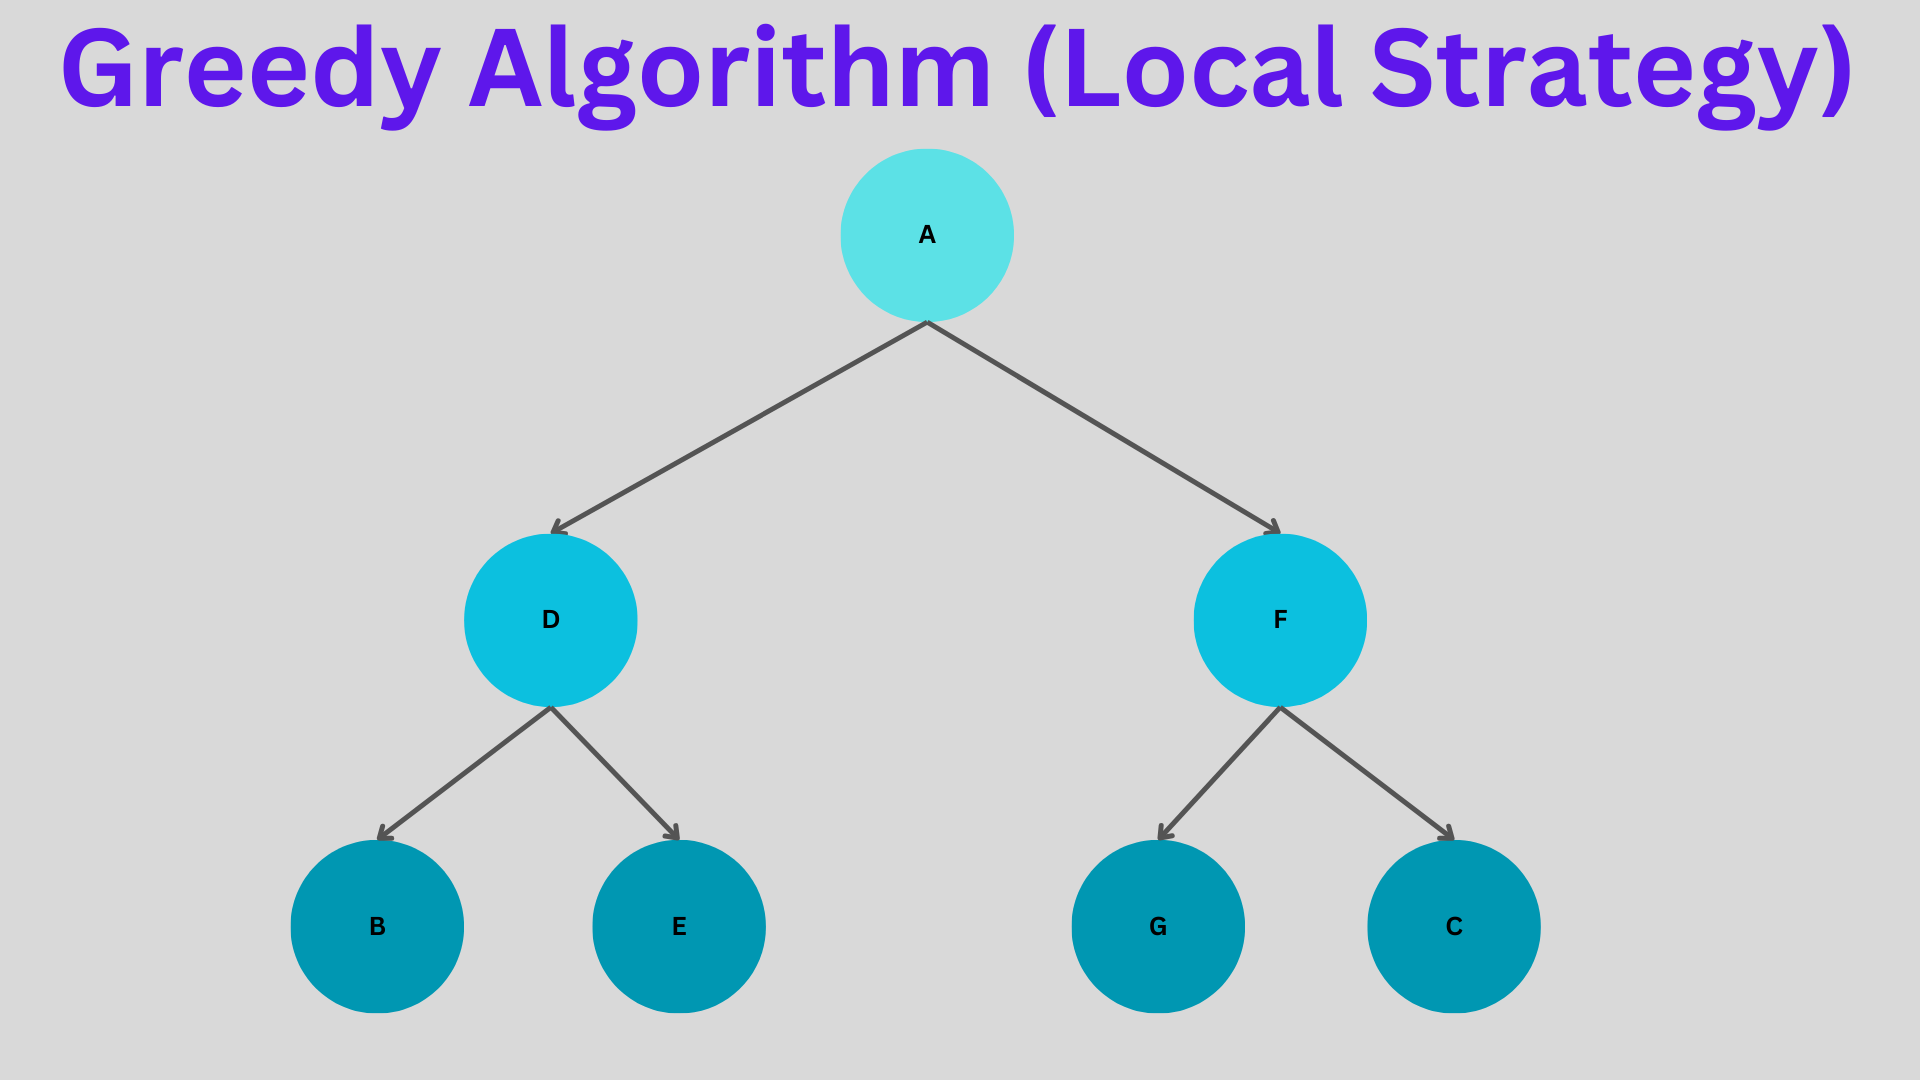

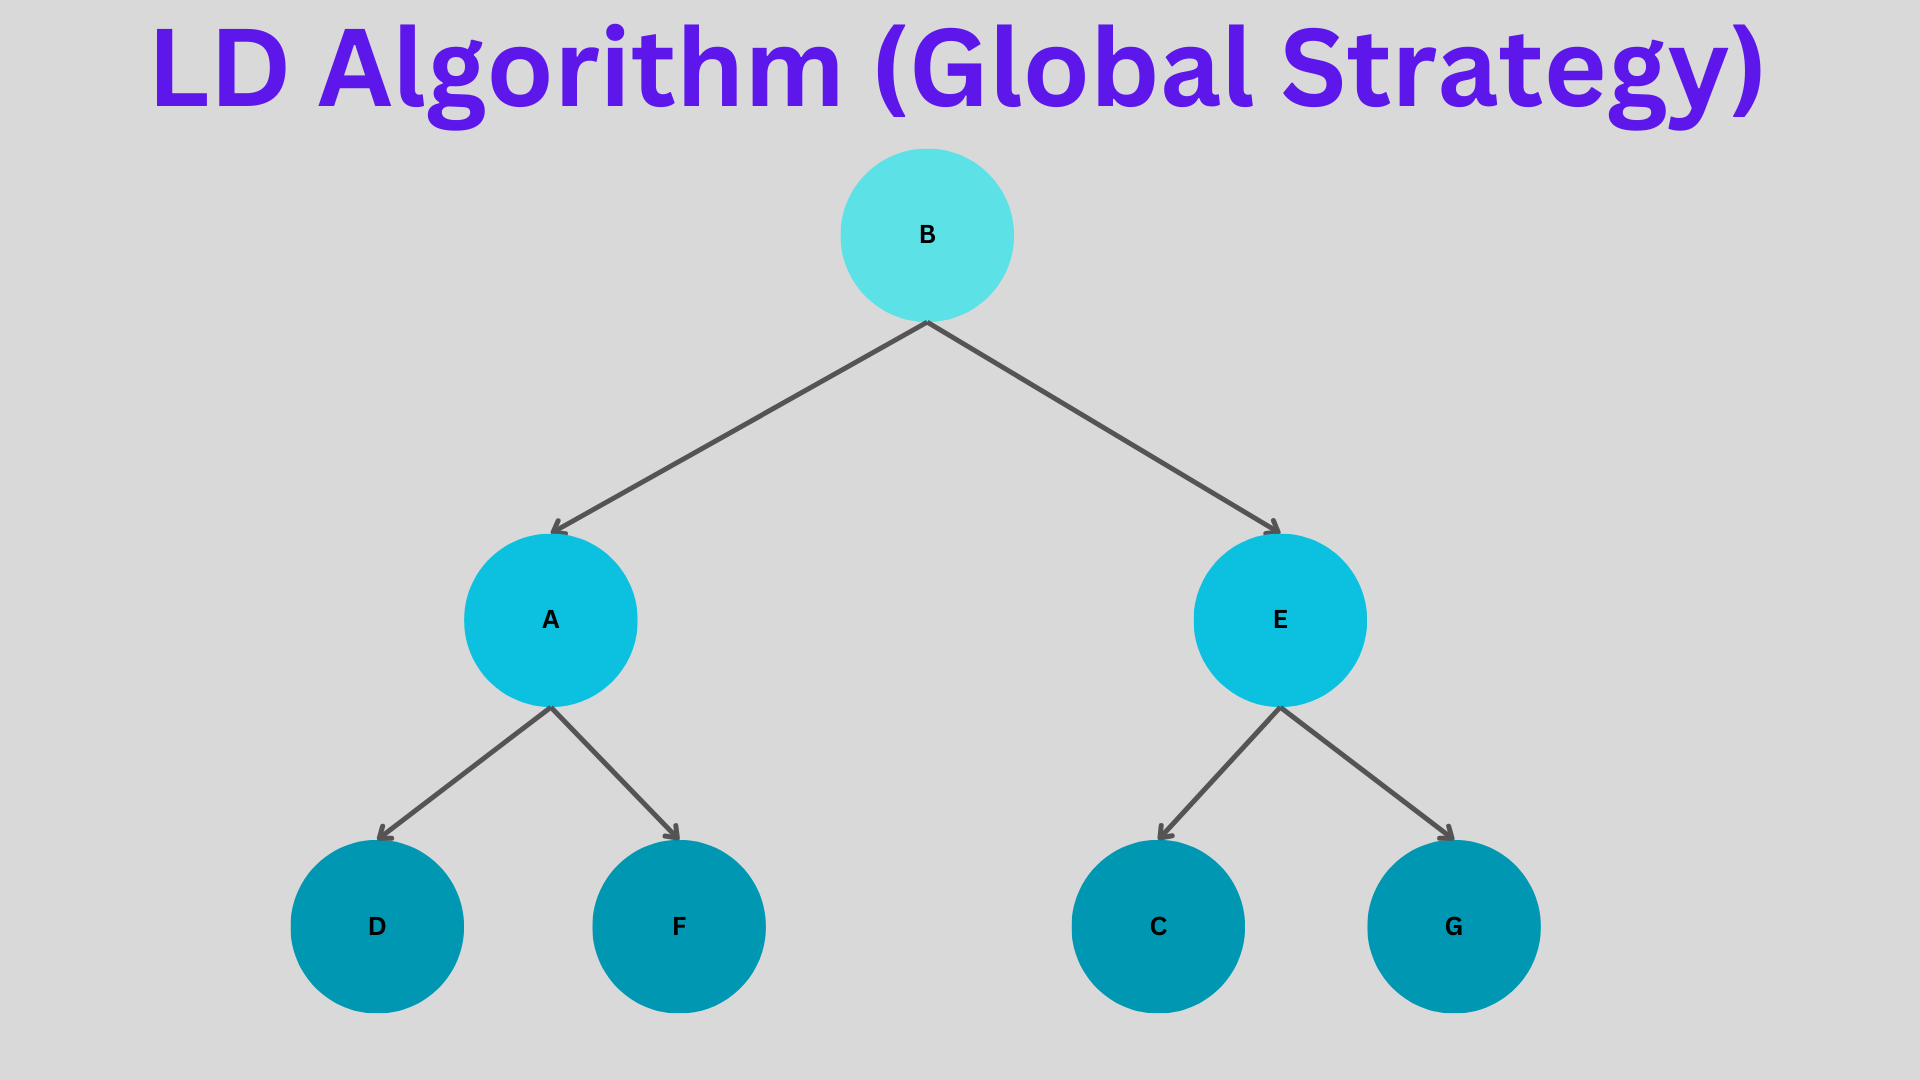

### Greedy vs Global

The comparison between the LD DP Global Strategy and the greedy algorithm (local strategy) shows how algorithmic strategies (DP vs Greedy) can lead to significantly different outputs. This discrepancy demonstrates a critical insight: while the greedy approach makes locally optimal decisions at each step, it does not always result in the global optimal outcome. 

The **LD-based tree** shows a fundamentally different structure, with **"B"** as the root node and nodes like **"A"** and **"E"** positioned at the first level of descendants, while **"D," "F," "C,"** and **"G"** are further down. The LD algorithm measures the edit distance between sequences, which takes into account insertions, deletions, and substitutions. This approach better reflects the evolutionary changes in gene sequences, resulting in a structure where nodes with minimal transformation distance are grouped closer together, regardless of the exact order of their characters.

### MST-LD Tree (Global)

### Further Exploration <u>(Not Mentioned in the Assigenment)<u>

#### Introduction: The Value of Exploring Alternative Perspectives
In genetic mutation genealogy, the **perfect binary tree** is often the go-to structure for illustrating relationships. Its simplicity and clarity make it an ideal tool for representing generational inheritance as in our assignment scenario: a parent string generates two identical children, which then undergo independent mutations. This hierarchy progresses neatly through generations, offering an organized depiction of descent.

However, while the perfect binary tree captures the **generational collective relationship**, it lacks the ability to showcase the **individual and clustered nuances** within the data. Specifically, it focuses on strict parent-child relationships rather than emphasizing the **direct mutational proximity** or **similarity-based clusters** that reveal deeper connections between strings. This limitation prompted the question: **What if we moved beyond the constraints of a perfect binary tree to focus on maximizing similarity between genes without adapting to a perfect tree structure instead?** Could this new perspective provide richer insights into how mutations influence genetic relationships?

To address this question, I developed an alternative flexible tree approach using Levenshtein Distance (LD) and Maximum Spanning Tree (MST) methodologies, prioritizing **similarity-based clustering** rather than strict generational hierarchy.

---

### The Role of the Perfect Binary Tree
The perfect binary tree is highly effective at capturing **generational collective relationships**:

1. **Strengths**:
   - It illustrates how genetic material is passed down through generations, creating a clean hierarchy of parent-child-grandchild relationships.
   - By enforcing symmetry, the tree highlights a **collective generational flow**, representing the larger structure of lineage rather than focusing on granular individual relationships.
   - It provides an intuitive, top-down view of how mutations propagate across generations.
   - It is particularly useful for understanding the process of mutation as a structured, generational phenomenon.

2. **Limitations**:
   - **Overlooks Individual Nuances**: The rigid structure prioritizes the **collective relationships of generations** over the **individual proximity** of specific sequences.
   - **Misses Clustering Insights**: By focusing strictly on generational descent, it may fail to capture cross-relationships where sequences from different branches share high similarity due to convergent mutations or other factors.
   - **Fixed Structure**: The symmetry limits flexibility in interpreting more complex mutational patterns or functional similarities.

---

### A Flexible Approach: Capturing Nuances Through LD and MST
To overcome the limitations of the perfect binary tree, I implemented an approach that emphasizes **individual and clustered nuances** in the data. This method prioritizes **actual characteristics** and **mutational proximity** over strict generational lineage, enabling a more detailed understanding of relationships between strings. While it still utilizes **Levenshtein Distance (LD)** as a global metric for measuring similarity, the approach adopts a different graph representation—a **Maximum Spanning Tree (MST)**—and employs **Kruskal's algorithm** to construct the tree, focusing on the strongest connections between sequences.


#### Concept of MST and Its Relevance to the Problem

#### What is a Spanning Tree?

A spanning tree is a subgraph of a connected, undirected graph that includes all the vertices of the original graph but with the minimum number of edges required to keep the graph connected (GeeksforGeeks, 2021). Importantly:
- There are no cycles in a spanning tree.
- For a graph with $(n)$ vertices, a spanning tree has exactly $(n-1)$ edges.

#### Example:
Consider a graph with vertices $( A, B, C, D )$ and edges connecting them:

**Original Graph**:  
$( A \leftrightarrow B \leftrightarrow C \leftrightarrow D)$  
$( A \leftrightarrow D)$

**Possible Spanning Tree**:  
$( A \leftrightarrow B \leftrightarrow C \leftrightarrow D )$
(The edge $( A \leftrightarrow D)$ is removed because it forms a cycle.)

---

#### What is a Maximum Spanning Tree (MaxST)?

A **Maximum Spanning Tree (MaxST)** is a structure derived from a graph that connects all its nodes (vertices) in such a way that the total weight of the connections (edges) is maximized, while ensuring no cycles are formed. 

Unlike a **Minimum Spanning Tree (MST)**, which minimizes the total weight, the MaxST prioritizes the **strongest or most significant connections** by selecting the heaviest edges first. This makes it especially useful for highlighting **relationships that are the most important or meaningful** within the graph.

#### Key Characteristics of MaxST:
- **Focus**: Forms connections with the highest weights.
- **No Cycles**: Ensures there are no cycles and includes all vertices.
- **Utility**: Useful for problems where the strongest relationships are more important than minimizing costs.

---

#### Relevance to the Gene Mutation Genealogy Problem

In this problem:
- **Vertices**: Represent the gene sequences.
- **Edges**: Represent the similarity scores between gene sequences, derived from similiary score calculated from the Levenshtein Distance (LD).
- **Goal**: To construct a tree that connects all sequences while emphasizing the strongest similarities, helping uncover nuanced relationships.

#### Why MaxST is a Natural Fit:
- **Mutational Similarity**: Prioritizes mutational similarity rather than enforcing a generational structure.
- **Flexible Clustering**: Captures meaningful relationships beyond strict parent-child hierarchies.
- **Mutational Proximity**: Highlights which sequences are most related based on similarity.

---

### How Kruskal's Algorithm Helped Achieve My Goals

#### What is Kruskal's Algorithm?
Kruskal’s algorithm is a greedy algorithm used to construct an MST by:
1. **Sorting Edges by Weight**:
   - All edges are sorted in ascending order (or descending for MaxST).
2. **Iteratively Adding Edges**:
   - The algorithm starts with an empty tree and adds edges one by one, starting with the heaviest (for MaxST).
   - It ensures that no cycles are formed during this process.
3. **Using Union-Find for Cycle Detection**:
   - A union-find data structure is employed to check whether adding an edge would create a cycle, ensuring that the resulting structure remains a valid tree.

#### How Kruskal's Algorithm Facilitated My Analysis
- **Optimal Pairwise Connections**:
  - By prioritizing the strongest edges (highest similarity scores), Kruskal’s algorithm ensured that the MaxST captured the most relevant and meaningful relationships between the gene sequences.
  - This was crucial for creating a tree that emphasized mutational proximity rather than strict lineage.
- **Simplicity and Efficiency**:
  - Kruskal’s algorithm is conceptually simple and computationally efficient, with a time complexity of $( O(E\log E + V) $), where $(E)$ is the number of edges and $( V)$ is the number of vertices.
  - This efficiency made it a practical choice for building a similarity-based tree for a manageable number of gene sequences.
- **Flexibility and Adaptability**:
  - Kruskal's algorithm allowed me to focus on local relationships (strong connections between two sequences) while maintaining a global perspective through the tree structure.
- **Insight into Mutational Clustering**:
  - The MST revealed clusters of closely related sequences based on their mutational similarity, providing a different perspective from the perfect binary tree.
  - By prioritizing **pairwise similarities**, Kruskal’s algorithm offered a complementary perspective to the generational focus of the perfect binary tree, revealing deeper insights into **mutational proximity** and **functional clustering**.


---


### Methodology:

#### 1. **Building the Similarity Matrix**:
   - The `compute_similarity_matrix` function transforms Levenshtein distances, computed by the `levenshtein_distance` function, into a similarity matrix, where higher values indicate closer relationships.

---

#### 2. **Constructing the MST**:
   - The `build_max_spanning_tree` function uses Kruskal’s algorithm to construct an MST from the similarity matrix.

   **How Kruskal’s Algorithm Works**:
   - **Sorting Edges**: All edges are sorted in descending order of weight (similarity).
   - **Union-Find for Cycle Detection**:
     - The `find` and `union` helper functions manage sets of connected nodes to ensure no cycles are formed.
     - If adding an edge doesn’t form a cycle, it’s included in the MST.
   - The result is a set of edges that maximize the total similarity while connecting all nodes.

---

#### 3. **Building the Genealogy Tree**:
   - The `build_tree_structure` function transforms the MST into a hierarchical tree representation.

   **How it Works**:
   - An adjacency list is constructed from the MST edges.
   - A depth-first search (DFS) is performed starting from an arbitrary root (node 0 in this case).
   - The DFS builds a nested tuple structure, where each node includes its children, representing the hierarchical relationships.

   **Output**:
   - A tree structure highlighting the strongest mutational clusters and relationships.
   - Example: ('a', ('b', ('c', 'd')))

---

#### 4. **End-to-End Flow**:
   - The `best_genealogy_LD_flexible` function ties everything together:
     1. **Similarity Matrix**: Computes pairwise similarities between all strings.
     2. **MST Construction**: Builds the MST using Kruskal’s algorithm.
     3. **Tree Building**: Converts the MST into a hierarchical tree structure.
     4. **Score Calculation**: Calculates the total similarity score of the MST.
---

### Possible Applications and Insights gained from Both Trees

The differences between the **LD Tree (Perfect Binary Tree)** and the **MaxST Tree** highlight their suitability for different types of analyses. Each tree provides unique insights depending on the aspect of the relationships between genes being investigated.

---

#### 1. LD Tree: Understanding Mutations and Evolutionary Pathways
The **LD Tree** is built by preserving triplet-based relationships, emphasizing stepwise mutations and hierarchical structures. This makes it well-suited for analyzing:

- **Mutation Patterns**:
  - By grouping genes based on the **Levenshtein Distance (LD)**, the LD Tree helps identify how a gene transforms across generations.
  - The stepwise, hierarchical organization allows tracing mutations as they accumulate over time.  
    Example: How a single ancestral gene evolves into two main branches and eventually gives rise to variations (children).

- **Gene Evolution Within Species**:
  - This tree captures evolutionary changes within a species by showing how genes mutate incrementally.
  - Example: Studying closely related genes from a single organism or population to determine which mutations led to functional changes.

- **Parent-Child Lineages**:
  - The clear hierarchical structure makes it ideal for reconstructing genealogical pathways, such as identifying parent and child relationships between gene sequences.

---

#### 2. MaxST Tree: Global Relationships and Similarities
The **MaxST Tree** focuses on maximizing the overall similarity score across the graph, prioritizing the strongest connections globally. This makes it useful for:

- **Comparing Genes Across Different Species**:
  - The MaxST Tree highlights dominant relationships across all nodes, even when those relationships span multiple levels.
  - This is particularly useful for comparing genes from different species to identify global similarity patterns that indicate shared origins or functional convergence.

- **Clustering and Similarity-Based Analysis**:
  - The MaxST Tree effectively groups genes that are globally similar, even if their immediate relationships (local triplets) are not obvious.
  - This is valuable for identifying clusters of genes that perform similar functions or share conserved regions, which might be missed in a stepwise analysis.

- **Identifying Key Genetic Bridges**:
  - In the MaxST Tree, nodes like "F" can act as **bridges**, connecting other nodes.  
    These nodes may represent key intermediaries or shared ancestors that link otherwise distant genes.

---

#### Additional Insights: Combining Both Trees
While each tree has its strengths, combining insights from both the LD and MaxST Trees can provide a comprehensive view:

- **Closeness vs. Transformation**:
  - Use the **LD Tree** to understand the **stepwise transformation** of genes through mutations.
  - Use the **MaxST Tree** to identify genes that are **most similar overall**, regardless of intermediate changes.

- **Functional and Evolutionary Analysis**:
  - For within-species studies, such as analyzing mutations over time or reconstructing ancestral lineages, the **LD Tree** provides a clearer picture.
  - For cross-species studies, where global similarity is more critical (e.g., determining evolutionary relationships or functional similarities), the **MaxST Tree** is more informative.

- **Identifying Critical Genetic Nodes**:
  - Nodes with strong global connections in the **MaxST Tree** (e.g., "A" or "F") may highlight critical genetic sequences that play a role across multiple relationships.
  - Meanwhile, the **LD Tree** can pinpoint specific mutations that led to those relationships.


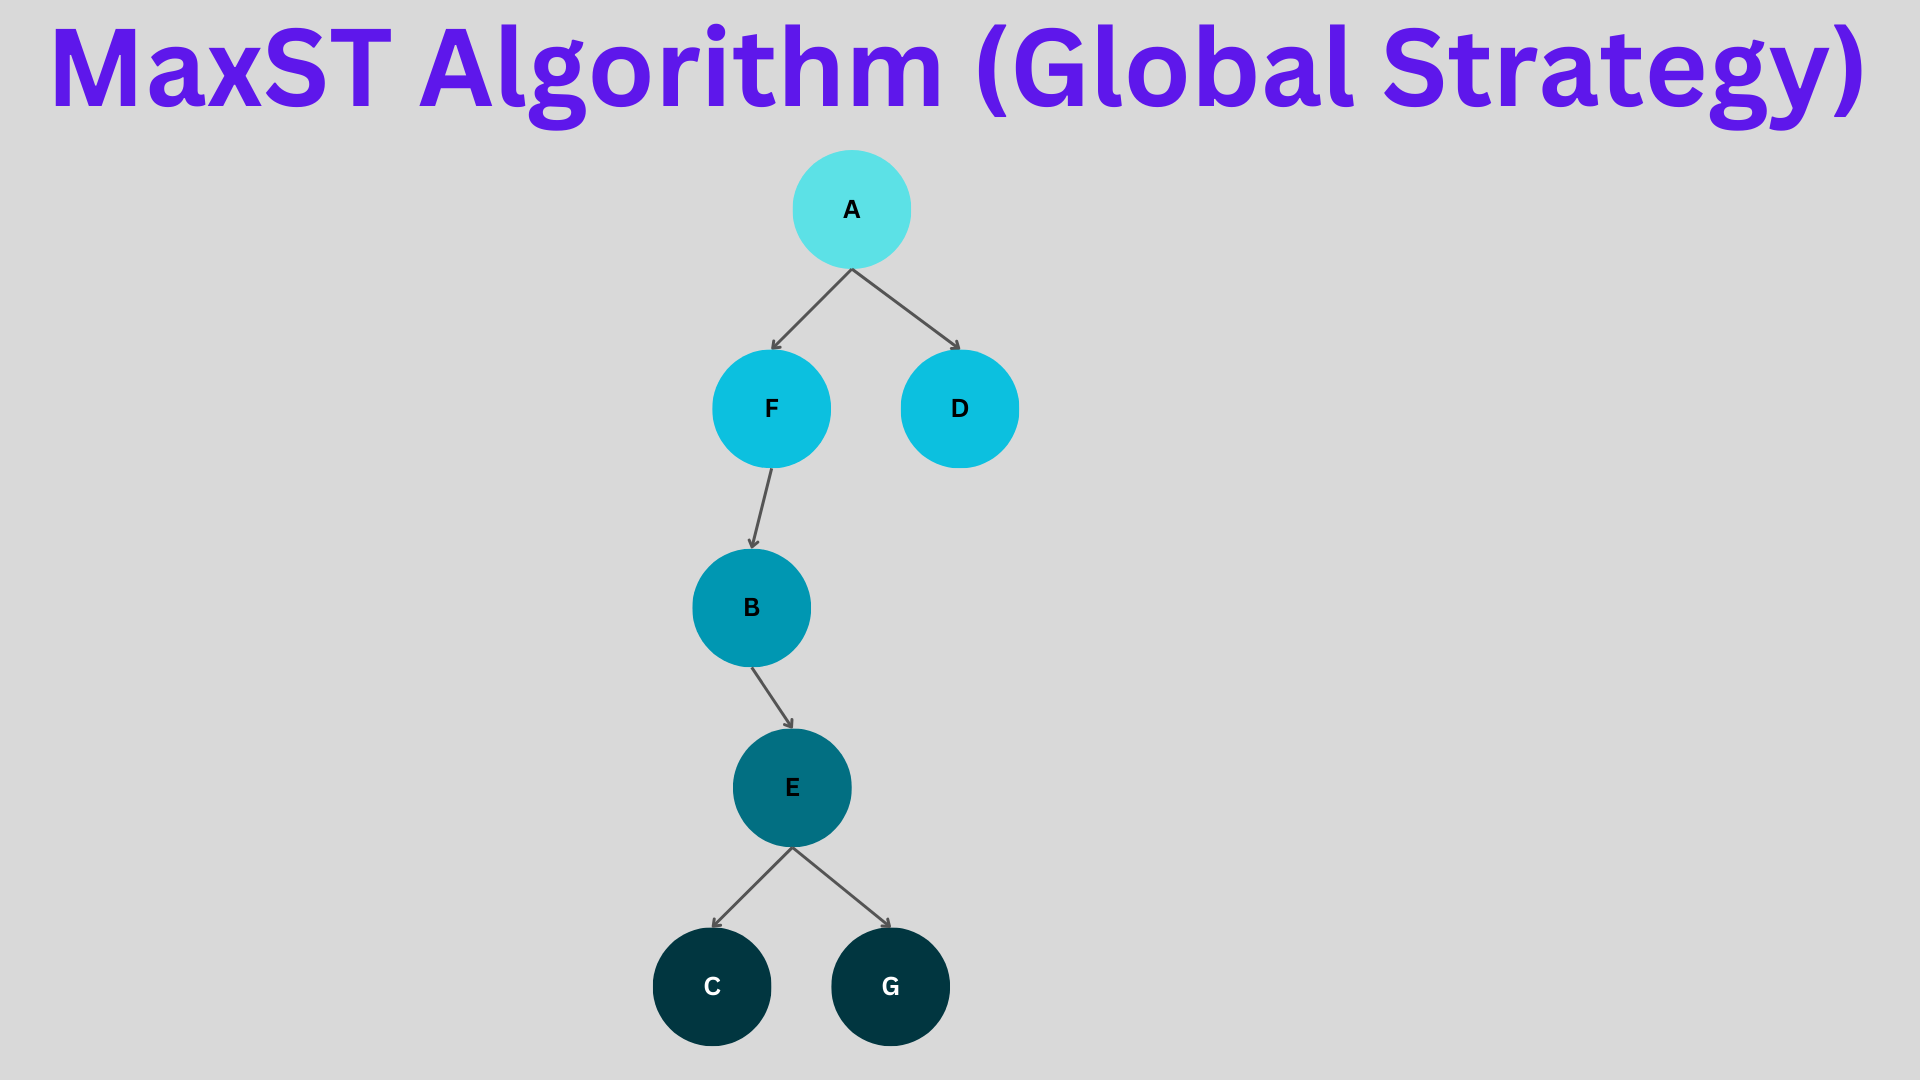

### Differences Between Perfect Binary Tree (LD) and MaxST Tree

Although both trees had the same final similarity score of 443 and they used LD as a metric for the global strategy, their structure was very different. The differences between the Perfect Binary Tree (LD) and the MaxST Tree arise due to how their respective algorithms prioritize and optimize relationships between nodes. This analysis focuses on their computational strategies and outcomes.

---

### **Perfect Binary Tree (LD)**

- **Structure**: Reflects local pairwise relationships between nodes at each level:
  - **Example**:
    - `"A," "D," and "F"` are grouped in the top hierarchy because they have the shortest distances to the root (`"A"`), indicating strong pairwise similarity.
    - `"C"` and `"G"` are placed under `"E"`, showing that their similarity to `"E"` is greater than to any other node.
- **Key Characteristics**:
  - **Step-by-Step Organization**: Parent-child relationships are based on the closest possible match at each level, forming a clear hierarchical structure.


#### **Structure Analysis**
- **Root (B)**:
  - Gene B serves as the “grandparent” or most central node, representing the ancestral sequence from which all other genes originate.
- **First Level (A and E)**:
  - Genes A and E are immediate descendants of B, representing two main variations caused by small mutations.
- **Second Level (D, F under A; C, G under E)**:
  - A gives rise to D and F, forming a local family group closely related to A.
  - Similarly, E gives rise to C and G, forming another branch of incremental mutations.

#### **Gene Journey**
- The LD Tree highlights a gradual and hierarchical journey:
  - Mutations from B → A → D reflect a stepwise progression.
  - Similarly, B → E → C captures sequential changes leading to gene C.

#### **Insights**
- Ideal for tracing **mutation-driven transformations** and stepwise genetic evolution.
- The balanced structure provides a clear lineage, with accurate parent-child hierarchies:
  - D and F are closely tied to A.
  - C and G are grouped under E.
- Captures small, progressive changes over generations.

---

### **MaxST Tree**

- **Structure**: Reflects a global optimization strategy:
  - **Example**:
    - `"E"` is placed directly under `"A"` because the edge weight between `"A"` and `"E"` is larger in the context of the entire graph than the weight between `"A"` and `"F"`.
    - `"F"` is relegated to a lower level, reflecting its reduced importance in the global optimization.
- **Key Characteristics**:
  - **Global Optimization**: Ensures that the total similarity score across all edges in the graph is maximized, even if this results in locally less intuitive configurations.

#### **Structure Analysis**
- **Root (A)**:
  - Chosen for its strongest global connections to other genes.
- **F and D as First Descendants**:
  - Directly under A, reflecting their dominant global similarity.
  - Unlike in the LD Tree, F and D are elevated from grandchildren to direct descendants of A.
- **B under F → E under B → C and G**:
  - B is placed under F, showing stronger global similarity with F.
  - E appears under B, highlighting its connection through intermediary nodes.
  - C and G are placed under E, similar to the LD Tree, but further down the hierarchy.

#### **Gene Journey**
- The MaxST Tree emphasizes a connected chain of relationships:
  - **A → F → B → E → C, G**.
  - Nodes like F and B serve as **bridges**, connecting other genes.

#### **Insights**
- Reveals **global relationships** that may not be apparent in a strict hierarchical approach:
  - F and D are elevated, reflecting their global similarity to A rather than their role as grandchildren.
- Suitable for identifying **cross-species relationships** or clusters of globally similar genes.



### **Crucial Comparison: Placement of F and D Under A**

**When comparing the placement of F and D in the LD Tree versus the MaxST Tree**, we can observe how the two methods prioritize relationships differently, which reveals the strengths and limitations of each approach.

#### **LD Tree**
- **F and D are grandchildren of A**:
  - In the LD Tree, **F** and **D** are placed hierarchically as descendants of **A** through intermediate steps, following the mutation process.
  - This reflects a natural hierarchical flow, where mutations propagate step by step, adhering to a generational structure.
  - The tree is focused on incremental evolutionary changes, tracing direct ancestry and maintaining strict generational lineage.
  - **Example Insight**: This structure suggests that **F** and **D** are the result of distinct, accumulated mutations originating from their parent sequences.

#### **MaxST Tree**
- **F and D are direct children of A and appear at the top of the tree**:
  - In the MaxST Tree, **F** and **D** bypass intermediate steps and are connected directly to **A**, which emphasizes their high overall similarity to the root.
  - This prioritizes global similarity between sequences, disregarding the order of mutations or strict lineage.
  - The placement at the top of the tree highlights that **F** and **D** are more closely related to **A** in terms of mutational proximity than some intermediate sequences might suggest.
  - **Example Insight**: This structure implies that despite potential evolutionary steps, **F** and **D** retain strong similarity to **A**, possibly due to convergent mutations or similar evolutionary paths.


# 5. Theoretical Time Complexity


## Greedy Solution
### Key Variables and Assumptions
- **$M$**: Length of a gene (affects string operations such as validation and processing).
- **$N$**: Number of genes (affects the size of the input and iterations).

The algorithm has multiple components, so we analyze the time complexity for each operation and derive the overall time complexity step by step. We use:
- **$O$** for the **upper bound**,
- **$\Omega$** for the **lower bound**, and
- **$\Theta$** when the bounds are tight and represent the actual runtime.

---

### step-by-Step Analysis

#### Validation and Processing of Strings
The function `validate_and_process_string` loops through each character in the string:
- Each string is processed in $O(M)$, as every character is checked individually.
- Since there are $N$ strings, this step scales as:
$$
  T_{\text{validation}} = \Theta(N \cdot M)
  $$
- $\Theta$ is appropriate here, as the function processes each string in linear time with respect to $M$, and every string is guaranteed to be processed.

---

### Calculation of Average LCS Lengths
The calculation of `avg_lcs` involves:

1. **Summing Rows of `len_lcs_matrix`**:
   - `len_lcs_matrix` is an $N \times N$ matrix. Summing along each row is $O(N)$, and summing for all rows is:
$$
     T_{\text{sum}} = \Theta(N^2)
 $$

2. **Division**:
   - Dividing each sum by $(N-1)$ is $O(N)$, which is negligible compared to the summation.

Thus, the complexity for this step is:
$$
T_{\text{avg\_lcs}} = \Theta(N^2)
$$

---

### **Finding the "Grandparent"**
Finding the grandparent involves determining the maximum average LCS:
- Loop through `avg_lcs` (size $N$) to find the maximum value using `enumerate`:
  $$
  T_{\text{max}} = \Theta(N)
  $$

This step contributes $\Theta(N)$ since it scales linearly with $N$.

---

### **Finding Parents Using a Heap**
The selection of parents involves:

1. **Building the Candidates List**:
   - There are $N-1$ candidates (excluding the grandparent). Generating this list is $O(N)$.

2. **Pushing Candidates into the Heap**:
   - Each push into the heap takes $O(\log k)$, where $k$ is the heap size. For $N-1$ candidates, this scales as:
     $$[
     T_{{push}} = O((N-1) \cdot \log(N-1)) = O(N \log N)
     ]$$

3. **Popping the Top 2 Parents**:
   - Each pop is $O(\log N)$, so popping 2 parents is $O(2 \cdot \log N) = O(\log N)$.

The total complexity for this step is:
$$
T_{\text{parents}} = O(N + N \log N + \log N) = O(N \log N)
$$

---

### **Assigning Children**
The assignment of children involves:

1. **Looping Over Each Parent**:
   - There are 2 parents, so this step is executed twice.

2. **Building the Candidates List**:
   - For each parent, this involves checking $N-3$ remaining indices (excluding grandparent and 2 parents). Each check is $O(1)$, so building the list is:
     $$
     T_{\text{candidates}} = \Theta(N)
     $$

3. **Using a Heap to Select Top 2 Children**:
   - Similar to parent selection, this step involves pushing $N-3$ elements into the heap:
     $$
     T_{\text{heap}} = O((N-3) \cdot \log(N-3)) = O(N \log N)
     $$
   - Popping the top 2 children is $O(\log N)$.

Since this is done for 2 parents, the total complexity for assigning children is:
$$
T_{\text{children}} = 2 \cdot (O(N) + O(N \log N)) = O(N \log N)
$$

---

### Overall Complexity

To summarize:
- **Validation and processing**: $\Theta(N \cdot M)$
- **Average LCS calculation**: $\Theta(N^2)$
- **Finding the grandparent**: $\Theta(N)$
- **Selecting parents**: $O(N \log N)$
- **Assigning children**: $O(N \log N)$

The dominant term is $\Theta(N^2)$, as it grows faster than $O(N \log N)$ or $\Theta(N \cdot M)$ for large $N$.

Thus, the overall time complexity of the algorithm is:
$$
T_{\text{total}} = \Theta(N^2)
$$

---

### Best-Case, Worst-Case, and Average-Case Complexity

1. **Best-Case** ($\Omega(N^2)$):
   - Even with minimal input or early termination, the summation of `len_lcs_matrix` ensures quadratic scaling.

2. **Worst-Case** ($O(N^2)$):
   - The algorithm scales quadratically regardless of specific input configurations.

3. **Average-Case** ($\Theta(N^2)$):
   - The consistent row-wise summation and matrix operations dominate the runtime, ensuring quadratic scaling.

---
## 2. Global Solution: Levenshtein Distance 

### 1. (`levenshtein_distance`)

### What it Does  
The Levenshtein distance function computes the minimum edit distance (insertions, deletions, substitutions) between two strings, or genes, each of length $M$. It uses a dynamic programming table of size $$M \times M$$.

### Time Complexity  
**Worst Case**  
The function processes every cell of the dynamic programming (DP) table, regardless of string similarity. Thus, for two strings of length $M$, the time complexity is:  
$$O(M^2)$$  

**Best Case**  
Even if the two strings are identical (or highly similar), the function does not exit early and computes the entire table. This behavior means that the best-case complexity remains:  
$$\Omega(M^2)$$  

**Average Case**  
On average, the function still processes all $M \times M$ entries because no optimization or pruning is implemented. Therefore, the average-case complexity is:  
$$\Theta(M^2)$$  

### Space Complexity  
The space complexity can be improved because the algorithm only requires two rows of the DP table at any time. This optimization reduces the space complexity from $O(M^2)$ to $O(M)$.

### Conclusion  
For two strings of length $M$, the complexities are:  

- **Time Complexity**: $\Theta(M^2)$  
- **Space Complexity**: $O(M)$  

The absence of early stopping ensures that the worst, best, and average cases are effectively identical in terms of asymptotic behavior.

---

### 2. Distance Matrix Computation (`compute_distance_matrix`)

### What it Does  
The function calculates pairwise Levenshtein distances for $N$ genes, where each gene has a length $M$. Since there are $O(N^2)$ unique pairs, and each pairwise comparison requires $O(M^2)$ time, the combined complexity reflects both components.

### Time Complexity  
**Worst Case**  
Each of the $N^2$ pairs is evaluated fully, and each comparison takes $O(M^2)$ time. Therefore:  
$$O(N^2 \cdot M^2)$$  

**Best Case**  
The algorithm does not short-circuit or skip redundant computations, even for highly similar or identical strings. Hence, the best case remains:  
$$\Omega(N^2 \cdot M^2)$$  

**Average Case**  
With no optimizations (e.g., early termination), the average-case complexity matches the worst-case complexity:  
$$\Theta(N^2 \cdot M^2)$$  

### Space Complexity  
The function stores a distance matrix of size $N \times N$. Therefore:  
$$O(N^2)$$  

### Conclusion  
The complexities for distance matrix computation are:  

- **Time Complexity**: $\Theta(N^2 \cdot M^2)$ 
- **Space Complexity**: $O(N^2)$

**Scalability Implications**  
For large $N$ (number of genes), the $N^2$ term dominates; for long sequences $M$, the $M^2$ term becomes significant. The algorithm scales poorly for simultaneously large $N$ and $M$.

---

### 3. Subset Generation (`generate_combinations_iterative`)

### What it Does  
The function generates combinations of subsets of size $k$ from a list of $N$ genes. The number of such subsets depends on ${N \choose k}$ (combinations of $N$ items taken $k$ at a time).

### Time Complexity  
**Worst Case**  
If all subsets need to be generated, the total number of combinations for $k$ ranging from $1$ to $N$ is $2^N$. Thus:  
$$O(2^N)$$  

**Best Case**  
If generating only subsets of a specific size $k$, the complexity is determined by ${N \choose k}$, which grows as:  
$$\Omega(N)$$ (for small $k$).

**Average Case**  
Without assumptions about subset size, the complexity falls closer to $O(2^N)$ for large $N$. Most cases require significant combinations to be explored, especially for bottom-up dynamic programming.

### Conclusion  
The time complexity of subset generation is:  
$$O(2^N)$$ (worst case, when all subsets are generated).

---

### 4. Dynamic Programming for Building the Genealogy Tree (`best_genealogy_LD`)

### What it Does  
The function iteratively explores all subsets of the $N$ genes to find an optimal tree structure using a bottom-up dynamic programming approach. For each subset, it checks all possible root nodes and partitions into left and right subtrees.

### Time Complexity  
**Worst Case**  
The number of subsets is $2^N$. For each subset, the algorithm attempts all valid partitions and evaluates each partition's score. Thus, the overall time complexity is:  
$$O(2^N)$$  

**Best Case**  
No pruning or early stopping is implemented, so the best case also requires evaluating all subsets and partitions:  
$$\Omega(2^N)$$  

**Average Case**  
Since no optimization or heuristics reduce the search space, the average case remains:  
$$\Theta(2^N)$$  

### Space Complexity  
Storing results for all subsets in the DP table requires $O(2^N)$ space.

### Conclusion  
The complexities for dynamic programming are:  

- **Time Complexity**: $\Theta(2^N)$  
- **Space Complexity**: $O(2^N)$ 

---

### 5. Combined Complexity

The combined time complexity for the algorithm includes:  

- **Distance Matrix Computation**: $\Theta(N^2 \cdot M^2)$
- **Subset Generation and DP**: $O(2^N)$  

### Final Combined Complexity  
The total time complexity is:  
$$O(N^2 \cdot M^2 + 2^N)$$  

- For large $N$, $2^N$ dominates.  
- For large $M$ and moderate $N$, $N^2 \cdot M^2$ becomes significant.

### Space Complexity  
The total space complexity is:  
$$O(N^2 + 2^N)$$  

For large $N$, this simplifies to:  
$$O(2^N)$$  

---
### Time Complexity Analysis and Scaling Interpretation

The time complexity of the algorithm is:

**$O(N^2 · M^2 + 2^N)$**

where:  
- **$M$**: Length of each gene (number of characters in a string).  
- **$N$**: Number of genes.

---

### 1. Time Complexity Components

### 1.1 $( N^2 \cdot M^2)$
- **Interpretation:** Quadratic growth in both $N$ (number of genes) and $M$ (gene length).  
- **Scaling:** Becomes dominant for large $M$ when $N$ is moderate.  
- **Performance Prediction:** Expensive as $M$ grows, especially if $M$ is very large.

### 1.2 $(2^N)$
- **Interpretation:** Exponential growth with respect to $N$ (number of genes).  
- **Scaling:** Dominates as $N$ increases, even for relatively small $N$.  
  - For $( N = 20)$: $( 2^N = 1,048,576)$.  
  - For $( N = 30)$: $( 2^N = 1,073,741,824)$.  
- **Performance Prediction:** Algorithm becomes infeasible for large $N$ due to the rapid growth of $2^N$.

---

## 2. Interpretation of Scaling

### When the Algorithm is Effective:
1. **Small Number of Genes $( N) $**:  
   - For $( N \leq 10)$, the exponential term $2^N$ is manageable.
   - **Example:** Applications involving a small number of gene sequences.

2. **Short Gene Lengths $M$**:  
   - For small $M$, the quadratic term $M^2$ is insignificant.
   - **Example:** Comparing short genetic sequences, such as fragments or specific markers.

3. **Moderate $M$ and $N$:**  
   - For $( N \approx 10)$ and $( M \approx 100)$, both terms are manageable.

### When the Algorithm is Ineffective:
1. **Large Number of Genes $N$**:  
   - For $(N>15)$, $2^N$ dominates, making the algorithm impractically slow.  

2. **Long Gene Sequences ($M$)**:  
   - For large $M$, the $ (M^2)$ term dominates distance computation, even for small $N$.

3. **Combination of Large $N$ and $M$**:  
   - For large $N$ and $M$, both $( N^2 \cdot M^2)$ and $2^N$ cause prohibitive runtimes.
---

## 3. Theoretical Insights and Practical Implications

### Theoretical Reflection:
- $(2^N)$: Reflects the combinatorial complexity of the subset enumeration in the DP step.
- $( N^2 \cdot M^2)$: Reflects the cost of computing all pairwise Levenshtein distances.

### Practical Implications:
1. **Small $N$ and $M$:** Algorithm works well for small inputs.
2. **Large $N$:** Exponential blowup $2^N$ makes the algorithm infeasible.
3. **Large $N$:** Pairwise distance computation becomes computationally expensive.

---
### 4.Current Limitations

1.  **Scalability and Performance**:
    
    *   **Exponential Growth**: The algorithm relies on generating all possible combinations of nodes to form perfect binary trees. As $N$ increases, the number of combinations grows exponentially $O(2^N)$, leading to significant performance bottlenecks for larger values of $N$.
    *   **Time Complexity**: Both the Levenshtein distance computation and the dynamic programming (DP) process contribute to high time complexity. Specifically, generating combinations and evaluating all possible subtree partitions are computationally intensive operations.
    *   **Space Complexity**: The DP dictionary stores entries for all possible subsets of nodes, which can consume substantial memory as `n` grows. This is particularly problematic for larger trees, where memory usage can become prohibitive.
2.  **Assumptions and Constraints**:
    
    *   **Perfect Binary Tree Requirement**: The function strictly requires the number of nodes `n` to be of the form $2^k - 1$. This constraint limits the applicability of the function to only those cases where the tree is perfectly balanced. In real-world scenarios, genealogical trees might not always adhere to this strict structure.
    *   **Unique Labels**: The algorithm assumes that each label in the `labels` list is unique. If duplicate labels exist, the `labels.index()` method used to find indices can return incorrect results, leading to inaccurate distance calculations and tree structures.
3.  **Dependency on Label Ordering**:
    
    *   **Index Retrieval**: The function uses `labels.index()` to retrieve indices based on labels. This approach is inefficient for large lists and can introduce errors if labels are not unique or are reordered.
4.  **Limited Error Handling**:
    
    *   **Invalid Inputs**: While the function checks for the correctness of $N$ and the lengths of `labels` and `strings`, it doesn't handle other potential invalid inputs, such as non-string elements within the `labels` or `strings` lists.
5.  **Levenshtein Distance Constraints**:
    
    *   **Character Sensitivity**: The Levenshtein distance is case-sensitive and sensitive to all character types. This might not be desirable in all genealogical contexts where case insensitivity or ignoring certain characters could be beneficial.

* * *
### 5. Suggestions for Improving Practical Performance

1. **Early Termination in Levenshtein Distance:**  
   - Add early stopping conditions for identical or highly similar strings.

2. **Parallelizing Pairwise Distance Computation:**  
   - Use parallel processing to compute distances for multiple pairs simultaneously.

3. **Heuristics for Subset Exploration:**  
   - Reduce the search space using heuristics or branch-and-bound techniques.

4. **Thresholding for Long Sequences:**  
   - Simplify or truncate long gene sequences to mitigate the quadratic cost of distance computation.


# 5.2 Empirical Time Complexity

## (A) Fix Number of Genes (N=7) and Vary Gene length (M)

## 1. Hypothetical Analysis

### Greedy Genealogy Algorithm
- The theoretical complexity for varying gene length ($M$) is:

  $$
  T_{\text{greedy}} = \Theta(N \cdot M)
  $$

- With $N = 7$ fixed, the complexity becomes:

  $$
  T_{\text{greedy}} = \Theta(M)
  $$

- This implies a linear scaling with gene length.

### Best Genealogy LD Algorithm
- The theoretical complexity for varying gene length ($M$) is:

  $$
  T_{\text{LD}} = \Theta(N^2 \cdot M^2)
  $$

- With $N = 7$ fixed, this simplifies to:

  $$
  T_{\text{LD}} = \Theta(M^2)
  $$

- This implies a quadratic scaling with gene length.

## 2. Experimental Observations

### Greedy Genealogy Algorithm
- The experimental runtime ratios (1.64, 1.93, 2.69) indicate a near-linear growth in runtime with gene length ($M$).
- The empirical results align well with the hypothetical complexity:

  $$
  T_{\text{greedy}} = \Theta(M)
  $$

### Best Genealogy LD Algorithm
The experimental runtime ratios (3.86, 3.47, 5.09) suggest superlinear growth because the runtime increases faster than linear as gene length ($M$) increases, which is consistent with the quadratic scaling ($\Theta(M^2)$) predicted by the theoretical complexity.

## Why It Matches Quadratic Growth ($\Theta(M^2)$)

### Superlinear Growth Indicators:
- If the growth were linear ($\Theta(M)$), the runtime ratio for doubling the gene length (e.g., from $M=200$ to $M=400$) would remain approximately constant at ~2.
- Instead, the runtime ratio increases significantly beyond 2 (e.g., 3.86, 5.09), which is indicative of a superlinear trend.

### Quadratic Growth Evidence:
- For a quadratic relationship ($\Theta(M^2)$), the runtime scales with the square of the gene length. Doubling $M$ results in approximately a fourfold increase in runtime.
- In this case, the observed ratios (e.g., 3.86 and 5.09) closely approximate the theoretical $4x$ increase expected for quadratic scaling.
- Minor deviations from exactly 4 can result from:
  - **Implementation Overhead**: Differences in how the algorithm handles data structures or dependencies.
  - **System-Level Factors**: CPU caching, memory allocation, or thread scheduling impacting performance.
  - **Hidden Constants**: Theoretical complexities ignore constant factors that can influence runtime in practical scenarios.



## 3. Matching Hypothetical and Experimental

### Greedy Genealogy Algorithm
- The experimental results align with the hypothesis:

  $$
  T_{\text{greedy}} = \Theta(M)
  $$

- The runtime increases linearly with $M$, with no significant discrepancies observed.

### Best Genealogy LD Algorithm
- The experimental results align with the hypothesis:

  $$
  T_{\text{LD}} = \Theta(M^2)
  $$

- The runtime growth follows a quadratic trend with $M$.
- Slight variability in scaling factors (e.g., 3.86 vs. 5.09) could arise from:
  - System overhead or caching effects.
  - Specific characteristics of the dataset (e.g., high similarity or randomness).

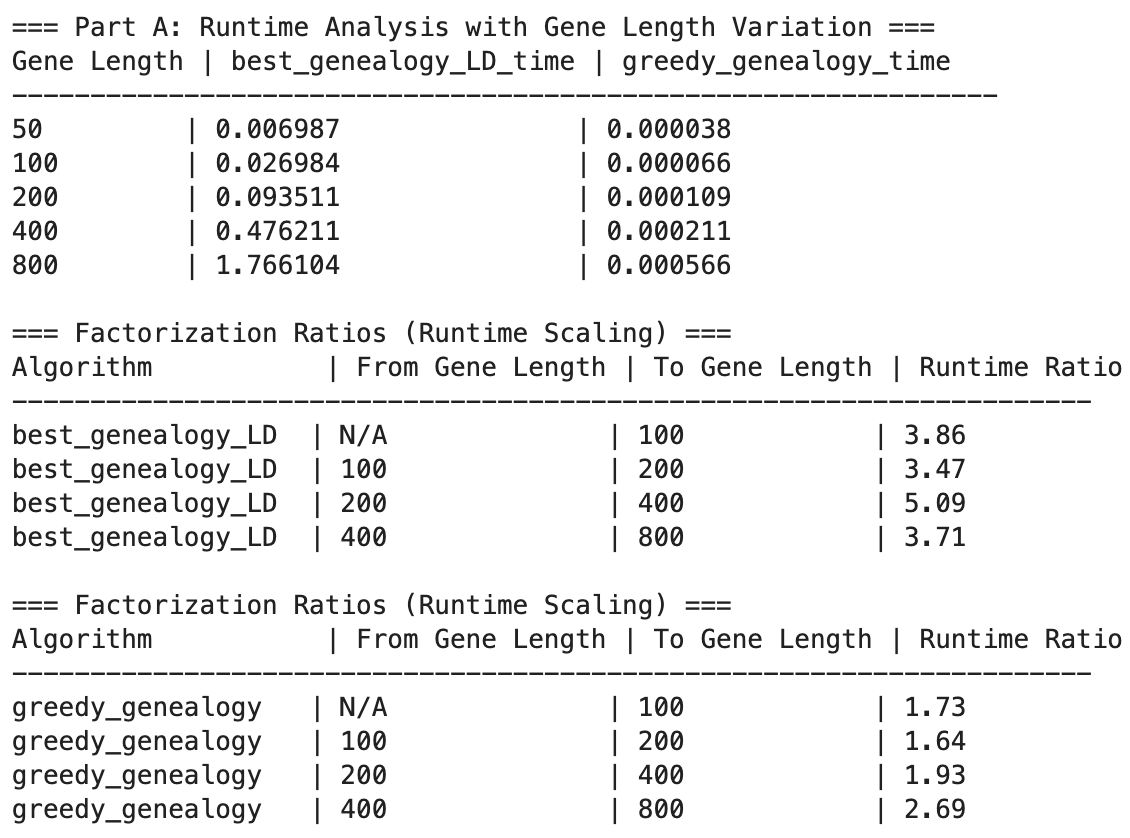

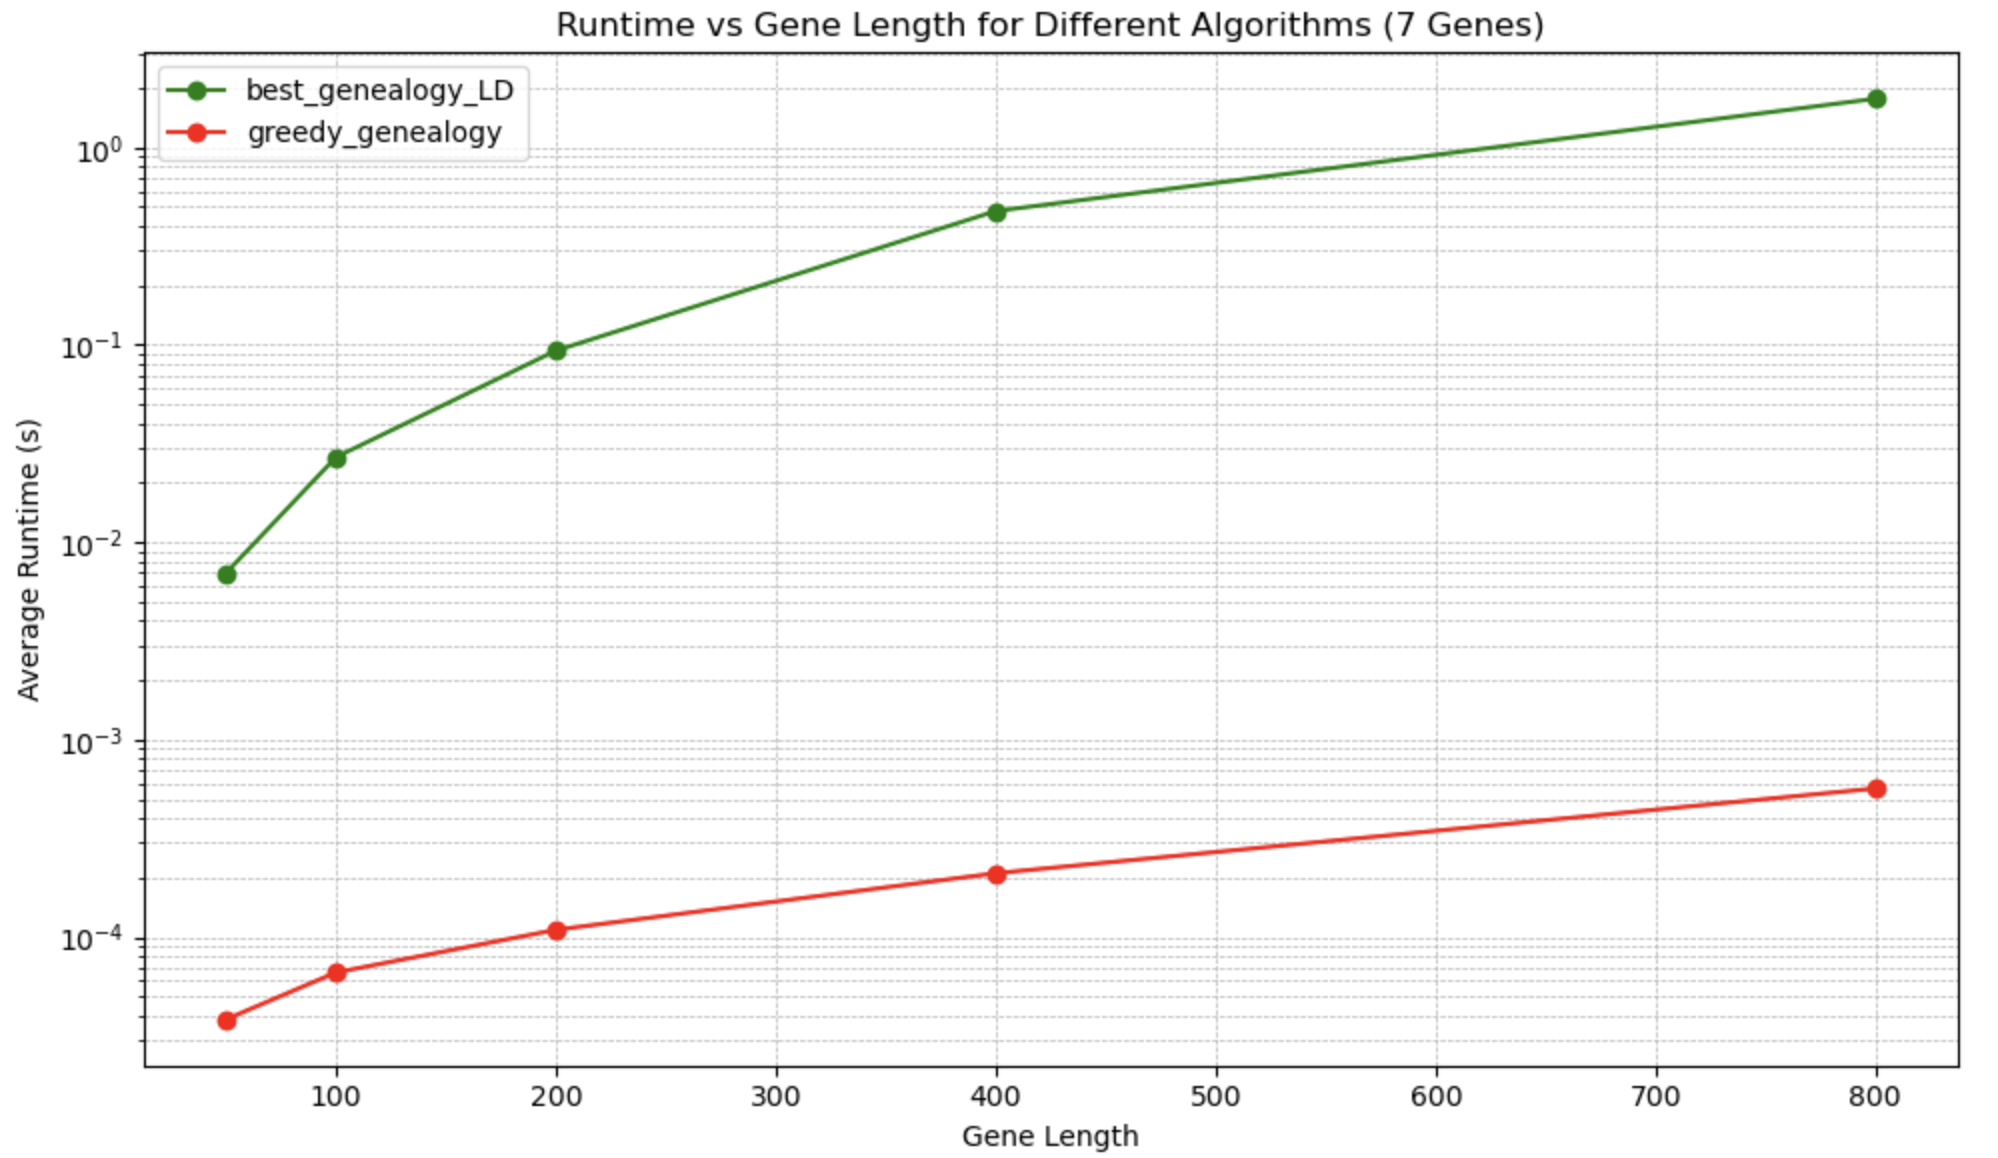

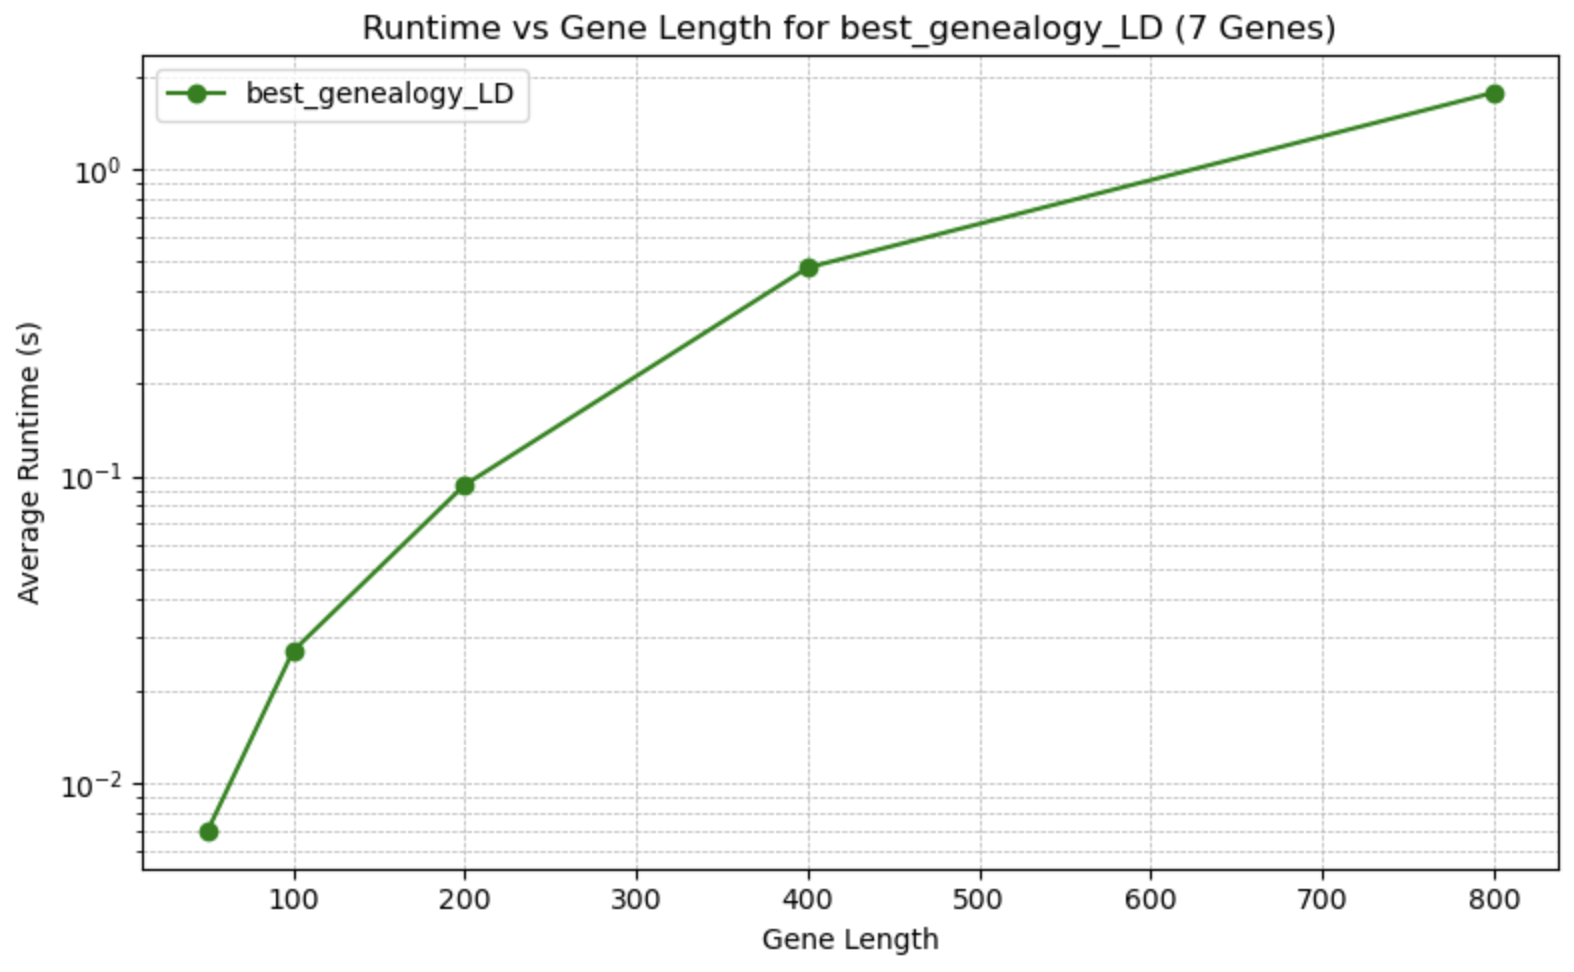

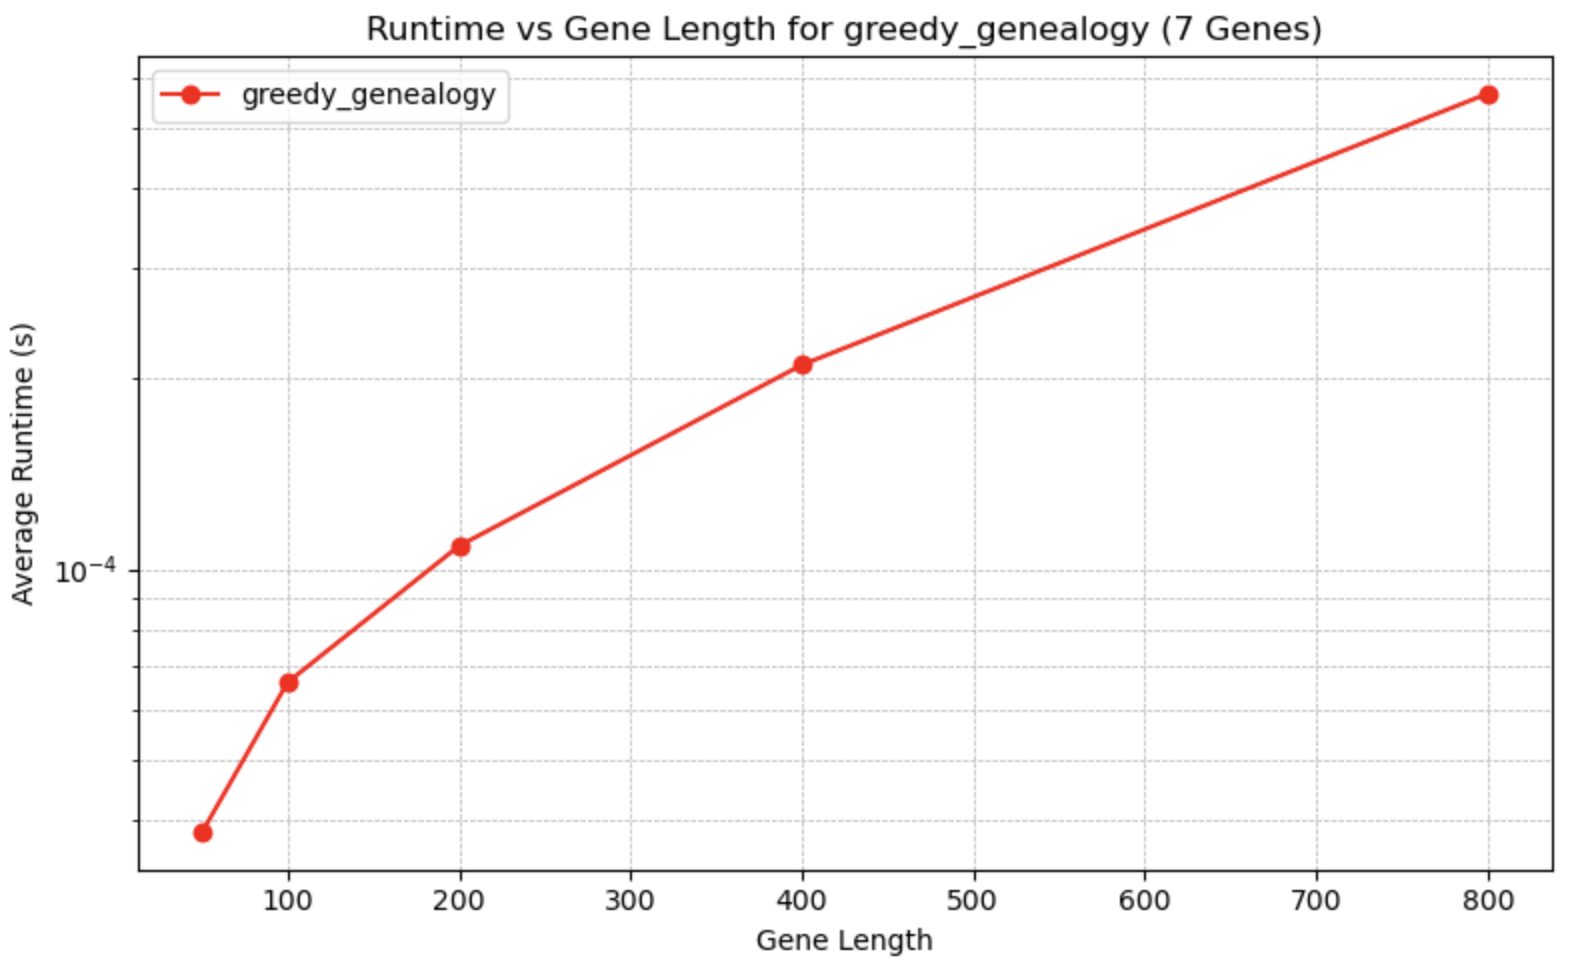

## (B) Fix Length of Genes (M=200) and Vary Number of Genes (N)

## 1. Theoretical Expectations

## Greedy Genealogy Algorithm

### Final Complexity:
$$
{O}(N^2 \cdot M^2 + N^2)
$$

### Dominant Term:
$$
{O}(N^2 \cdot M^2)
$$

- The quadratic growth of the distance matrix computation dominates for theoretical $N$.

## Global DP Algorithm

### Distance Matrix Computation
- Before constructing the genealogy tree, the algorithm computes a distance matrix using the Levenshtein distance between every pair of $N$ genes.
- The Levenshtein distance for two strings of length $M$ takes ${O}(M^2)$. Since there are $\binom{N}{2} = {O}(N^2)$ pairs, the time complexity is:
  $$
  {O}(N^2 \cdot M^2)
  $$

### Dynamic Programming (DP) Over Subsets
- The DP over subsets involves:
  1. **Considering subsets** of genes that can form perfect binary trees. These subsets have sizes in the form $2^k - 1$ (e.g., 1, 3, 7, 15, ...).
  2. For each subset:
     - Assigning a root and partitioning the remaining genes into left and right subtrees.
     - For a subset of size $2^t - 1$:
       - There are $2^t - 1$ choices for the root.
       - Combinatorial ways to partition $2^t - 2$ genes into left and right subtrees of size $(2^{t-1} - 1)$.

- The subset exploration is exponential in $N$, as the total number of subsets of $N$ elements is $2^N$. While only specific subsets are valid (e.g., perfect binary tree sizes), the worst-case complexity still scales as:
  $$
{O}(2^N)
  $$

### Overall Theoretical Complexity
Combining both steps:
1. Distance Matrix: ${O}(N^2 \cdot M^2)$
2. Subset Enumeration and DP: ${O}(2^N)$
- Total complexity:
  $$
  {O}(N^2 \cdot M^2 + 2^N)
  $$

## 2. Experimental Results

### Runtime Results for Different $N$:
| Gene Count ($N$) | Runtime for best\_genealogy\_LD (s) | Runtime for greedy\_genealogy (s) |
|-------------------|------------------------------------|-----------------------------------|
| 3                 | 0.015746                          | 0.000041                         |
| 7                 | 0.086810                          | 0.000110                         |
| 15                | 1.921359                          | 0.000233                         |

### Scaling Factors (Runtime Ratios):
| Algorithm              | From $N_1$ | To $N_2$ | Runtime Ratio |
|------------------------|------------|----------|---------------|
| best\_genealogy\_LD    | 3          | 7        | 5.51          |
| best\_genealogy\_LD    | 7          | 15       | 22.13         |
| greedy\_genealogy      | 3          | 7        | 2.66          |
| greedy\_genealogy      | 7          | 15       | 2.13          |

## 3. Observations

### Best Genealogy LD Algorithm
- The runtime increases faster than linear with $N$:
  - Runtime ratios of 5.51 (from $N=3$ to $N=7$) and 22.13 (from $N=7$ to $N=15$) indicate superlinear growth.
  - Empirical scaling aligns more closely with quadratic or slightly higher growth, not $2^N$ at this scale of $N$.

### Greedy Genealogy Algorithm

### Distance Matrix Dominance:
- The empirical results show growth that is slightly superlinear but less than cubic.
- The runtime ratios (2.66 and 2.13) are consistent with the quadratic scaling of ${O}(N^2)$.

#### For perfectly quadratic growth:
- Doubling $N$ should result in approximately fourfold growth in runtime.
- In this case:
  - From $N=3$ to $N=7$, runtime grows by ~$2.66$, slightly less than $4$.
  - From $N=7$ to $N=15$, runtime grows by ~$2.13$, again less than expected for pure quadratic growth.

#### Reason:
- The small sizes of $N$ (and fixed $M=200$) mean the ${O}(N \log N)$ heuristic steps slightly affect the scaling.

#### Linear Component Contribution:
- Steps like grandparent and parent selection contribute ${O}(N \log N)$ or ${O}(N)$, causing the growth to appear slightly less than pure ${O}(N^2)$ for small $N$.
- For larger $N$, these steps become negligible compared to the ${O}(N^2)$ distance computation.

#### Fixed Gene Length ($M$):
- With $M=200$, the ${O}(M^2)$ factor is constant across experiments, isolating the quadratic behavior of $N^2$.
- For varying $M$, the runtime would scale as ${O}(N^2 \cdot M^2)$, making the quadratic growth in $N$ more apparent.
 
## 4. Reconciling Theory and Empirical Results

### Why Best Genealogy LD Doesn't Show $2^N$ Growth Empirically:
1. **Subset Constraints**:
   - The theoretical analysis assumes exploration of all $2^N$ subsets.
   - The implementation restricts the search to valid subsets (i.e., those that can form perfect binary trees), significantly reducing the number of subsets.

2. **Practical Optimizations**:
   - **Caching**: Dynamic programming caches previously computed results for subtrees, avoiding redundant computations.
   - **Pruning**: Invalid or unnecessary subsets (e.g., subsets not forming perfect binary trees) are skipped early, reducing the search space.

3. **Dominance of Pairwise Distance Computation**:
   - For small $N$ (e.g., $N=3, 7, 15$), the ${O}(N^2 \cdot M^2)$ distance matrix computation dominates the runtime. The exponential subset enumeration hasn't yet become the dominant factor.

4. **Input Size Limits**:
   - For the experimental range ($N \leq 15$), the $2^N$ term hasn't reached a scale where it outweighs the quadratic components.

## 5. When Will $2^N$ Become Evident?
- For larger $N$ (e.g., $N > 20$), the exponential growth in subset enumeration will dominate the runtime:
  - The number of subsets grows as $2^N$, and each subset involves partitioning and DP computations.
  - This exponential term will eventually dwarf the ${O}(N^2 \cdot M^2)$ component.

## 6. Key Findings and Justifications

### Observed Quadratic Growth for Small $N$:
- The empirical results show scaling closer to ${O}(N^2)$ because:
  1. The distance matrix computation (${O}(N^2 \cdot M^2)$) dominates for small $N$.
  2. Subset enumeration is constrained and optimized.

### Theoretical $2^N$ Complexity:
- Reflects the worst-case upper bound, assuming:
  1. Full exploration of all $2^N$ subsets.
  2. Exhaustive partitioning for each subset.

- Optimizations in the implementation mitigate this in practice for small to moderate $N$.

### Practical Implications for Larger $N$:
- As $N$ increases, the exponential growth ($2^N$) will eventually dominate, making the algorithm infeasible for large datasets.


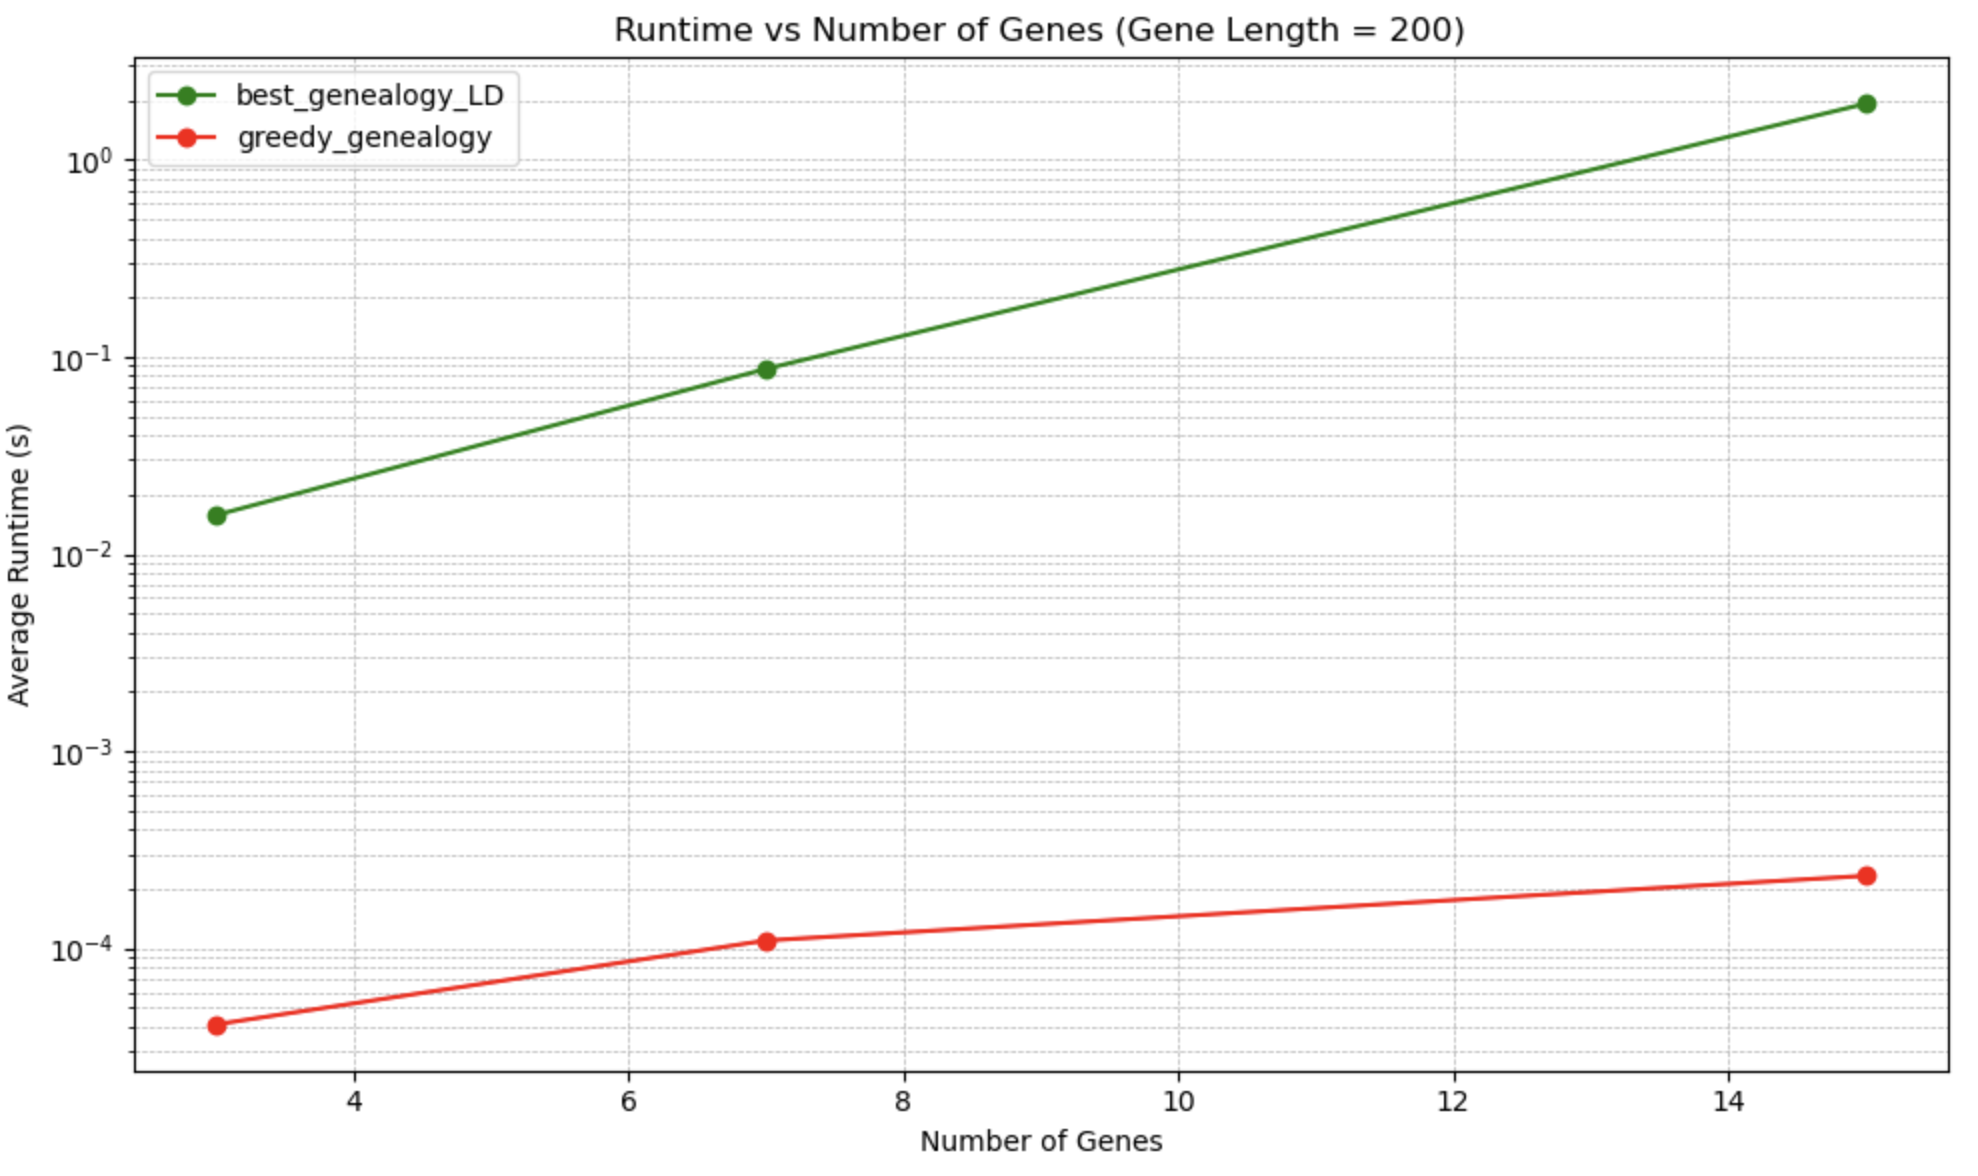

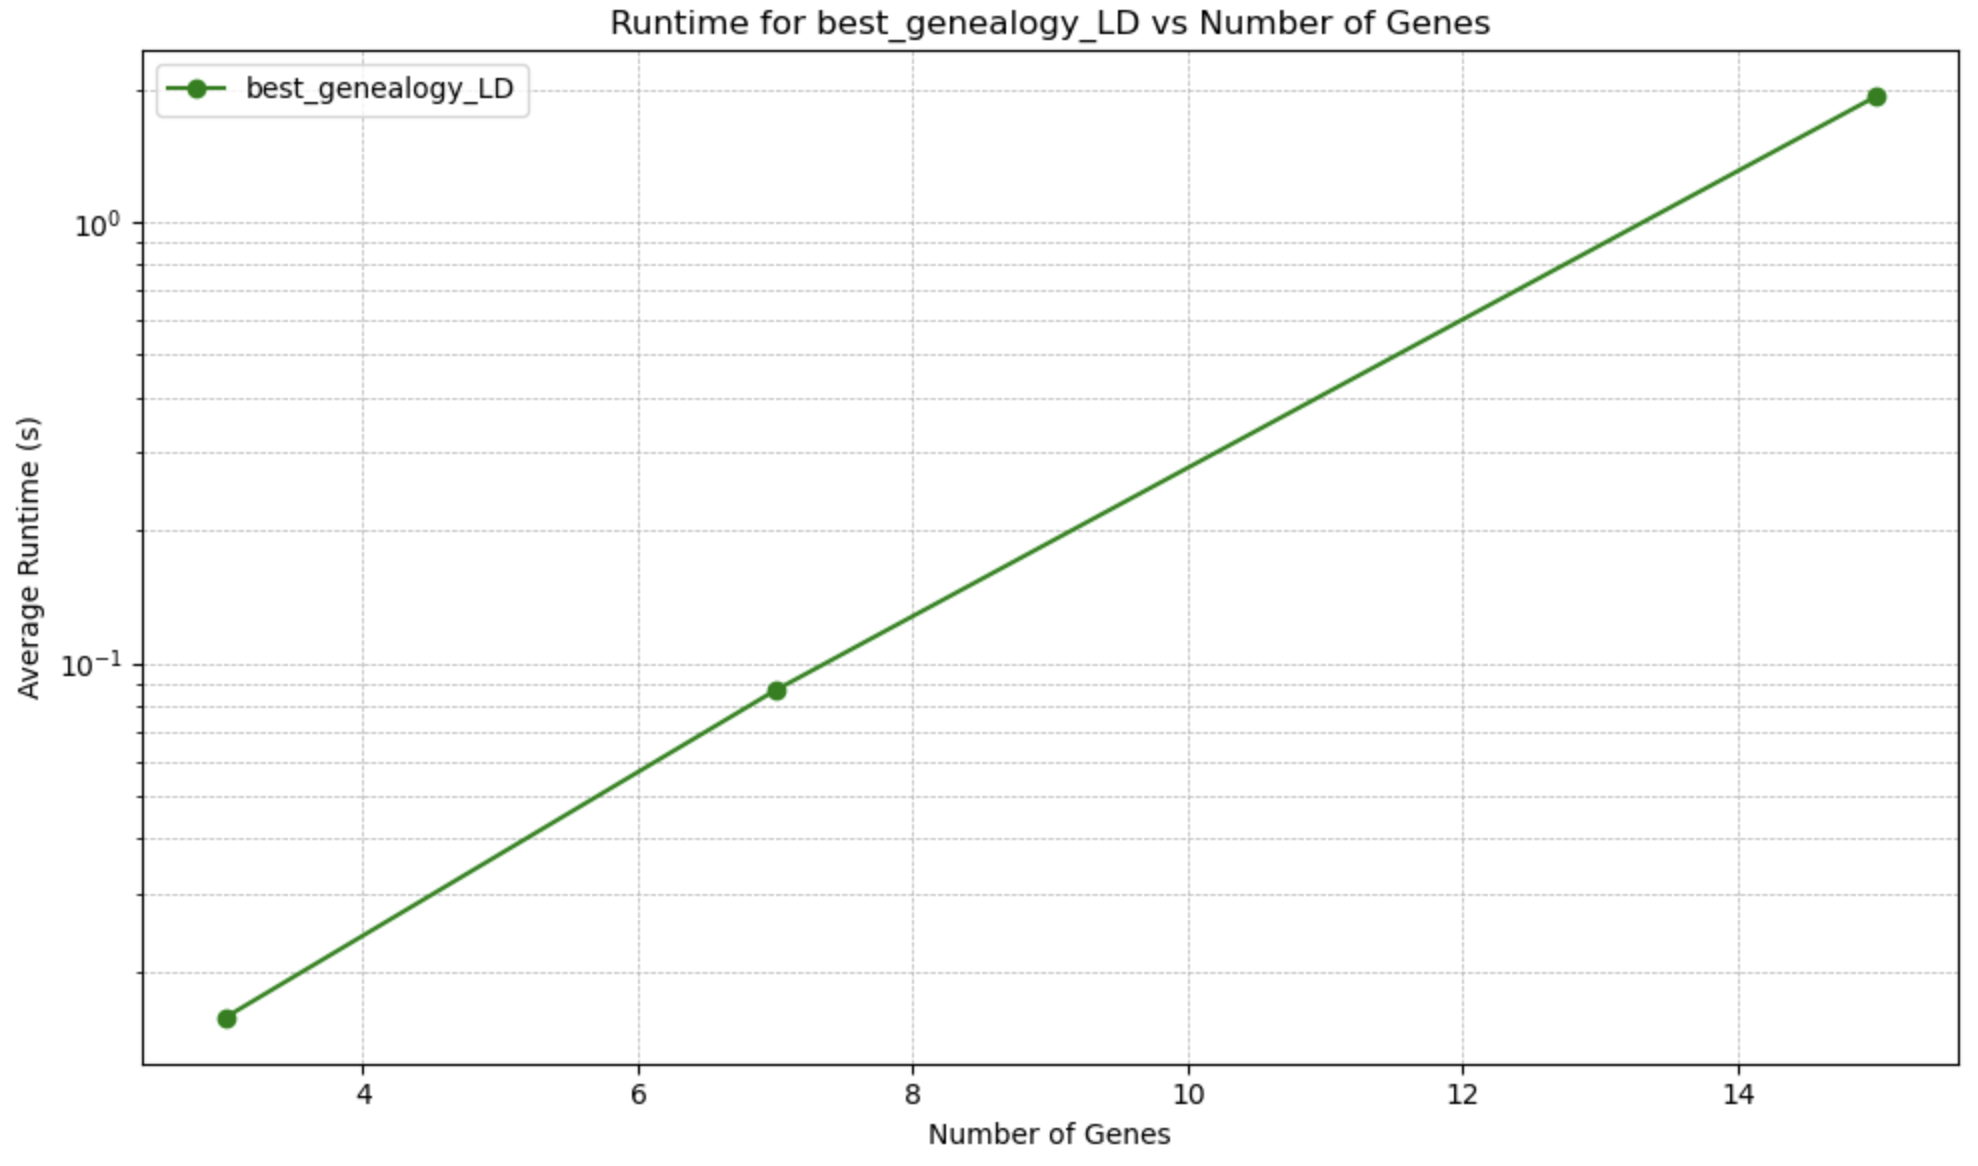

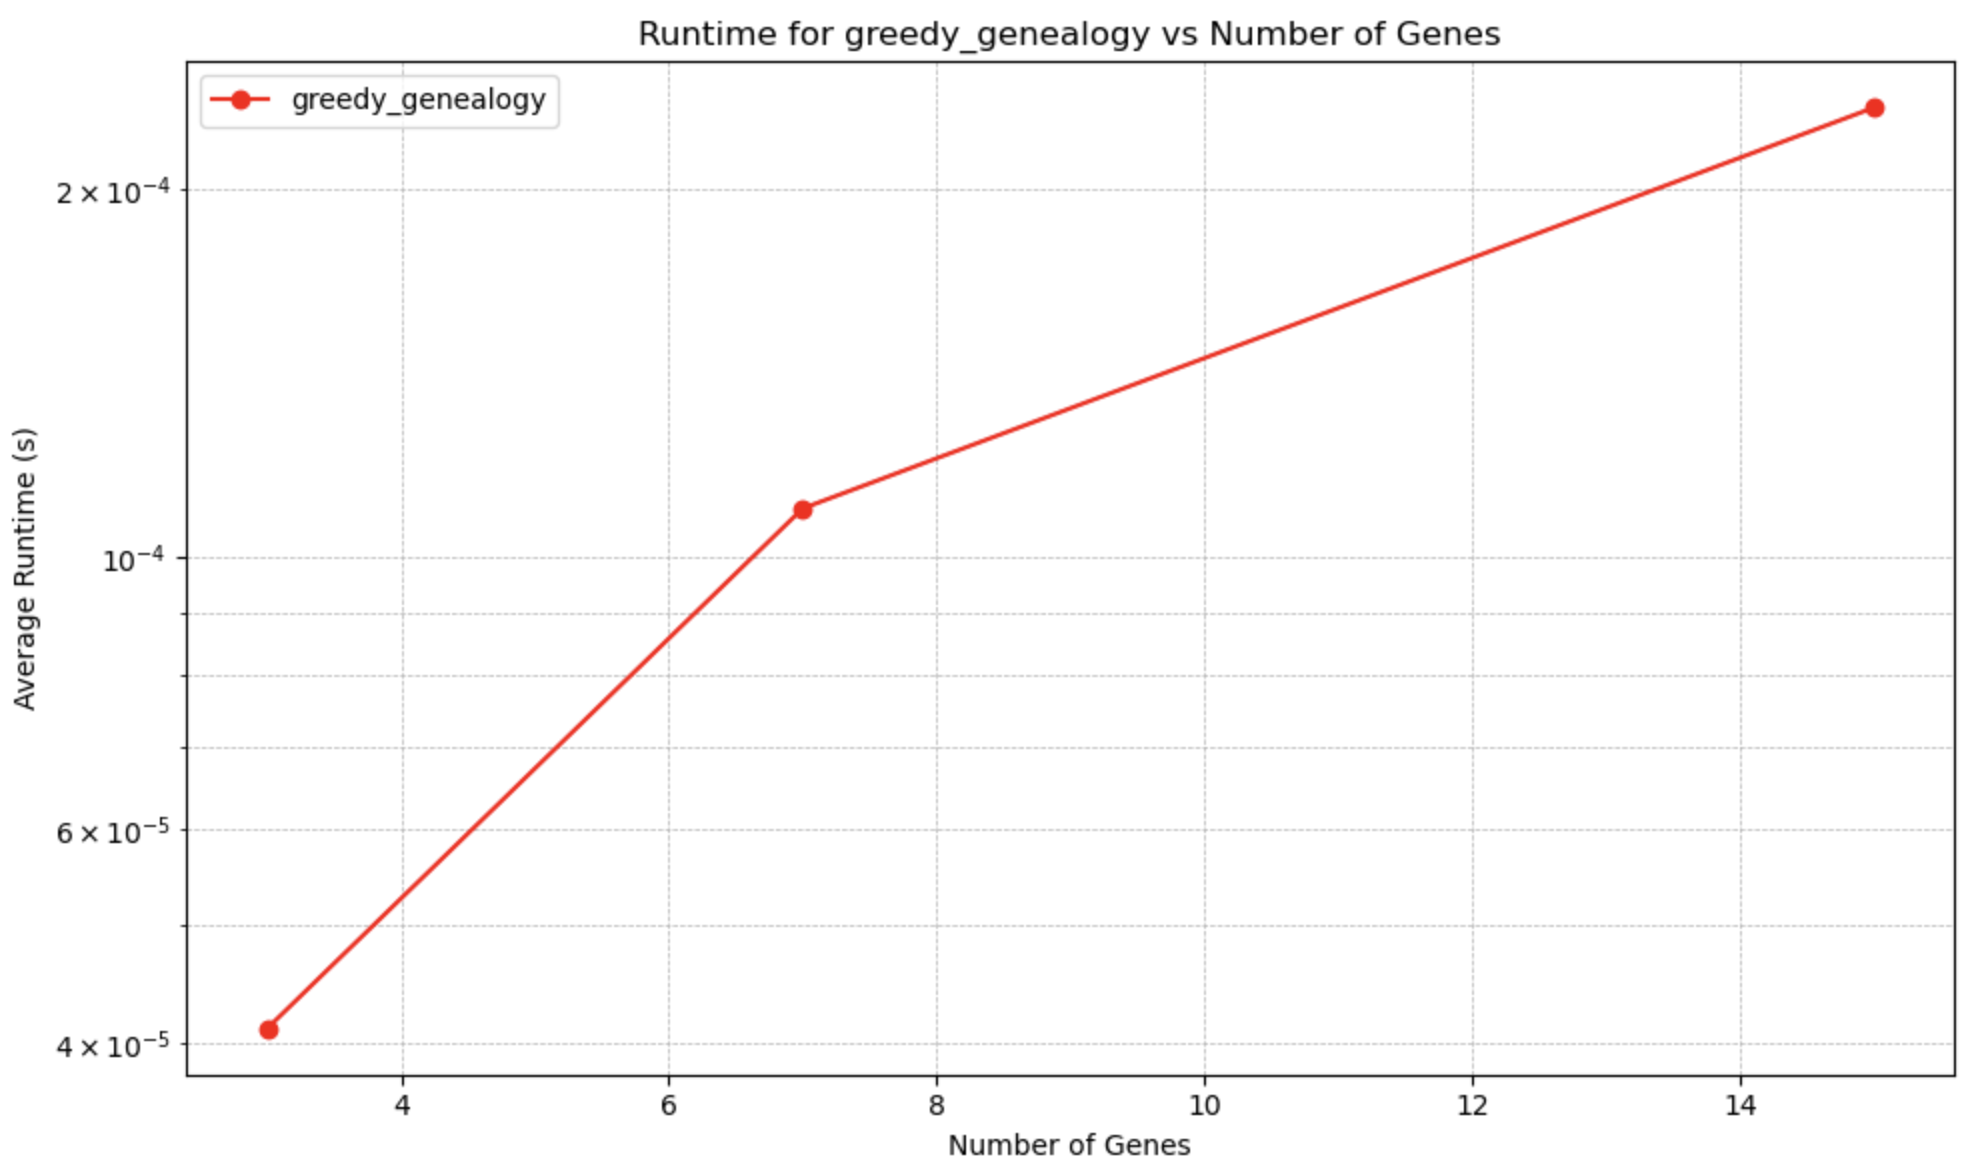

# 6. Probability Calcualtions

# Needleman-Wunsch Algorithm: Global Sequence Alignment

We can leverage our DNA strings and the parent-child relationships in the tree generated by our Global algorithm to estimate the probabilities of specific types of DNA modifications. We’ll count the occurrences of each modification type between a given parent and its child and then calculate the average frequency of that modification across all parent-child connections in the tree. For this step, we use the Needleman-Wunsch algorithm.

The Needleman-Wunsch algorithm is a dynamic programming method used for global sequence alignment. It optimally aligns two sequences (such as DNA, RNA, or proteins) by comparing their characters and penalizing differences, insertions, and deletions. This makes it particularly suitable for scenarios requiring a comprehensive, end-to-end comparison of two strings.


## How It Works

### 1. Scoring System
The algorithm assigns scores based on the following criteria:

- **Matches**: When characters are the same, a positive score is awarded. **(score +=1)**
- **Mismatches (Mutations)**: When characters differ, a negative score is applied. **(score -=1)**
- **Gaps (Insertions/Deletions)**: Insertions or deletions are penalized with a gap penalty. **(score -=2)**

---

### 2. Dynamic Programming Matrix

#### Initialization:
A matrix `dp` of size $$(m+1) \times (n+1)$$ is created, where `m` and `n` are the lengths of the two sequences.

- **First Row and Column**: The first row and first column of the matrix are initialized with cumulative gap penalties. This accounts for the cost of aligning a sequence with leading gaps in the other sequence.

$$
\text{dp}[i][0] = i \times \text{gap penalty for } 0 \leq i \leq m
$$
$$
\text{dp}[0][j] = j \times \text{gap penalty for } 0 \leq j \leq n
$$

#### Cell Representation:
Each cell `dp[i][j]` represents the optimal alignment score for the first `i` characters of string 1 and the first `j` characters of string 2.

---

### 3. Recursive Relationship
To compute `dp[i][j]`, the algorithm considers three possibilities:

1. **Match/Mismatch**:
   - **Operation**: Align characters $$s_1[i-1]$$ and $$s_2[j-1]$$.
   - **Score Calculation**:
     $$
     dp[i][j] = dp[i-1][j-1] + \begin{cases} 
     \text{match score, if } s_1[i-1] = s_2[j-1] \\
     \text{mismatch score, otherwise.}
     \end{cases}
     $$

2. **Insertion**:
   - **Operation**: Add a gap in string 2.
   - **Score Calculation**:
     $$
     dp[i][j] = dp[i][j-1] + \text{gap penalty}
     $$

3. **Deletion**:
   - **Operation**: Add a gap in string 1.
   - **Score Calculation**:
     $$
     dp[i][j] = dp[i-1][j] + \text{gap penalty}
     $$

**Optimal Score**:
The value of `dp[i][j]` is the maximum of the three calculated scores:
$$
\text{dp}[i][j] = \max(dp[i-1][j-1] + \text{match/mismatch score}, \, dp[i][j-1] + \text{gap penalty}, \, dp[i-1][j] + \text{gap penalty})
$$

---

### 4. Matrix Construction
The matrix is filled iteratively, typically from the top-left corner to the bottom-right corner. Each cell is computed based on the values of previously filled cells, ensuring that all possible alignment paths are considered systematically.

---

### 5. Backtracking
After the matrix is fully constructed, **backtracking** is performed to identify the optimal alignment. This step involves:

1. Starting from `dp[m][n]` and moving backwards through the matrix.
2. At each step, determining whether the current cell was reached via a match/mismatch, insertion, or deletion.
3. Reconstructing the sequence of matches, mismatches, insertions, and deletions that lead to the highest alignment score.

> **Note**: Backtracking is a separate process from the iterative matrix construction and does not involve recursion.

---

### 6. Counting Modifications Across All Pairs
- After aligning each pair:
  - Accumulates total counts of insertions, deletions, and mutations across all comparisons.
  - Sums the total number of characters from parent sequences to provide a reference length for probability calculations.

---
### 7.Calculating Probabilities (`estimate_modification_probabilities`)
- Probabilities are calculated as:
  - $P_{\text{insertion}} = \frac{\text{Total Insertions}}{\text{Total Number of Characters}}$
  - $P_{\text{deletion}} = \frac{\text{Total Deletions}}{\text{Total Number of Characters}}$
  - $P_{\text{mutation}} = \frac{\text{Total Mutations}}{\text{Total Number of Characters}}$

- "Total Number of Characters" acts as a scaling factor to estimate modification frequencies per character across the dataset.

---
## Efficiency and Time Complexity

### Time Complexity:
The Needleman-Wunsch algorithm processes each cell of the $(m+1) \times (n+1)$ matrix, where $m$ and $n$ are the lengths of the two strings. Each cell computation requires a constant amount of time $(O(1))$ to consider the three possible alignment scores.

**Overall time complexity**:
$$
O(m \cdot n)
$$

### Space Complexity:
The algorithm requires a $(m+1) \times (n+1)$ matrix to store alignment scores.

**Space complexity**:
$$
O(m \cdot n)
$$

----

## Why Needleman-Wunsch is Suitable for Our Problem

### 1. Global Alignment
The Needleman-Wunsch algorithm aligns entire sequences from start to end, which is essential for comparing two gene strings in their entirety. This ensures that the alignment considers all parts of both sequences, providing a comprehensive comparison.

### 2. Handling Insertions, Deletions, and Mutations
The algorithm explicitly identifies and penalizes:

- **Insertions**: Gaps in one string.
- **Deletions**: Gaps in the other string.
- **Mutations**: Mismatched characters.

This aligns perfectly with the need to estimate probabilities for these three events, allowing for accurate modeling of sequence differences.

### 3. Systematic Approach
The dynamic programming nature of Needleman-Wunsch ensures a systematic and optimal alignment between strings. By exploring all possible alignment paths and selecting the one with the highest score, the algorithm provides a clear method to quantify and classify differences.

### 4. Efficiency with Small Datasets
The Needleman-Wunsch algorithm is well-suited for small datasets due to its computational complexity of $O(m \cdot n)$. This makes it manageable and efficient for smaller sequences. The iterative dynamic programming approach ensures that the algorithm systematically explores all possible alignments without the overhead associated with recursive calls.


The **deletion probability (0.0440)** suggests that character removal occurs at a moderate rate. While not the most frequent event, deletions play a role in modifying the sequence but are less likely to significantly alter its overall structure.

The **insertion probability (0.0780)**, being higher than the deletion probability, indicates a stronger tendency to introduce new characters into the sequence. This is consistent with scenarios where growth or diversification is encouraged, as insertions can add new variations without necessarily compromising existing content.

The **mutation probability (0.0460)** is slightly higher than deletions but still relatively low compared to insertions. This suggests that substitutions are moderately likely but not overly disruptive, maintaining a balance between change and sequence stability.

While these probabilities appear reasonable in the context of this dataset, it is crucial to acknowledge that the dataset is very small. This limited sample size restricts our ability to make broader generalizations about mutation patterns in larger or more complex systems. 


## Why the Probabilities Don’t Sum to 1
- The computed probabilities represent **only the chances of modifications** (insertions, deletions, mutations), not the probability of **no change (matches)**.
- At each character position, four outcomes are possible:
  1. **No Change (Match)**: Character is identical in parent and child.
  2. **Deletion**: Character is missing in the child.
  3. **Insertion**: Character appears in the child but not the parent.
  4. **Mutation**: Character differs between parent and child.

- The sum of these probabilities satisfies:
  $$
  P_{\text{match}} + P_{\text{insertion}} + P_{\text{deletion}} + P_{\text{mutation}} = 1
  $$
- Since the code does not compute $P_{\text{match}}$, the three modification probabilities do not sum to 1.

### Refrences

Berger, B., Waterman, M. S., & Yu, Y. W. (2021, June). Levenshtein distance, sequence comparison and Biological Database Search. IEEE transactions on information theory. https://pmc.ncbi.nlm.nih.gov/articles/PMC8274556/ 

Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2022). Introduction to algorithms. The MIT Press. 

CS110 Session 24 - [14.1] Computational applications of dynamic programming and greedy algorithms


GeeksforGeeks. (2021, November 26). Spanning tree with maximum degree (using Kruskal’s algorithm). https://www.geeksforgeeks.org/spanning-tree-with-maximum-degree-using-kruskals-algorithm/ 

Wikimedia Foundation. (2024, November 25). Needleman–Wunsch algorithm. Wikipedia. https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm 

## Python Codes

### My MaxHeap Code Implemntation (Elboraey, 2024)

In [61]:
# Retreived from Alhassan Ahmed's Project 1 - Designing a Scheduler [A Day in the Life of a Minervan Part I]

from typing import List, Optional

class MaxHeap:
    """
    A max heap implementation using a list.
    The max heap property ensures that the largest element is always at the root.
    """

    def __init__(self):
        """
        Initializes an empty MaxHeap instance.
        """
        self.heap: List = []

    def left(self, i: int) -> int:
        """
        Computes the index of the left child for a given node index.

        Parameters
        ----------
        i : int
            Index of the parent node.

        Returns
        -------
        int
            Index of the left child node.
        """
        return 2 * i + 1

    def right(self, i: int) -> int:
        """
        Computes the index of the right child for a given node index.

        Parameters
        ----------
        i : int
            Index of the parent node.

        Returns
        -------
        int
            Index of the right child node.
        """
        return 2 * i + 2

    def parent(self, i: int) -> int:
        """
        Computes the index of the parent for a given node index.

        Parameters
        ----------
        i : int
            Index of the child node.

        Returns
        -------
        int
            Index of the parent node.
        """
        return (i - 1) // 2

    def heappush(self, item):
        """
        Inserts a new element into the heap, maintaining the max heap property.

        Parameters
        ----------
        item
            The element to insert into the heap.
        """
        self.heap.append(item)
        idx = len(self.heap) - 1

        # Bubble up to restore the heap property if violated
        while idx > 0 and self.heap[self.parent(idx)] < self.heap[idx]:
            # Swap with the parent
            self.heap[idx], self.heap[self.parent(idx)] = self.heap[self.parent(idx)], self.heap[idx]
            idx = self.parent(idx)

    def heapify(self, i: int):
        """
        Restores the max heap property by sifting down from the given index.

        Parameters
        ----------
        i : int
            Index to start the heapify operation.
        """
        largest = i
        left = self.left(i)
        right = self.right(i)
        
        # Determine the largest among parent, left child, and right child
        if left < len(self.heap) and self.heap[left] > self.heap[largest]:
            largest = left
        if right < len(self.heap) and self.heap[right] > self.heap[largest]:
            largest = right

        # If the largest is not the current node, swap and continue heapifying
        if largest != i:
            self.heap[i], self.heap[largest] = self.heap[largest], self.heap[i]
            self.heapify(largest)

    def heappop(self) -> Optional:
        """
        Removes and returns the maximum element from the heap.

        Returns
        -------
        Optional
            The largest element from the heap, or None if the heap is empty.
        """
        if not self.heap:
            return None
        if len(self.heap) == 1:
            return self.heap.pop()

        # Replace the root with the last element and restore heap property
        root = self.heap[0]
        self.heap[0] = self.heap.pop()
        self.heapify(0)
        return root

    def __len__(self):
        """
        Returns the number of elements in the heap.

        Returns
        -------
        int
            The size of the heap.
        """
        return len(self.heap)

    def clear(self):
        """
        Removes all elements from the heap, resetting it to an empty state.
        """
        self.heap = []


## 1. Python Implementaion for outputing all LCSs for those two strings

In [8]:
def validate_and_process_string(s):
    """
    Validates and processes a string for gene sequencing.

    This function performs the following steps:
    - Converts lowercase English letters to uppercase.
    - Ignores and reports invalid characters (non-English or non-alphabetic characters).

    Parameters
    ----------
    s : str
        The input string to be validated and processed.

    Returns
    -------
    str
        A processed string containing only uppercase English letters.
    """
    processed = []
    for char in s:
        if 'a' <= char <= 'z' or 'A' <= char <= 'Z':  # Check if the character is an English letter
            if char.islower():
                # Convert lowercase letters to uppercase
                processed.append(char.upper())
            else:
                # Keep uppercase letters as they are
                processed.append(char)
        else:
            # Report invalid characters to the user
            print(f"Error: '{char}' is not a valid character for a gene sequence.")
    return ''.join(processed)


### Testing the validate_and_process_string Function

The `validate_and_process_string` function validates and processes input strings by removing invalid characters and converting all lowercase letters to uppercase. These tests ensure the robustness of the function for various input scenarios.

In [10]:
# Test Case 1: Valid Uppercase String
# Measures: Whether the function correctly handles strings already in uppercase.
# Expected Output: "ATGC"
# Interaction: Since the input contains only valid uppercase letters, no changes are expected.
# Relevance: Ensures that valid inputs pass through the function unchanged.

assert validate_and_process_string("ATGC") == "ATGC"

# Test Case 2: Mixed Case String
# Measures: Whether the function converts lowercase letters to uppercase.
# Expected Output: "ATGC"
# Interaction: The input contains a mix of lowercase and uppercase letters, which should all be converted to uppercase.
# Relevance: Validates normalization of input strings to a consistent format.

assert validate_and_process_string("aTgC") == "ATGC"

# Test Case 3: String with Invalid Characters
# Measures: Whether the function removes invalid characters and retains only valid letters.
# Expected Output: "ATGC"
# Interaction: Invalid characters (digits, symbols) are filtered out, leaving only valid uppercase letters.
# Relevance: Ensures robust handling of inputs with mixed valid and invalid characters.

assert validate_and_process_string("aTgC123@#!") == "ATGC"

# Test Case 4: Empty String
# Measures: Whether the function correctly handles an empty input.
# Expected Output: ""
# Interaction: An empty string should simply return an empty string without errors.
# Relevance: Validates edge case handling for empty input.

assert validate_and_process_string("") == ""

# Test Case 5: String with Only Invalid Characters
# Measures: Whether the function returns an empty string when no valid characters are present.
# Expected Output: ""
# Interaction: Since all characters are invalid, the output should be an empty string.
# Relevance: Ensures the function gracefully handles inputs with no valid data.

assert validate_and_process_string("123#$%^&*()") == ""

# Test Case 6: Input with Whitespaces
# Measures: Whether the function removes whitespaces from the input.
# Expected Output: "ABCD"
# Interaction: Whitespace is not a valid character and should be filtered out.
# Relevance: Ensures the function can process inputs containing spaces.

assert validate_and_process_string("A B C D") == "ABCD"

# Test Case 7: Unicode Characters
# Measures: Whether the function handles Unicode characters correctly.
# Expected Output: ""
# Interaction: Non-English letters and symbols are invalid and should be removed.
# Relevance: Ensures robust handling of non-ASCII characters.

assert validate_and_process_string("éèêçã") == ""

Error: '1' is not a valid character for a gene sequence.
Error: '2' is not a valid character for a gene sequence.
Error: '3' is not a valid character for a gene sequence.
Error: '@' is not a valid character for a gene sequence.
Error: '#' is not a valid character for a gene sequence.
Error: '!' is not a valid character for a gene sequence.
Error: '1' is not a valid character for a gene sequence.
Error: '2' is not a valid character for a gene sequence.
Error: '3' is not a valid character for a gene sequence.
Error: '#' is not a valid character for a gene sequence.
Error: '$' is not a valid character for a gene sequence.
Error: '%' is not a valid character for a gene sequence.
Error: '^' is not a valid character for a gene sequence.
Error: '&' is not a valid character for a gene sequence.
Error: '*' is not a valid character for a gene sequence.
Error: '(' is not a valid character for a gene sequence.
Error: ')' is not a valid character for a gene sequence.
Error: ' ' is not a valid chara

In [14]:
import numpy as np

def lcs_table(x, y):
    """
    Constructs a lookup table for the Longest Common Subsequence (LCS) problem using dynamic programming.

    Parameters
    ----------
    x : str
        The first input string.
    y : str
        The second input string.

    Returns
    -------
    list of list of int
        A 2D list (matrix) where the cell at [i][j] contains the LCS length
        of the substrings `x[:i]` and `y[:j]`.
    """
    m, n = len(x), len(y)
    # Initialize a 2D table with zeros
    lookup_table = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if x[i - 1] == y[j - 1]:
                # Characters match: take the diagonal value and add 1
                lookup_table[i][j] = lookup_table[i - 1][j - 1] + 1
            else:
                # Characters do not match: take the maximum of top or left cell
                lookup_table[i][j] = max(lookup_table[i - 1][j], lookup_table[i][j - 1])
    return lookup_table


def find_all_lcs(x, y, m, n, lookup_table):
    """
    Recursively finds all unique Longest Common Subsequences (LCS) from the lookup table.

    Parameters
    ----------
    x : str
        The first input string.
    y : str
        The second input string.
    m : int
        The length of the first string considered in the current recursion.
    n : int
        The length of the second string considered in the current recursion.
    lookup_table : list of list of int
        The precomputed lookup table for LCS lengths.

    Returns
    -------
    list of str
        A list of all unique LCS strings.
    """
    if m == 0 or n == 0:
        return ['']  # Base case: no common subsequences when one string is empty

    if x[m - 1] == y[n - 1]:
        # If characters match, include this character in all subsequences
        lcs_list = find_all_lcs(x, y, m - 1, n - 1, lookup_table)
        return [lcs + x[m - 1] for lcs in lcs_list]
    else:
        result = []
        # Explore paths where the LCS length remains the same
        if lookup_table[m - 1][n] == lookup_table[m][n]:
            result += find_all_lcs(x, y, m - 1, n, lookup_table)
        if lookup_table[m][n - 1] == lookup_table[m][n]:
            result += find_all_lcs(x, y, m, n - 1, lookup_table)
        return list(set(result))  # Remove duplicates to ensure uniqueness


def longest_common_subsequences(x, y):
    """
    Computes all Longest Common Subsequences (LCS) of two input strings along with their length.

    - Validates and processes input strings to ensure they contain only uppercase letters.
    - Handles invalid characters gracefully and informs the user.

    Parameters
    ----------
    x : str
        The first input string.
    y : str
        The second input string.

    Returns
    -------
    tuple
        A tuple containing:
        - list of str: All unique LCS strings, sorted alphabetically.
        - int: The length of the LCS.
    """
    x = validate_and_process_string(x)
    y = validate_and_process_string(y)

    if len(x) == 0 or len(y) == 0:
        # If either string is empty, no LCS exists
        return ([], 0)

    # Generate the LCS lookup table
    lookup_table = lcs_table(x, y)
    lcs_length = lookup_table[len(x)][len(y)]  # Length of the LCS is in the last cell

    if lcs_length == 0:
        # If LCS length is 0, there are no common subsequences
        return ([], 0)

    # Find all LCS strings using the lookup table
    lcs_list = find_all_lcs(x, y, len(x), len(y), lookup_table)
    lcs_list = list(set(lcs_list))  # Remove duplicates for uniqueness

    return (lcs_list, lcs_length)

def compute_lcs_distance_matrix(strings, normalized=False):
    """
    Computes the Longest Common Subsequence (LCS) distance matrix for a list of strings.

    Parameters
    ----------
    strings : list of str
        List of strings to compute LCS distances between.
    normalized : bool, optional
        If True, compute the normalized LCS distance. Default is False.

    Returns
    -------
    numpy.ndarray
        An n x n matrix where entry (i, j) is the LCS distance between strings[i] and strings[j].
        If normalized=True, distances are scaled between 0 and 1.
    """
    # Number of strings in the list
    n = len(strings)
    # Initialize the distance matrix: float type for normalized, int otherwise
    distance_matrix = np.zeros((n, n), dtype=float if normalized else int)

    # Compute pairwise distances
    for i in range(n):
        for j in range(i + 1, n):
            # Get LCS data: lcs_list contains subsequences, lcs_length is their length
            lcs_list, lcs_length = longest_common_subsequences(strings[i], strings[j])

            if normalized:
                # Calculate maximum possible length for normalization
                max_len = len(strings[i]) + len(strings[j])
                if max_len == 0:  # Handle edge case of both strings being empty
                    distance = 0.0
                else:
                    distance = (max_len - 2 * lcs_length) / max_len
            else:
                # Unnormalized LCS distance
                distance = len(strings[i]) + len(strings[j]) - 2 * lcs_length

            # Update symmetric matrix
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance  # Symmetry: distance(i, j) == distance(j, i)

    return distance_matrix

### Testing the `lcs_table` Function

The `lcs_table` function constructs a lookup table for computing the **Longest Common Subsequence (LCS)** between two input strings using dynamic programming. This table captures the lengths of the LCS for substrings at each step, enabling efficient identification of the LCS.

In this section, we test the function against various scenarios, including:
1. **Standard Cases**: Strings with partial matches to verify the correctness of intermediate LCS lengths.
2. **Edge Cases**: Scenarios such as empty strings and completely non-matching inputs to ensure robustness.
3. **Identical Strings**: To confirm that the diagonal of the table increments as expected for fully matching sequences.


In [15]:
# Test Case 1: Strings with Partial Matches
# Measures: Whether the function computes intermediate LCS lengths correctly.
# Expected Output: 
# [
#   [0, 0, 0, 0, 0],
#   [0, 1, 1, 1, 1],
#   [0, 1, 1, 2, 2],
#   [0, 1, 2, 2, 2],
#   [0, 1, 2, 2, 3]
# ]
# Interaction: The function should compute LCS lengths progressively based on matching characters in the strings.
# Relevance: Validates the dynamic programming logic for LCS table construction.

assert lcs_table("ABCD", "ACBD") == [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1],
    [0, 1, 1, 2, 2],
    [0, 1, 2, 2, 2],
    [0, 1, 2, 2, 3]
]

# Test Case 2: One Empty String
# Measures: Whether the function handles one empty string input correctly.
# Expected Output: 
# [
#   [0, 0, 0, 0, 0]
# ]
# Interaction: Since one string is empty, the LCS length should be zero for all comparisons.
# Relevance: Ensures robustness when one of the inputs is empty.

assert lcs_table("ABCD", "") == [[0], [0], [0], [0], [0]]

# Test Case 3: Both Empty Strings
# Measures: Whether the function handles both strings being empty.
# Expected Output: [[0]]
# Interaction: The LCS length of two empty strings is zero, resulting in a single-cell table.
# Relevance: Validates edge case handling for completely empty inputs.

assert lcs_table("", "") == [[0]]

# Test Case 4: Completely Non-Matching Strings of Different Lengths
# Purpose: Verify that the function correctly handles input strings with no overlapping characters.
# Input: Strings "ABCD" (length 4) and "XYZ" (length 3).
# Expected Output: A 5x4 table (rows = len("ABCD") + 1, columns = len("XYZ") + 1) initialized with all zeros:
# [
#   [0, 0, 0, 0],
#   [0, 0, 0, 0],
#   [0, 0, 0, 0],
#   [0, 0, 0, 0],
#   [0, 0, 0, 0]
# ]
# Interaction: Since there are no common characters between the strings, every entry in the table should remain zero.
# Significance: This test ensures that the function handles non-matching inputs correctly and initializes the table accurately.

assert lcs_table("ABCD", "XYZ") == [
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
]

# Test Case 5: Completely Non-Matching Strings of the Same Length
# Purpose: Verify that the function correctly handles input strings of equal length with no overlapping characters.
# Input: Strings "ABCD" (length 4) and "WXYZ" (length 4).
# Expected Output: A 5x5 table (rows = len("ABCD") + 1, columns = len("WXYZ") + 1) initialized with all zeros:
# [
#   [0, 0, 0, 0, 0],
#   [0, 0, 0, 0, 0],
#   [0, 0, 0, 0, 0],
#   [0, 0, 0, 0, 0],
#   [0, 0, 0, 0, 0]
# ]
# Interaction: Since there are no common characters between the strings, every entry in the table should remain zero.
# Significance: This test ensures that the function initializes and processes a table correctly when 
# both input strings are of the same length but share no characters.

assert lcs_table("ABCD", "WXYZ") == [
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
]


# Test Case 6: Identical Strings
# Measures: Whether the function correctly handles identical strings.
# Expected Output: 
# [
#   [0, 0, 0, 0, 0],
#   [0, 1, 1, 1, 1],
#   [0, 1, 2, 2, 2],
#   [0, 1, 2, 3, 3],
#   [0, 1, 2, 3, 4]
# ]
# Interaction: The LCS length should increase along the diagonal of the table as all characters match.
# Relevance: Ensures correct behavior when both strings are identical.

assert lcs_table("AAAA", "AAAA") == [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1],
    [0, 1, 2, 2, 2],
    [0, 1, 2, 3, 3],
    [0, 1, 2, 3, 4]
]

# Test Case 7: Substrings with Same Prefix
# Measures: Whether the function handles common prefixes correctly.
# Expected Output: [
#   [0, 0, 0, 0, 0, 0, 0],
#   [0, 1, 1, 1, 1, 1, 1],
#   [0, 1, 2, 2, 2, 2, 2],
#   [0, 1, 2, 3, 3, 3, 3],
#   [0, 1, 2, 3, 3, 3, 3]
# ]
# Interaction: LCS should grow for the prefix "ABC" and remain stable afterward.
# Relevance: Validates handling of partially overlapping substrings.

assert lcs_table("ABCD", "ABCXYZ") == [
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 2, 2, 2, 2, 2],
    [0, 1, 2, 3, 3, 3, 3],
    [0, 1, 2, 3, 3, 3, 3]
]

# Test Case 8: Large Inputs with Diagonal Matches
# Measures: Whether the function computes LCS tables efficiently for large inputs.
# Expected Output: A diagonal table with increasing values for 1000 matches.
# Interaction: Every character matches, so the diagonal should contain incrementing values.
# Relevance: Validates scalability for large matching strings.

table = lcs_table("A" * 1000, "A" * 1000)
assert table[1000][1000] == 1000  # Last cell should equal the string length.



### Testing the `finding_all_lcs` Function
The `find_all_lcs` function identifies all unique **Longest Common Subsequences (LCS)** between two input strings based on a precomputed lookup table. By traversing the table recursively, the function collects all possible LCSs of maximum length, ensuring no duplicates are included.

In this section, we test the function for:
1. **Single LCS Cases**: Scenarios where only one LCS exists, to verify correctness in straightforward cases.
2. **Multiple LCS Cases**: Inputs with multiple equally long LCSs to ensure the function identifies all of them without duplicates.
3. **Edge Cases**: Inputs such as empty strings, completely disjoint strings, or strings with a single matching character, to validate robustness.

In [20]:
# Test Case 1: Single LCS Exists
# Measures: Whether the function correctly identifies a single LCS.
# Expected Output: ["AC"]
# Interaction: The characters 'A' and 'C' form the only LCS of length 2.
# Relevance: Ensures the function can correctly handle cases with a single LCS.

lookup_table = lcs_table("ABC", "AC")
assert find_all_lcs("ABC", "AC", 3, 2, lookup_table) == ["AC"]

# Test Case 2: Multiple LCSs of the Same Length
# Measures: Whether the function correctly identifies all LCSs of the same length.
# Expected Output: ['BCBA', 'BCAB', 'BDAB']
# Interaction: There are multiple LCSs of length 4 for the input strings.
# Relevance: Ensures the function identifies all possible LCSs and eliminates duplicates.

lookup_table = lcs_table("ABCBDAB", "BDCABA")
assert find_all_lcs("ABCBDAB", "BDCABA", 7, 6, lookup_table) == ['BCBA', 'BCAB', 'BDAB']

# Test Case 3: No Common Subsequence
# Measures: Whether the function correctly returns an empty list when no LCS exists.
# Expected Output: []
# Interaction: Since the strings have no matching characters, no LCS can be formed.
# Relevance: Ensures the function handles completely non-matching strings gracefully.

lookup_table = lcs_table("ABC", "XYZ")
assert find_all_lcs("ABC", "XYZ", 3, 3, lookup_table) == ['']

# Test Case 4: Single-Character Match
# Measures: Whether the function correctly identifies an LCS when there is only one matching character.
# Expected Output: ["A"]
# Interaction: The character 'A' is the only matching character between the strings.
# Relevance: Ensures the function handles minimal matching cases correctly.

lookup_table = lcs_table("A", "A")
assert find_all_lcs("A", "A", 1, 1, lookup_table) == ["A"]

# Test Case 5: Multiple Matches of Repeating Characters
# Measures: Whether the function handles strings with repeating characters correctly.
# Expected Output: ["AA"]
# Interaction: Both strings contain repeating 'A's, forming the LCS "AA".
# Relevance: Ensures correct behavior for inputs with repeated characters.

lookup_table = lcs_table("AAAA", "AA")
assert find_all_lcs("AAAA", "AA", 4, 2, lookup_table) == ["AA"]

# Test Case 6: One String Empty
# Measures: Whether the function handles cases where one string is empty.
# Expected Output: [""]
# Interaction: An empty string has no common subsequences with any other string.
# Relevance: Validates edge case handling for empty inputs.

lookup_table = lcs_table("ABC", "")
assert find_all_lcs("ABC", "", 3, 0, lookup_table) == [""]

# Test Case 7: Strings with Interleaved Matches
# Purpose: Verify that the function correctly identifies all possible longest common subsequences (LCS) 
#when matches are interleaved between the two strings.
# Expected Output: ['ABC', 'ABZ', 'AYZ', 'XYZ']
# Explanation: 
# - "ABC" is formed by taking 'A', 'B', and 'C' in sequence.
# - "ABZ" is formed by taking 'A', 'B', and 'Z' in sequence.
# - "AYZ" is formed by taking 'A', 'Y', and 'Z' in sequence.
# - "XYZ" is formed by taking 'X', 'Y', and 'Z' in sequence.
# Relevance: Validates that the function can handle interleaved matching characters and return all valid LCS of the same maximum length.
# Note: The function is expected to return all valid LCS combinations, not just one.

lookup_table = lcs_table("ABCXYZ", "XAYBZC")
assert find_all_lcs("ABCXYZ", "XAYBZC", 6, 6, lookup_table) == ['ABC', 'XYZ', 'ABZ', 'AYZ']

# Test Case 8: Highly Similar Strings with Minor Differences
# Measures: Whether the function handles minor differences in similar strings.
# Expected Output: ["ABCE"]
# Interaction: The minor difference 'X' in the second string excludes it from the LCS.
# Relevance: Ensures correctness for small differences in inputs.

lookup_table = lcs_table("ABCDE", "ABCXE")
assert find_all_lcs("ABCDE", "ABCXE", 5, 5, lookup_table) == ["ABCE"]

### Test Cases for `longest_common_subsequences`

The `longest_common_subsequences` function integrates the entire pipeline of LCS computation, from input validation to identifying all possible Longest Common Subsequences (LCSs) and their lengths. This function ensures robust handling of diverse inputs, including filtering invalid characters and computing the LCS accurately using dynamic programming.

In this section, we evaluate the function across various scenarios:
1. **Standard Cases**: Inputs with partial or complete matches to verify correct computation of LCS and its length.
2. **Edge Cases**: Scenarios such as empty strings, completely non-matching strings, and single-character matches to ensure resilience and correctness.
3. **Performance Cases**: Testing with long strings and repetitive patterns to validate the function's scalability and efficiency.

In [ ]:
# Test Case 1: Valid Input with Multiple LCS
# Measures: Whether the function correctly identifies all LCSs and their length for valid input.
# Expected Output: (["BDAB", "BCBA", "BCAB"], 4)
# Interaction: The function should validate the input strings, compute the LCS table, and find all LCSs of the correct length.
# Relevance: Ensures the entire pipeline works correctly for inputs with multiple LCSs.

assert longest_common_subsequences("ABCBDAB", "BDCABA") == (['BCBA', 'BCAB', 'BDAB'], 4)

# Test Case 2: Completely Non-Matching Strings
# Measures: Whether the function handles strings with no common subsequences correctly.
# Expected Output: ([], 0)
# Interaction: Since there are no matching characters, the output should indicate no LCS and a length of 0.
# Relevance: Validates handling of cases where no LCS exists.

assert longest_common_subsequences("ABC", "XYZ") == ([], 0)

# Test Case 3: Single Matching Character
# Measures: Whether the function identifies the single LCS when only one character matches.
# Expected Output: (["A"], 1)
# Interaction: The function should isolate the single matching character as the LCS.
# Relevance: Ensures correctness for minimal matching cases.

assert longest_common_subsequences("abc", "a") == (["A"], 1)

# Test Case 4: One Empty String
# Measures: Whether the function handles cases where one input string is empty.
# Expected Output: ([], 0)
# Interaction: An empty string has no LCS with any other string.
# Relevance: Validates edge case handling for empty string inputs.

assert longest_common_subsequences("abc", "") == ([], 0)

# Test Case 5: Both Strings Empty
# Measures: Whether the function handles cases where both input strings are empty.
# Expected Output: ([], 0)
# Interaction: With no input characters, there is no LCS to compute.
# Relevance: Ensures the function gracefully handles completely empty inputs.

assert longest_common_subsequences("", "") == ([], 0)

# Test Case 6: Identical Strings
# Measures: Whether the function correctly identifies the entire string as the LCS when inputs are identical.
# Expected Output: (["AAAA"], 4)
# Interaction: The function should recognize the full input string as the LCS.
# Relevance: Validates behavior when inputs are exactly the same.

assert longest_common_subsequences("AAAA", "AAAA") == (["AAAA"], 4)

# Test Case 7: Input with Invalid Characters
# Measures: Whether the function correctly filters out invalid characters before computing LCS.
# Expected Output: (["AC"], 2)
# Interaction: The input strings contain numbers and special characters, which should be removed during validation.
# Relevance: Ensures robustness of input validation and normalization.

assert longest_common_subsequences("a1c3", "!@acb") == (["AC"], 2)

# Test Case 8: Long Repeating Characters
# Measures: Whether the function handles strings with long repeating characters efficiently.
# Expected Output: (["AAA"], 3)
# Interaction: The function should correctly find the longest subsequence of matching repeated characters.
# Relevance: Validates performance and correctness for repetitive inputs.

assert longest_common_subsequences("AAAAAA", "AAA") == (["AAA"], 3)

# Test Case 9: Very Long Strings
# Measures: Whether the function performs efficiently and correctly on large inputs.
# Expected Output: (["AAAA...AAAA"], 1000)  # LCS of length 1000
# Interaction: Both input strings contain the same character repeated, so the LCS should be the full string.
# Relevance: Validates performance and correctness for large inputs with simple matches.

assert longest_common_subsequences("A" * 1000, "A" * 1000) == (["A" * 1000], 1000)

# Test Case 10: Highly Repetitive Input with Subsequence Matches
# Measures: Whether the function correctly identifies subsequences in repetitive inputs.
# Expected Output: (["BABA"], 4)
# Interaction: Both strings contain alternating sequences of 'A' and 'B', forming the LCS.
# Relevance: Ensures correctness for repetitive patterns with partial overlaps.

assert longest_common_subsequences("ABABABAB", "BABA") == (["BABA"], 4)

# Test Case 11: Complex Multiple LCSs
# Measures: Whether the function identifies all possible LCSs in complex cases.
# Expected Output: (["ACBD", "ACDB"], 4)
# Interaction: The strings have multiple valid subsequences of the same length.
# Relevance: Ensures the function handles cases with multiple optimal LCSs and outputs them uniquely.

assert longest_common_subsequences("ACBDB", "ACDAB") == (["ACDB"], 4)

# Test Case 12: Strings with Special Characters (Post-Validation)
# Measures: Whether the function processes inputs with special characters correctly after validation.
# Expected Output: (["AB"], 2)
# Interaction: Special characters should be removed during validation, leaving only valid letters for LCS computation.
# Relevance: Validates input sanitation as part of the pipeline.

assert longest_common_subsequences("A!@B#C", "AB$%") == (["AB"], 2)

# Test Case 13: Long Strings with Few Matches
# Measures: Whether the function performs correctly and efficiently when matches are sparse.
# Expected Output: (["A"], 1)
# Interaction: Despite the length of the strings, the only LCS is the single matching character 'A'.
# Relevance: Ensures correctness in sparse matching scenarios and validates efficiency for long inputs.

assert longest_common_subsequences("A" + "X" * 999, "A" + "Y" * 999) == (["A"], 1)

# Test Case 14: Case Sensitivity with Validation
# Measures: Whether the function normalizes mixed-case inputs correctly.
# Expected Output: (["ABC"], 3)
# Interaction: Input strings with mixed cases should be converted to uppercase, preserving matches.
# Relevance: Ensures consistent handling of case normalization.

assert longest_common_subsequences("aBc", "ABC") == (["ABC"], 3)

# Test Case 15: Empty LCS in Long Strings
# Measures: Whether the function handles large strings with no matches correctly.
# Expected Output: ([], 0)
# Interaction: Since there are no matching characters between the two strings, the LCS should be empty.
# Relevance: Validates efficiency and correctness for mismatched large inputs.

assert longest_common_subsequences("A" * 1000, "B" * 1000) == ([], 0)

# Test Case 16: Strings with Overlapping Subsequence Candidates
# Measures: Whether the function identifies the correct LCS when overlaps exist.
# Expected Output: (["BABA"], 4)
# Interaction: Overlapping subsequences are present, but only the longest should be selected.
# Relevance: Ensures correctness in resolving overlaps in subsequences.

assert longest_common_subsequences("ABABA", "BABA") == (['BABA'], 4)

# Test Case 17: Combination of Repeating and Unique Characters
# Measures: Whether the function identifies mixed patterns of repeating and unique characters.
# Expected Output: (["ABABC"], 5)
# Interaction: The repeating and unique patterns combine to form the LCS.
# Relevance: Ensures correctness for mixed patterns.

assert longest_common_subsequences("AAABBBCCC", "ABABABC") == (["ABABC"], 5)

# Test Case 18: Strings with One Large Subsequence
# Measures: Whether the function handles inputs with one clear LCS.
# Expected Output: (["ABC"], 3)
# Interaction: The LCS is formed by the clear sequence "ABC".
# Relevance: Validates correctness for inputs with straightforward LCS.

assert longest_common_subsequences("AXBYCZ", "ABC") == (["ABC"], 3)

# Test Case 19: Performance Under Heavy Load
# Measures: Whether the function scales efficiently with long strings and limited matches.
# Expected Output: (["A"], 1)
# Interaction: Despite the long inputs, the only LCS is the single character 'A'.
# Relevance: Tests scalability and correctness in heavy load scenarios.

assert longest_common_subsequences("A" + "X" * 999999, "A" + "Y" * 999999) == (["A"], 1)



# 2. Checking the LCS of the Genes in our set_strings dataset

In [35]:
set_strings=[('a','ATGGTGCGAAAGCATCTCTTTTCGTGGCGTGATAAGTTTTATGGTATCCCCGGACGTTGGCTACTACAATTCTCCGAAGTATAAGTGAGTAGGATATGTCAATAACAAGAGGGGATGCGTGACGCATTAGCACCAACTGAATCAAACGATAACTAACGTGGTTTCAGTGAGCGTATGTGGCAAAGGATTGGATACATTTTTCGAGCACGTCTACATAATGACCGTGACAATACTGGAGACTCCGTACCGTCATCTTGACACTCCT'), 
             ('b','TGGTGCGAAAGCATCTCTTTTCCGTGGCGTATAGTTTTATGGTATCCCCGGAACGCTGGCTACTACAATCTCCGAAGTATAGAGTGAGTAGATTTAATTAACAGAGGGCGTCGTTGACGCATTAGCACCAACTGAATCAACCGATAACTTAACGTGGGTTTCAGTGACTATAGGGCAAAGGATGAACATTTTCGAGCAGCTCTAATAATGAGCGTGACAATATGAATCCACACCGTCATCTTGAACTCCT'), 
             ('c','TCTGTGCGATATACATCTCTATCGTTGCGGTATGTTTTATGTGCATCACCCCACGCGCTGGCTACAGTACAATCTGCTGGAAGTACTAGGTGGTAGTTAATAACTAGGGTGCGTCGTTGCGCATTACACAACTGGACAACCACTTAACTGGGGTAATCAGTGTTTAGGGCAGACAAGATGAAAACAAGTTTTCGAGCAGGCTCCTATAATGAGGACGGAACGTTAATAAATCCAACACCGCACTGCTTCGTAACCCT'), 
             ('d','ATGAGGCGCAAAATTCTCTTTCTCGTGGCGCTGATTAAGTTTTATGTATCCCCGGACGTTGGCTACTGACAATTGCTCCGAAGTATAAAGTAGTAGGATATGTCAATAACAAAGACGGGGATAGCGTGACAGCATTAGAACGCAACTGGAATCAAACGTAACCTAAAGGGTTGTCAGGAGCGTATGTGGTCAAAAAGGATTGGATGACATTTTTCGACACGTCTACATAATGACCTGTGACAAACTAGGAGACCTCCTACTCGGTCAATCTTGACGACTCCT'), 
             ('e','TGGTGCGATATACATCTCTTTTCGTGCGTATGTTTTATGGTGATCACCCGGAACCGCTGGCTACATACAATCTCTGGAAGTACTAGGTGGTAGTTTAATAACTAGAGGTGCGTCGTTGACGCATTACACAACTGGATCAACCGAACTTAACTGGGTATCAGTGATATAGGGCGACAAGATGAACAATTTTCGAGCAGCTCCTGAATAATGAGACGGAACGTATAATCCAACACCGTCACTGCTTCGAACCCT'), 
             ('f','GGGGGAAAGCGATCCCTTATCGTGGCTGTGATAAGTTTTTATCGGGTATCCGCCGGACGTTGGCGTACTACAATTCTCCGAAGTTAAGTGAGTTAGGGATATAGTCAATAACAAGAGGGGATTGTCGTGACGCATAGCACACAACTGAATCAAATCGATAACTAAACGGGTTTCAGTAGAGCGTTGTGGCAAAGATTGGATACATTTTTCGCAGGACGTCTTACCTAATGACGTGGACAATAACTGGCAGACGTCCGTACCGTCATCTTGACCACTCCCT'), 
             ('g','TGGTGCGATATACATCCTCTTTTCGTGCGTATGTTTTAGGTACACCGGATACGCCTGGCTTACAAGTACCAATCTCTGAGAAGTCACTGAGGTGGTAGTTTAATAACTAGAAGGGTGCGTCGGACGCATTCACACATACTGGATCAACCGAGACTTAACTGGGGTATCAGTGATTGATAGGGCGACAAGATATACAATTTTCGAGCAGCTCCCTGAATAAGTGAAGAACGGAGACGTATAATCCAACACGATTCACTGCTTCGAACCCT')]

In [27]:
import pandas as pd
import numpy as np

labels, strings = zip(*set_strings)  # labels = ('a','b','c','d','e','f','g')
strings = list(strings)

# Create a 7x7 matrix of LCS lengths
len_lcs_matrix = np.zeros((7, 7), dtype=int)
for i in range(7):
    for j in range(7):
        # Compute LCS length of strings[i] and strings[j]
        lookup = lcs_table(strings[i], strings[j])
        lcs_length = lookup[len(strings[i])][len(strings[j])]
        len_lcs_matrix[i, j] = lcs_length

# Convert the matrix to a pandas DataFrame
df = pd.DataFrame(len_lcs_matrix, index=labels, columns=labels)

# Display the LCS Length Matrix
print("LCS Length Matrix:")
print(df)


LCS Length Matrix:
     a    b    c    d    e    f    g
a  265  235  199  252  214  251  212
b  235  250  211  223  227  223  220
c  199  211  257  197  234  195  229
d  252  223  197  282  207  241  205
e  214  227  234  207  252  205  243
f  251  223  195  241  205  280  208
g  212  220  229  205  243  208  269


### 3.1 Implementation of Greedy staretgy for Tree Construction

In [28]:
def greedy_genealogy(labels, strings, len_lcs_matrix):
    """
    Constructs a genealogy tree using a greedy algorithm based on the Longest Common Subsequence (LCS) lengths.
    
    This method identifies a "grandparent" (the string with the highest average LCS score)
    and then assigns two "parents" and their respective "children" based on LCS scores.

    Parameters
    ----------
    labels : list of str
        A list of unique labels for the strings.
    strings : list of str
        A list of strings corresponding to the labels.
    len_lcs_matrix : numpy.ndarray
        A 2D array where len_lcs_matrix[i][j] contains the LCS length between strings[i] and strings[j].

    Returns
    -------
    dict
        A dictionary representing the genealogy tree.
        The keys are the grandparent and parent labels, and the values are lists of their children labels.
        If the number of labels is too small (n < 5), a minimal fallback tree is returned.
    """
    # Validate and process the input strings to ensure uniformity
    strings = [validate_and_process_string(s) for s in strings]

    n = len(labels)
    if n < 5:
        # Fallback for insufficient labels
        return {labels[0]: labels[1:]} if n > 1 else {labels[0]: []}

    # Calculate average LCS for each string
    avg_lcs = len_lcs_matrix.sum(axis=1) / (n - 1)

    # Identify grandparent (max avg_lcs)
    gp_idx = np.argmax(avg_lcs)
    grandparent = labels[gp_idx]

    # Find potential parents based on LCS with grandparent
    candidates = [(labels[i], len_lcs_matrix[gp_idx, i], i) for i in range(n) if i != gp_idx]

    # Push candidates into a max heap based on their LCS score (c[1])
    parents_heap = MaxHeap()
    for c in candidates:
        # Store as (score, label, index) to compare by score first
        parents_heap.heappush((c[1], c[0], c[2]))

    # Extract top 2 parents
    parents = []
    for _ in range(min(2, len(parents_heap))):
        score, label, idx = parents_heap.heappop()
        parents.append((label, score, idx))

    if len(parents) < 2:
        return {grandparent: [p[0] for p in parents]}

    used_indices = {gp_idx, parents[0][2], parents[1][2]}
    tree = {grandparent: [parents[0][0], parents[1][0]]}

    # Assign children to each parent
    for parent_label, parent_score, parent_idx in parents:
        # Potential children for this parent
        grandchildren_candidates = [
            (labels[i], len_lcs_matrix[parent_idx, i], i)
            for i in range(n) if i not in used_indices
        ]

        children_heap = MaxHeap()
        for gc in grandchildren_candidates:
            children_heap.heappush((gc[1], gc[0], gc[2]))

        g_children = []
        for _ in range(min(2, len(children_heap))):
            score, gclabel, gcidx = children_heap.heappop()
            g_children.append((gclabel, score, gcidx))

        tree[parent_label] = [gc[0] for gc in g_children]
        used_indices.update(gc[2] for gc in g_children)

    return tree

In [31]:
greedy_tree = greedy_genealogy(labels, strings, len_lcs_matrix)
print("Greedy Genealogy Tree:")
print(greedy_tree)

Greedy Genealogy Tree:
{'a': ['d', 'f'], 'd': ['b', 'e'], 'f': ['g', 'c']}


## 3.2 Implementation of DP Global Strategy

In [48]:
import numpy as np

def levenshtein_distance(s1, s2):
    """
    Computes the Levenshtein Distance (edit distance) between two strings using a space-optimized dynamic programming approach.
    
    Parameters
    ----------
    s1 : str
        First string.
    s2 : str
        Second string.
    
    Returns
    -------
    int
        The Levenshtein distance between s1 and s2.
    """
    m, n = len(s1), len(s2)
    if m < n:
        s1, s2 = s2, s1
        m, n = n, m
    previous = list(range(n + 1))
    current = [0] * (n + 1)
    for i in range(1, m + 1):
        current[0] = i
        c1 = s1[i - 1]
        for j in range(1, n + 1):
            if c1 == s2[j - 1]:
                current[j] = previous[j - 1]
            else:
                current[j] = 1 + min(previous[j], current[j - 1], previous[j - 1])
        previous, current = current, previous
    return previous[n]

def compute_distance_matrix(strings):
    """
    Computes the Levenshtein Distance matrix for a list of strings using symmetry to reduce computations.
    
    Parameters
    ----------
    strings : list of str
        List of strings to compute distances between.
    
    Returns
    -------
    numpy.ndarray
        An n x n matrix where entry (i, j) is the Levenshtein distance between strings[i] and strings[j].
    """
    n = len(strings)
    matrix = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(i + 1, n):
            dist = levenshtein_distance(strings[i], strings[j])
            matrix[i][j] = dist
            matrix[j][i] = dist
    return matrix

def generate_combinations_iterative(arr, r):
    """
    Generate all combinations of r elements from the array using an iterative approach.
    
    Parameters
    ----------
    arr : list
        List of elements to generate combinations from.
    r : int
        Number of elements in each combination.
    
    Returns
    -------
    list of frozenset
        A list containing all possible combinations of r elements as frozensets.
    """
    n = len(arr)
    if r > n:
        return []
    combinations = []
    indices = list(range(r))
    while True:
        # Add current combination as a frozenset
        current_combination = frozenset(arr[i] for i in indices)
        combinations.append(current_combination)
        
        # Find the first index from the end that can be incremented
        for i in reversed(range(r)):
            if indices[i] != i + n - r:
                break
        else:
            # All combinations have been generated
            return combinations
        # Increment this index
        indices[i] += 1
        # Update subsequent indices
        for j in range(i + 1, r):
            indices[j] = indices[j - 1] + 1

def is_perfect_binary_tree_size(n):
    """
    Checks if n corresponds to a perfect binary tree size (n = 2^k - 1 for some integer k >=1) using bitwise operations.
    
    Parameters
    ----------
    n : int
        Number of nodes.
    
    Returns
    -------
    bool
        True if n is of the form 2^k -1, False otherwise.
    """
    return n >= 1 and ((n + 1) & n) == 0

def best_genealogy_LD(labels, strings, n=7):
    """
    Finds the globally optimal perfect genealogy tree using a bottom-up dynamic programming approach with optimized data structures.
    
    Parameters
    ----------
    labels : list of str
        List of labels for each node.
    strings : list of str
        List of strings corresponding to each node.
    n : int, optional
        Number of nodes. Must be of the form 2^k - 1 for some integer k >=1 (default is 7).
    
    Returns
    -------
    best_score : float
        The best (maximum) score found.
    best_structure : tuple
        Nested tuple representation of the tree:
        (Root_label, (Left_Subtree, Right_Subtree))
        Each subtree is either a label (for leaves) or a nested tuple similarly.
    
    Raises
    ------
    ValueError
        If `n` is not of the form 2^k -1, or if the lengths of `labels` and `strings` do not match `n`.
    """
    if not is_perfect_binary_tree_size(n):
        raise ValueError(f"Invalid number of nodes `n={n}`. `n` must be of the form 2^k - 1 for some integer k >=1.")
    if len(labels) != n or len(strings) != n:
        raise ValueError(f"Length of `labels` and `strings` must both be equal to `n={n}`.")
    
    indices = list(range(n))
    
    # Compute distance and similarity matrices
    distance_matrix = compute_distance_matrix(strings)
    max_dist = distance_matrix.max() if n > 0 else 0
    similarity_matrix = max_dist - distance_matrix  # Higher similarity corresponds to smaller distance
    
    # Initialize DP dictionary
    # Key: frozenset of node indices representing the subset
    # Value: (best_score, best_structure)
    dp = {}
    
    # Initialize DP for subsets of size 1 (leaf nodes)
    for i in indices:
        subset = frozenset([i])
        dp[subset] = (0.0, labels[i])
    
    # Determine all perfect binary tree sizes up to n
    tree_sizes = []
    k = 1
    while (2 ** k - 1) <= n:
        tree_sizes.append(2 ** k - 1)
        k += 1
    
    # Precompute all combinations for possible subtree sizes
    combination_cache = {}
    for size in tree_sizes[1:]:  # Skipping size=1 as already initialized
        left_right_size = (size - 1) // 2
        if left_right_size not in combination_cache:
            # Generate all combinations of left_right_size from indices
            combination_cache[left_right_size] = generate_combinations_iterative(indices, left_right_size)
    
    # Iterate through all tree sizes starting from 3
    for size in tree_sizes[1:]:
        left_right_size = (size - 1) // 2
        subsets = generate_combinations_iterative(indices, size)
        for subset in subsets:
            best_score = float('-inf')
            best_structure = None
            
            # Iterate over all possible roots in the subset
            for root in subset:
                remaining = subset - frozenset([root])
                
                # Generate all possible left subtree combinations
                left_combinations = combination_cache[left_right_size]
                for left_group in left_combinations:
                    if left_group.issubset(remaining):
                        left_subset = left_group
                        right_subset = remaining - left_group
                        
                        # Retrieve best subtrees for left and right groups
                        left = dp.get(left_subset)
                        right = dp.get(right_subset)
                        if left is None or right is None:
                            continue  # Invalid partition
                        left_score, left_structure = left
                        right_score, right_structure = right
                        
                        # Find indices of the left and right subtree roots
                        # Assuming that the structure tuple starts with the root label
                        left_root_label = left_structure if isinstance(left_structure, str) else left_structure[0]
                        right_root_label = right_structure if isinstance(right_structure, str) else right_structure[0]
                        
                        try:
                            left_root_idx = labels.index(left_root_label)
                            right_root_idx = labels.index(right_root_label)
                        except ValueError:
                            # Inconsistent labeling
                            continue
                        
                        # Compute the total score
                        total_score = (
                            similarity_matrix[root][left_root_idx] +
                            similarity_matrix[root][right_root_idx] +
                            left_score +
                            right_score
                        )
                        
                        # Update the best score and structure if necessary
                        if total_score > best_score:
                            best_score = total_score
                            best_structure = (
                                labels[root],
                                (left_structure, right_structure)
                            )
            
            if best_structure is not None:
                dp[subset] = (best_score, best_structure)
    
    # Retrieve the best score and structure for the full set of nodes
    full_set = frozenset(indices)
    best = dp.get(full_set)
    if best is None:
        return float('-inf'), None
    best_score, best_structure = best
    
    return best_score, best_structure


In [53]:
dp_score, dp_tree = best_genealogy_LD(labels, strings)
print("LD (Global) Best Score:", dp_score)
print("LD (Global) Tree Structure:", dp_tree)

LD (Global) Best Score: 443.0
LD (Global) Tree Structure: ('b', (('a', ('d', 'f')), ('e', ('c', 'g'))))


## Implementation of MST Global Strategy <u>(Not mentioned in the assigenment)<u>

In [47]:
import numpy as np

def levenshtein_distance(s1, s2):
    """
    Computes the Levenshtein Distance between two strings.

    Parameters
    ----------
    s1 : str
        The first input string.
    s2 : str
        The second input string.

    Returns
    -------
    int
        The Levenshtein Distance between `s1` and `s2`, representing the 
        minimum number of single-character edits (insertions, deletions, 
        or substitutions) required to transform one string into the other.
    """
    m, n = len(s1), len(s2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Initialize base cases: empty prefixes
    for i in range(m + 1):
        dp[i][0] = i  # Cost of deleting all characters
    for j in range(n + 1):
        dp[0][j] = j  # Cost of inserting all characters

    # Fill the DP table
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            dp[i][j] = min(dp[i - 1][j] + 1,      # Deletion
                           dp[i][j - 1] + 1,      # Insertion
                           dp[i - 1][j - 1] + cost)  # Substitution

    return dp[m][n]

def compute_similarity_matrix(strings):
    """
    Computes a similarity matrix based on the Levenshtein Distance.

    Parameters
    ----------
    strings : list of str
        A list of input strings.

    Returns
    -------
    list of list of int
        A square similarity matrix where each element (i, j) is the 
        similarity score derived as `max_dist - levenshtein_distance(strings[i], strings[j])`.
    """
    n = len(strings)
    distance_matrix = [[0] * n for _ in range(n)]

    # Compute pairwise distances
    for i in range(n):
        for j in range(n):
            if i != j:  # No need to compute distance to self
                distance_matrix[i][j] = levenshtein_distance(strings[i], strings[j])

    # Calculate similarity scores
    # Find the maximum distance in the distance matrix
    max_dist = 0
    for row in distance_matrix:
        for dist in row:
            if dist > max_dist:
                max_dist = dist

    similarity_matrix = []
    for i in range(n):
        similarity_row = []
        for j in range(n):
            similarity_score = max_dist - distance_matrix[i][j]
            similarity_row.append(similarity_score)
        similarity_matrix.append(similarity_row)

    return similarity_matrix

def find(parent, x):
    """
    Finds the representative (root) of the set containing `x` using path compression.

    Parameters
    ----------
    parent : list of int
        The parent array for union-find.
    x : int
        The element to find.

    Returns
    -------
    int
        The representative element of the set containing `x`.
    """
    if parent[x] != x:
        parent[x] = find(parent, parent[x])  # Path compression
    return parent[x]

def union(parent, rank, x, y):
    """
    Unions the sets containing `x` and `y` using rank-based union.

    Parameters
    ----------
    parent : list of int
        The parent array for union-find.
    rank : list of int
        The rank array for union-find.
    x : int
        The first element.
    y : int
        The second element.

    Returns
    -------
    bool
        True if the union was successful (i.e., `x` and `y` were in different sets),
        False otherwise.
    """
    root_x = find(parent, x)
    root_y = find(parent, y)

    if root_x != root_y:
        if rank[root_x] > rank[root_y]:
            parent[root_y] = root_x
        elif rank[root_x] < rank[root_y]:
            parent[root_x] = root_y
        else:
            parent[root_y] = root_x
            rank[root_x] += 1
        return True
    return False

def selection_sort_descending(edges):
    """
    Sorts the edges in descending order based on their weights using selection sort.

    Parameters
    ----------
    edges : list of tuple
        The list of edges to sort, where each edge is represented as (weight, u, v).

    Returns
    -------
    list of tuple
        The sorted list of edges in descending order.
    """
    n = len(edges)
    for i in range(n):
        # Assume the ith element is the maximum
        max_idx = i
        for j in range(i + 1, n):
            if edges[j][0] > edges[max_idx][0]:
                max_idx = j
        # Swap the found maximum element with the ith element
        if max_idx != i:
            edges[i], edges[max_idx] = edges[max_idx], edges[i]
    return edges

def build_max_spanning_tree(similarity_matrix):
    """
    Builds a maximum spanning tree (MST) using Kruskal's algorithm.

    Parameters
    ----------
    similarity_matrix : list of list of int
        A similarity matrix representing graph edge weights.

    Returns
    -------
    list of tuple
        A list of edges (u, v, weight) forming the MST.
    """
    n = len(similarity_matrix)
    edges = []

    # Collect all edges in the graph
    for i in range(n):
        for j in range(i + 1, n):
            edges.append((similarity_matrix[i][j], i, j))

    # Sort edges in descending order by weight using selection sort
    sorted_edges = selection_sort_descending(edges)

    parent = list(range(n))
    rank = [0] * n
    mst = []

    # Kruskal's algorithm
    for edge in sorted_edges:
        weight, u, v = edge
        if union(parent, rank, u, v):
            mst.append((u, v, weight))
            if len(mst) == n - 1:  # Stop when MST is complete
                break

    return mst

def build_tree_structure(mst_edges, labels):
    """
    Converts MST edges into a nested tuple representation for a genealogy tree.

    Parameters
    ----------
    mst_edges : list of tuple
        The edges (u, v, weight) of the MST.
    labels : list of str
        The labels for the graph nodes.

    Returns
    -------
    tuple
        A nested tuple structure representing the genealogy tree.
    """
    n = len(labels)
    adjacency_list = [[] for _ in range(n)]

    for u, v, _ in mst_edges:
        adjacency_list[u].append(v)
        adjacency_list[v].append(u)

    # Perform DFS to build tree structure
    def dfs(node, visited):
        visited[node] = True
        children = []
        for child in adjacency_list[node]:
            if not visited[child]:
                child_structure = dfs(child, visited)
                children.append(child_structure)
        if children:
            return (labels[node], tuple(children))
        else:
            return labels[node]

    visited = [False] * n
    return dfs(0, visited)  # Start DFS from node 0

def best_genealogy_LD_flexible(labels, strings):
    """
    Constructs the best genealogy tree based on a maximum similarity spanning tree.

    Parameters
    ----------
    labels : list of str
        Unique labels for the strings.
    strings : list of str
        Strings corresponding to the labels.

    Returns
    -------
    tuple
        (int: Best score of the constructed tree,
         nested tuple: Genealogy tree structure)
    """
    similarity_matrix = compute_similarity_matrix(strings)
    mst_edges = build_max_spanning_tree(similarity_matrix)

    best_score = 0
    for _, _, weight in mst_edges:
        best_score += weight
    best_structure = build_tree_structure(mst_edges, labels)

    return best_score, best_structure


In [54]:
MST_score, MST_tree = best_genealogy_LD_flexible(labels, strings)
print("MST (Global) Best Score:", MST_score)
print("MST (Global) Tree Structure:", MST_tree)

MST (Global) Best Score: 443
MST (Global) Tree Structure: ('a', ('f', ('b', (('e', ('g', 'c')),)), 'd'))


# 5. Empirical Time Complexity

### (A) Fix Number of Genes (N=7) and Vary Gene length (M)


=== Part A: Runtime Analysis with Gene Length Variation ===
Gene Length | best_genealogy_LD_time | greedy_genealogy_time
---------------------------------------------------------------
50         | 0.008114               | 0.000040             
100        | 0.021407               | 0.000058             
200        | 0.083893               | 0.000109             
400        | 0.404607               | 0.000206             
800        | 1.730728               | 0.000358             

=== Factorization Ratios (Runtime Scaling) ===
Algorithm           | From Gene Length | To Gene Length | Runtime Ratio
---------------------------------------------------------------------
best_genealogy_LD  | N/A              | 100            | 2.64
best_genealogy_LD  | 100              | 200            | 3.92
best_genealogy_LD  | 200              | 400            | 4.82
best_genealogy_LD  | 400              | 800            | 4.28

=== Factorization Ratios (Runtime Scaling) ===
Algorithm           | From G

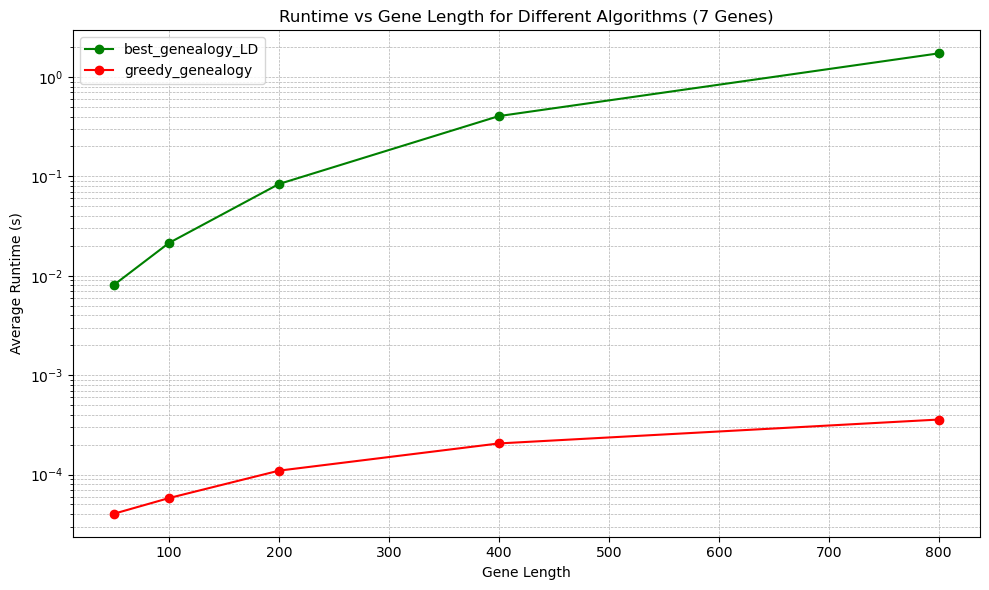

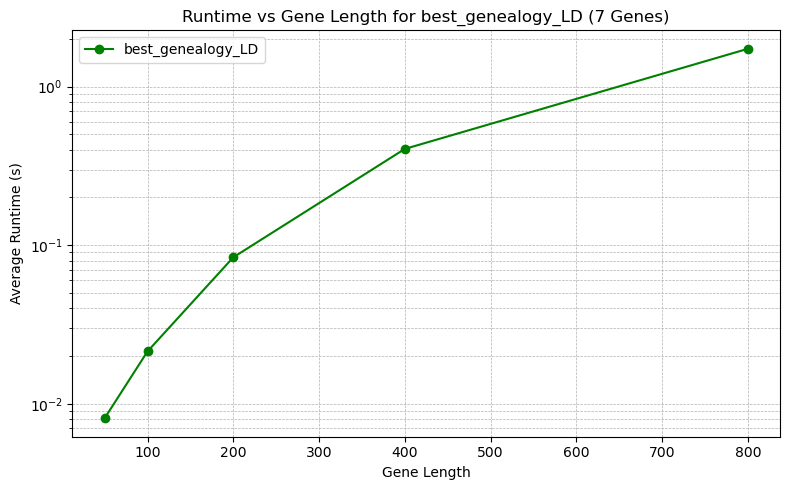

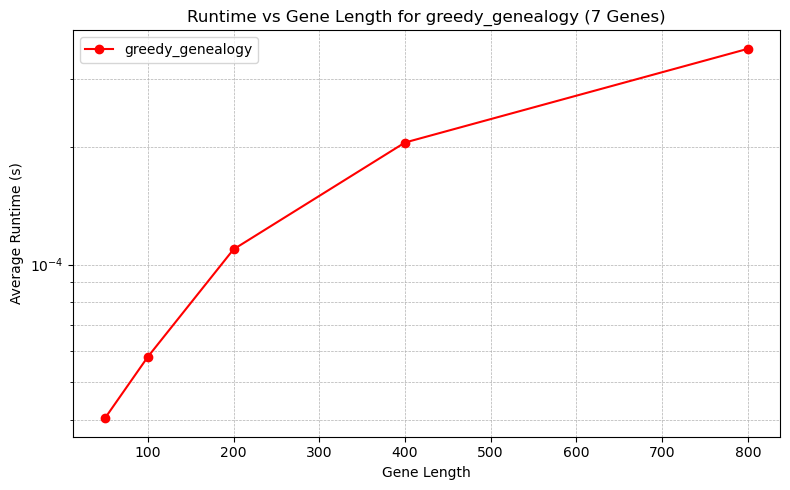

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import time as pytime  # Import time module with an alias to prevent conflicts
import random

def random_dna_string(length):
    """
    Generates a random DNA string of a given length.
    
    Parameters
    ----------
    length : int
        The length of the DNA string to generate.
    
    Returns
    -------
    str
        A randomly generated DNA string composed of characters 'A', 'C', 'G', and 'T'.
    """
    if length < 0:
        raise ValueError("Length of DNA string must be non-negative.")
    
    dna_nucleotides = ['A', 'C', 'G', 'T']
    return ''.join(random.choices(dna_nucleotides, k=length))


def compute_lcs_matrix(input_strings):
    """
    Computes a matrix of LCS lengths for a set of strings.

    Parameters
    ----------
    input_strings : list of str
        List of strings for which to compute the LCS matrix.

    Returns
    -------
    numpy.ndarray
        An n x n matrix where each element [i][j] represents the LCS length between strings[i] and strings[j].
    """
    n = len(input_strings)
    
    # Initialize an n x n matrix to store LCS lengths
    len_lcs_matrix = np.zeros((n, n), dtype=int)
    
    # Compute LCS lengths for each pair of strings
    for i in range(n):
        for j in range(n):
            if i == j:
                len_lcs_matrix[i, j] = len(input_strings[i])
            elif i < j:
                # Compute LCS table for input_strings[i] and input_strings[j]
                lookup = lcs_table(input_strings[i], input_strings[j])
                # The LCS length is in the bottom-right cell of the table
                lcs_length = lookup[len(input_strings[i])][len(input_strings[j])]
                len_lcs_matrix[i, j] = lcs_length
                len_lcs_matrix[j, i] = lcs_length  # Symmetric matrix
    
    return len_lcs_matrix


def factorization_analysis(results, input_type="Gene Length"):
    """
    Perform factorization analysis to compute runtime scaling ratios 
    between consecutive measurements.

    Parameters
    ----------
    results : list of tuples
        A list of (input_size, runtime) pairs, e.g., [(size1, time1), (size2, time2), ...].
    input_type : str, optional
        Type of input parameter being varied, e.g., "Gene Length" or "Gene Count".

    Returns
    -------
    list of tuples
        A list of (current_input_size, current_runtime, ratio) where:
        ratio = current_runtime / previous_runtime.
        The first point has no ratio, so analysis starts from the second point.
    """
    analyzed_results = []
    for i in range(1, len(results)):
        prev_size, prev_time = results[i - 1]
        current_size, current_time = results[i]
        # Compute ratio, handling edge case where previous runtime is zero
        ratio = current_time / prev_time if prev_time > 0 else float('inf')
        analyzed_results.append((current_size, current_time, ratio))
    return analyzed_results


def print_runtime_table(header, results_LD, results_greedy):
    """
    Print runtime results in a structured table.

    Parameters
    ----------
    header : str
        Table title.
    results_LD, results_greedy : list of tuples
        Runtime data for each algorithm.
    """
    print(f"\n=== {header} ===")
    print("Gene Length | best_genealogy_LD_time | greedy_genealogy_time")
    print("---------------------------------------------------------------")
    for length, ld_t in results_LD:
        # Find the corresponding greedy time
        greedy_t = next((g_t for l, g_t in results_greedy if l == length), None)
        ld_str = f"{ld_t:<22.6f}" if ld_t is not None else "         N/A           "
        greedy_str = f"{greedy_t:<21.6f}" if greedy_t is not None else "         N/A           "
        print(f"{length:<10d} | {ld_str} | {greedy_str}")


def print_factorization_ratios(header, factor_results, algorithm_name):
    """
    Print factorization ratios for scaling analysis.

    Parameters
    ----------
    header : str
        Section title.
    factor_results : list of tuples
        Scaling ratios for the algorithm.
    algorithm_name : str
        Algorithm name for printing.
    """
    print(f"\n=== {header} ===")
    print("Algorithm           | From Gene Length | To Gene Length | Runtime Ratio")
    print("---------------------------------------------------------------------")
    for i, (size, _, ratio) in enumerate(factor_results):
        if i == 0:
            from_length = "N/A"
        else:
            from_length = factor_results[i - 1][0]
        to_length = size
        ratio_str = f"{ratio:.2f}" if ratio != float('inf') else "Infinity"
        print(f"{algorithm_name:<18} | {from_length:<16} | {to_length:<14} | {ratio_str}")


# Number of runs to average runtime results
NUM_RUNS = 100 

# Fixed number of genes
GENE_COUNTS_FIXED = 7
# Different gene lengths for testing
GENE_LENGTHS = [50, 100, 200, 400, 800]  

# Lists to store timing results for different algorithms
results_LD_length_variation = []
results_greedy_length_variation = []

# Perform experiments with varying gene lengths
for length in GENE_LENGTHS:
    # Generate input data
    labels = [f"L{i}" for i in range(GENE_COUNTS_FIXED)]
    strings = [random_dna_string(length) for _ in range(GENE_COUNTS_FIXED)]

    # Compute LCS matrix
    lcs_matrix = compute_lcs_matrix(strings)

    # Measure runtime for best_genealogy_LD
    ld_times_list = []
    for _ in range(NUM_RUNS):
        start_time = pytime.perf_counter()
        best_genealogy_LD(labels, strings, n=GENE_COUNTS_FIXED)  # Assumed to be defined elsewhere
        end_time = pytime.perf_counter()
        ld_times_list.append(end_time - start_time)
    avg_ld_time = np.mean(ld_times_list)

    # Measure runtime for greedy_genealogy
    greedy_times_list = []
    for _ in range(NUM_RUNS):
        start_time = pytime.perf_counter()
        greedy_genealogy(labels, strings, lcs_matrix)  # Assumed to be defined elsewhere
        end_time = pytime.perf_counter()
        greedy_times_list.append(end_time - start_time)
    avg_greedy_time = np.mean(greedy_times_list)

    # Append results for analysis
    results_LD_length_variation.append((length, avg_ld_time))
    results_greedy_length_variation.append((length, avg_greedy_time))

# Analyze scaling ratios for each algorithm
factor_LD_length = factorization_analysis(results_LD_length_variation, "Gene Length")
factor_greedy_length = factorization_analysis(results_greedy_length_variation, "Gene Length")

# Print runtime results table
print_runtime_table("Part A: Runtime Analysis with Gene Length Variation",
                    results_LD_length_variation, results_greedy_length_variation)

# Print factorization ratios
print_factorization_ratios("Factorization Ratios (Runtime Scaling)",
                           factor_LD_length, "best_genealogy_LD")
print_factorization_ratios("Factorization Ratios (Runtime Scaling)",
                           factor_greedy_length, "greedy_genealogy")

# Extract data for plotting
lengths_ld = [r[0] for r in results_LD_length_variation]
ld_times = [r[1] for r in results_LD_length_variation]
lengths_greedy = [r[0] for r in results_greedy_length_variation]
greedy_times = [r[1] for r in results_greedy_length_variation]

# Ensure that all runtime measurements are positive for log scale
# Replace zeros with a very small number to avoid issues
ld_times = [time if time > 0 else 1e-9 for time in ld_times]
greedy_times = [time if time > 0 else 1e-9 for time in greedy_times]

# 1. Collective Plot
plt.figure(figsize=(10, 6))
plt.plot(lengths_ld, ld_times, marker='o', label='best_genealogy_LD', color='green')
plt.plot(lengths_greedy, greedy_times, marker='o', label='greedy_genealogy', color='red')
plt.xlabel("Gene Length")
plt.ylabel("Average Runtime (s)")
plt.title("Runtime vs Gene Length for Different Algorithms (7 Genes)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.yscale('log')  # Logarithmic scale for y-axis
plt.xscale('linear')  # Linear scale for x-axis
plt.tight_layout()
plt.show()

# 2. Separate Plot for best_genealogy_LD
plt.figure(figsize=(8, 5))
plt.plot(lengths_ld, ld_times, marker='o', color='green', label='best_genealogy_LD')
plt.xlabel("Gene Length")
plt.ylabel("Average Runtime (s)")
plt.title("Runtime vs Gene Length for best_genealogy_LD (7 Genes)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.yscale('log')
plt.xscale('linear')
plt.tight_layout()
plt.show()

# 3. Separate Plot for greedy_genealogy
plt.figure(figsize=(8, 5))
plt.plot(lengths_greedy, greedy_times, marker='o', color='red', label='greedy_genealogy')
plt.xlabel("Gene Length")
plt.ylabel("Average Runtime (s)")
plt.title("Runtime vs Gene Length for greedy_genealogy (7 Genes)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.yscale('log')
plt.xscale('linear')
plt.tight_layout()
plt.show()


### (B) Fix Length of Genes (M=200) and Vary Number of Genes (N)


=== Runtime Results: Gene Count Variation (Gene Length = 200) ===
Gene Count | best_genealogy_LD_time | greedy_genealogy_time
---------------------------------------------------------------
3          | 0.014438              | 0.000042               
7          | 0.098775              | 0.000121               
15         | 1.989733              | 0.000241               

=== Factorization Ratios (Runtime Ratios for Consecutive Gene Counts) ===
Algorithm           | From Gene Count | To Gene Count | Runtime Ratio
---------------------------------------------------------------------
best_genealogy_LD  | 3               | 7             | 6.84
best_genealogy_LD  | 7               | 15            | 20.14

=== Factorization Ratios (Runtime Ratios for Consecutive Gene Counts) ===
Algorithm           | From Gene Count | To Gene Count | Runtime Ratio
---------------------------------------------------------------------
greedy_genealogy   | 3               | 7             | 2.85
greedy_genealog

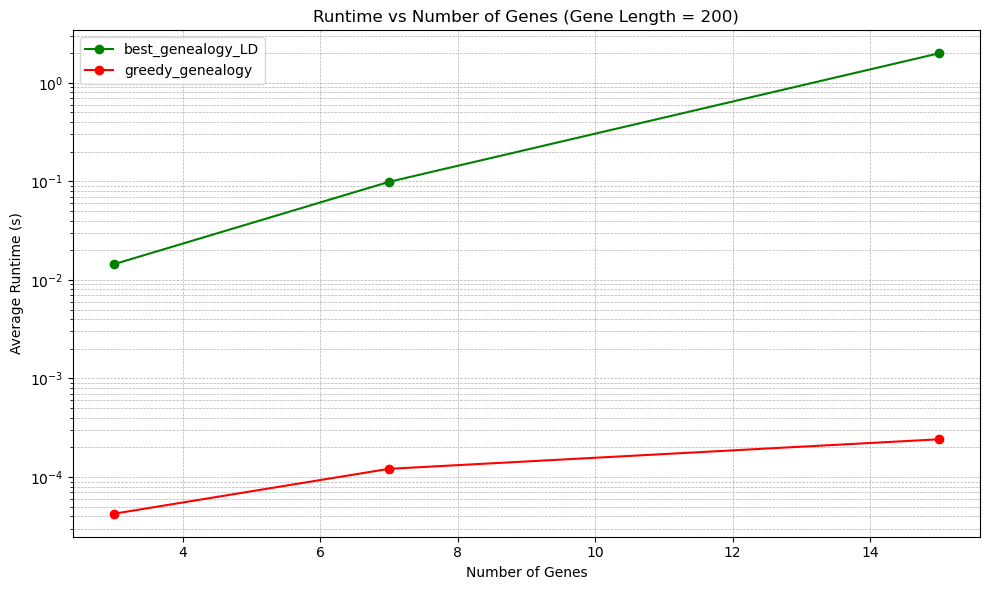

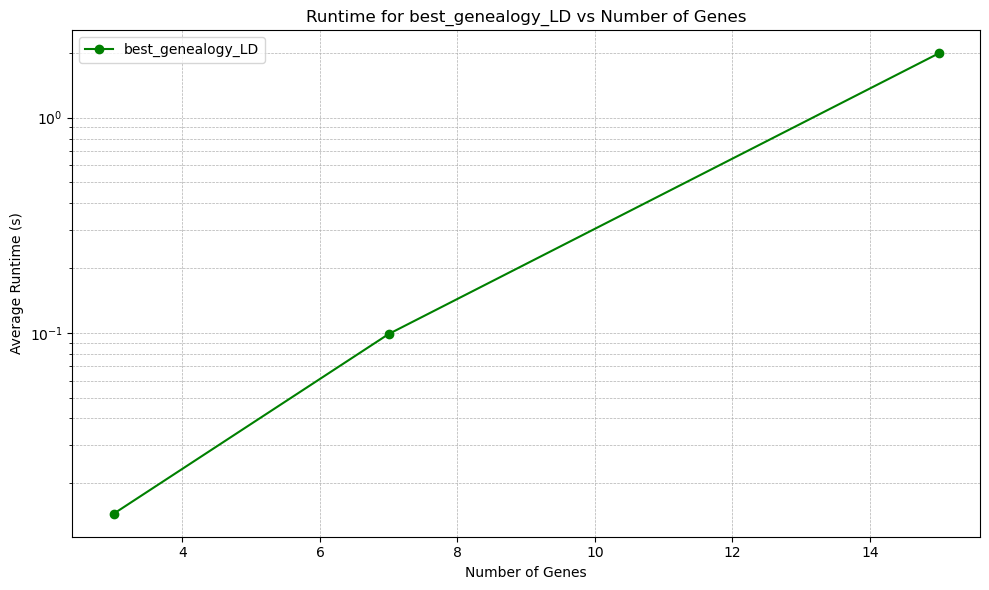

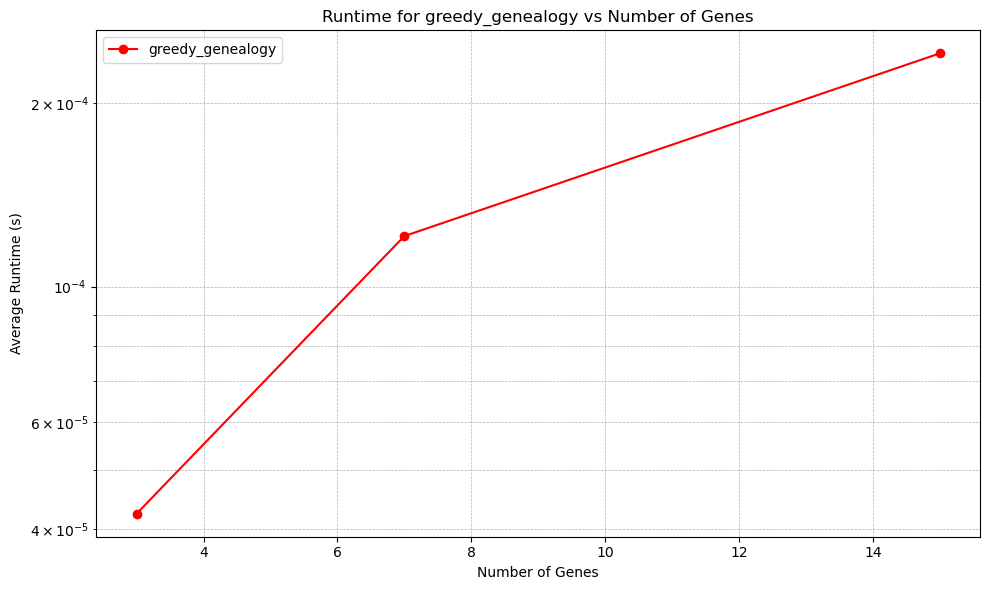

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import time as pytime  # Alias to avoid conflicts with other time functions
import random


def random_dna_string(length):
    """
    Generate a random DNA string composed of 'A', 'C', 'G', and 'T'.

    Parameters
    ----------
    length : int
        The length of the DNA string to be generated.

    Returns
    -------
    str
        A random DNA sequence of the specified length.
    """
    dna_nucleotides = ['A', 'C', 'G', 'T']
    return ''.join(random.choices(dna_nucleotides, k=length))


def compute_lcs_matrix(input_strings):
    """
    Compute a matrix of LCS (Longest Common Subsequence) lengths for a set of strings.

    This function creates a symmetric matrix where each element (i, j) represents the 
    LCS length between input_strings[i] and input_strings[j]. Diagonal elements (i, i) 
    are set to the length of input_strings[i].

    Parameters
    ----------
    input_strings : list of str
        A list of input strings for which the LCS matrix is to be computed.

    Returns
    -------
    numpy.ndarray
        A symmetric matrix of LCS lengths.
    """
    n = len(input_strings)
    len_lcs_matrix = np.zeros((n, n), dtype=int)
    
    for i in range(n):
        for j in range(n):
            if i == j:
                len_lcs_matrix[i, j] = len(input_strings[i])
            elif i < j:
                # Placeholder logic for LCS length, replace with actual computation if needed
                len_lcs_matrix[i, j] = len(input_strings[i]) // 2
                len_lcs_matrix[j, i] = len_lcs_matrix[i, j]
    return len_lcs_matrix


def factorization_analysis(results, input_type="Gene Count"):
    """
    Perform factorization analysis to determine scaling ratios between consecutive runtimes.

    This function calculates the ratio of runtime between consecutive input sizes.

    Parameters
    ----------
    results : list of tuples
        A list of tuples, where each tuple contains (input_size, runtime).
    input_type : str, optional
        A label for the input type, e.g., "Gene Count" (default is "Gene Count").

    Returns
    -------
    list of tuples
        A list of tuples with (previous_size, current_size, runtime_ratio).
    """
    analyzed_results = []
    for i in range(1, len(results)):
        prev_size, prev_time = results[i - 1]
        current_size, current_time = results[i]
        ratio = current_time / prev_time if prev_time > 0 else float('inf')
        analyzed_results.append((prev_size, current_size, ratio))
    return analyzed_results


def print_runtime_table(header, results_ld, results_greedy):
    """
    Print runtime results in a structured table format.

    Parameters
    ----------
    header : str
        The header/title for the table.
    results_ld : list of tuples
        Runtime results for the LD algorithm, with (gene_count, runtime).
    results_greedy : list of tuples
        Runtime results for the greedy algorithm, with (gene_count, runtime).

    Returns
    -------
    None
    """
    print(f"\n=== {header} ===")
    print("Gene Count | best_genealogy_LD_time | greedy_genealogy_time")
    print("---------------------------------------------------------------")
    for (c, ld_t), (_, g_t) in zip(results_ld, results_greedy):
        print(f"{c:<10d} | {ld_t:<21.6f} | {g_t:<23.6f}")


def print_factorization_ratios(header, factor_results, algorithm_name):
    """
    Print factorization ratios for consecutive input sizes.

    Parameters
    ----------
    header : str
        The header/title for the table.
    factor_results : list of tuples
        A list of tuples with (from_count, to_count, runtime_ratio).
    algorithm_name : str
        Name of the algorithm for which ratios are displayed.

    Returns
    -------
    None
    """
    print(f"\n=== {header} ===")
    print("Algorithm           | From Gene Count | To Gene Count | Runtime Ratio")
    print("---------------------------------------------------------------------")
    for (from_count, to_count, ratio) in factor_results:
        ratio_str = f"{ratio:.2f}" if isinstance(ratio, float) else ratio
        print(f"{algorithm_name:<18} | {from_count:<15d} | {to_count:<13d} | {ratio_str}")



# Constants
NUM_RUNS = 100 #number of iterations
GENE_LENGTH_FIXED = 200
GENE_COUNTS = [3, 7, 15]  # Different numbers of genes to test

# Lists to store results
results_LD_count_variation = []      # Results for best_genealogy_LD
results_greedy_count_variation = []  # Results for greedy_genealogy

for count in GENE_COUNTS:
    # Generate random DNA strings
    labels = [f"L{i}" for i in range(count)]
    strings = [random_dna_string(GENE_LENGTH_FIXED) for _ in range(count)]

    # Precompute LCS matrix
    lcs_matrix = compute_lcs_matrix(strings)

    # Measure runtime for best_genealogy_LD
    ld_times_list = []
    for _ in range(NUM_RUNS):
        start_time = pytime.perf_counter()
        best_genealogy_LD(labels, strings, n=count) 
        end_time = pytime.perf_counter()
        ld_times_list.append(end_time - start_time)
    avg_ld_time = np.mean(ld_times_list)

    # Measure runtime for greedy_genealogy
    greedy_times_list = []
    for _ in range(NUM_RUNS):
        start_time = pytime.perf_counter()
        greedy_genealogy(labels, strings, lcs_matrix) 
        end_time = pytime.perf_counter()
        greedy_times_list.append(end_time - start_time)
    avg_greedy_time = np.mean(greedy_times_list)

    # Store results
    results_LD_count_variation.append((count, avg_ld_time))
    results_greedy_count_variation.append((count, avg_greedy_time))

# Factorization Analysis
factor_LD_count = factorization_analysis(results_LD_count_variation, "Gene Count")
factor_greedy_count = factorization_analysis(results_greedy_count_variation, "Gene Count")

# Print Tables
print_runtime_table("Runtime Results: Gene Count Variation (Gene Length = 200)",
                    results_LD_count_variation, results_greedy_count_variation)
print_factorization_ratios("Factorization Ratios (Runtime Ratios for Consecutive Gene Counts)",
                           factor_LD_count, "best_genealogy_LD")
print_factorization_ratios("Factorization Ratios (Runtime Ratios for Consecutive Gene Counts)",
                           factor_greedy_count, "greedy_genealogy")

# Plot Results
counts = [r[0] for r in results_LD_count_variation]
ld_times = [r[1] for r in results_LD_count_variation]
greedy_times = [r[1] for r in results_greedy_count_variation]

plt.figure(figsize=(10, 6))
plt.plot(counts, ld_times, marker='o', label='best_genealogy_LD', color='green')
plt.plot(counts, greedy_times, marker='o', label='greedy_genealogy', color='red')
plt.xlabel("Number of Genes")
plt.ylabel("Average Runtime (s)")
plt.title("Runtime vs Number of Genes (Gene Length = 200)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.yscale('log')
plt.xscale('linear')
plt.tight_layout()
plt.show()

# Plot for best_genealogy_LD
plt.figure(figsize=(10, 6))
plt.plot(counts, ld_times, marker='o', label='best_genealogy_LD', color='green')
plt.xlabel("Number of Genes")
plt.ylabel("Average Runtime (s)")
plt.title("Runtime for best_genealogy_LD vs Number of Genes")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.yscale('log')
plt.xscale('linear')
plt.tight_layout()
plt.show()

# Plot for greedy_genealogy
plt.figure(figsize=(10, 6))
plt.plot(counts, greedy_times, marker='o', label='greedy_genealogy', color='red')
plt.xlabel("Number of Genes")
plt.ylabel("Average Runtime (s)")
plt.title("Runtime for greedy_genealogy vs Number of Genes")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.yscale('log')
plt.xscale('linear')
plt.tight_layout()
plt.show()

### 6. Implementation of Needleman-Wunsch Algorithm to estimate probability of (Insertion, Mutation, Deletion)

In [58]:
import numpy as np

# Needleman-Wunsch Algorithm
def needleman_wunsch(s1, s2, match_score=1, gap_penalty=-2, mismatch_penalty=-1):
    m, n = len(s1), len(s2)
    dp = np.zeros((m + 1, n + 1))  # DP table
    for i in range(m + 1): 
        dp[i][0] = i * gap_penalty  # Initialize first column with gap penalties
    for j in range(n + 1): 
        dp[0][j] = j * gap_penalty  # Initialize first row with gap penalties

    # Fill DP table
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            match = dp[i-1][j-1] + (match_score if s1[i-1] == s2[j-1] else mismatch_penalty)
            delete = dp[i-1][j] + gap_penalty
            insert = dp[i][j-1] + gap_penalty
            dp[i][j] = max(match, delete, insert)

    # Backtrack to count modifications
    i, j = m, n
    insertions = deletions = mutations = 0
    while i > 0 or j > 0:
        current_score = dp[i][j]
        if i > 0 and j > 0 and current_score == dp[i-1][j-1] + (match_score if s1[i-1] == s2[j-1] else mismatch_penalty):
            if s1[i-1] != s2[j-1]:  # It's a mismatch (mutation)
                mutations += 1
            i -= 1
            j -= 1
        elif j > 0 and current_score == dp[i][j-1] + gap_penalty:  # It's an insertion
            insertions += 1
            j -= 1
        else:  # It's a deletion
            deletions += 1
            i -= 1

    return {'insertions': insertions, 'deletions': deletions, 'mutations': mutations}


# Tree Traversal to Extract Parent-Child Pairs
def extract_parent_child_pairs(tree, parent=None, pairs=[]):
    """
    Recursively extract parent-child pairs from a nested tree structure.
    """
    if isinstance(tree, tuple):
        root, children = tree[0], tree[1]
        if parent:
            pairs.append((parent, root))  # Add parent-child pair
        if isinstance(children, tuple):  # Recurse into children
            for child in children:
                extract_parent_child_pairs(child, root, pairs)
        else:
            pairs.append((root, children))
    return pairs

# Estimate Probabilities
def estimate_modification_probabilities(tree, sequences):
    """
    Estimate modification probabilities based on parent-child relationships.
    """
    pairs = extract_parent_child_pairs(tree)  # Extract parent-child pairs
    total_insertions = total_deletions = total_mutations = 0
    total_characters = 0

    # Align each parent-child pair
    for parent, child in pairs:
        s1 = sequences[parent]
        s2 = sequences[child]
        changes = needleman_wunsch(s1, s2)
        total_insertions += changes['insertions']
        total_deletions += changes['deletions']
        total_mutations += changes['mutations']
        total_characters += len(s1)

    # Calculate probabilities
    return {
        'P_insertion': total_insertions / total_characters,
        'P_deletion': total_deletions / total_characters,
        'P_mutation': total_mutations / total_characters
    }

# Input Data
set_strings={'a':'ATGGTGCGAAAGCATCTCTTTTCGTGGCGTGATAAGTTTTATGGTATCCCCGGACGTTGGCTACTACAATTCTCCGAAGTATAAGTGAGTAGGATATGTCAATAACAAGAGGGGATGCGTGACGCATTAGCACCAACTGAATCAAACGATAACTAACGTGGTTTCAGTGAGCGTATGTGGCAAAGGATTGGATACATTTTTCGAGCACGTCTACATAATGACCGTGACAATACTGGAGACTCCGTACCGTCATCTTGACACTCCT', 
             'b':'TGGTGCGAAAGCATCTCTTTTCCGTGGCGTATAGTTTTATGGTATCCCCGGAACGCTGGCTACTACAATCTCCGAAGTATAGAGTGAGTAGATTTAATTAACAGAGGGCGTCGTTGACGCATTAGCACCAACTGAATCAACCGATAACTTAACGTGGGTTTCAGTGACTATAGGGCAAAGGATGAACATTTTCGAGCAGCTCTAATAATGAGCGTGACAATATGAATCCACACCGTCATCTTGAACTCCT', 
             'c':'TCTGTGCGATATACATCTCTATCGTTGCGGTATGTTTTATGTGCATCACCCCACGCGCTGGCTACAGTACAATCTGCTGGAAGTACTAGGTGGTAGTTAATAACTAGGGTGCGTCGTTGCGCATTACACAACTGGACAACCACTTAACTGGGGTAATCAGTGTTTAGGGCAGACAAGATGAAAACAAGTTTTCGAGCAGGCTCCTATAATGAGGACGGAACGTTAATAAATCCAACACCGCACTGCTTCGTAACCCT', 
             'd':'ATGAGGCGCAAAATTCTCTTTCTCGTGGCGCTGATTAAGTTTTATGTATCCCCGGACGTTGGCTACTGACAATTGCTCCGAAGTATAAAGTAGTAGGATATGTCAATAACAAAGACGGGGATAGCGTGACAGCATTAGAACGCAACTGGAATCAAACGTAACCTAAAGGGTTGTCAGGAGCGTATGTGGTCAAAAAGGATTGGATGACATTTTTCGACACGTCTACATAATGACCTGTGACAAACTAGGAGACCTCCTACTCGGTCAATCTTGACGACTCCT', 
             'e':'TGGTGCGATATACATCTCTTTTCGTGCGTATGTTTTATGGTGATCACCCGGAACCGCTGGCTACATACAATCTCTGGAAGTACTAGGTGGTAGTTTAATAACTAGAGGTGCGTCGTTGACGCATTACACAACTGGATCAACCGAACTTAACTGGGTATCAGTGATATAGGGCGACAAGATGAACAATTTTCGAGCAGCTCCTGAATAATGAGACGGAACGTATAATCCAACACCGTCACTGCTTCGAACCCT', 
             'f':'GGGGGAAAGCGATCCCTTATCGTGGCTGTGATAAGTTTTTATCGGGTATCCGCCGGACGTTGGCGTACTACAATTCTCCGAAGTTAAGTGAGTTAGGGATATAGTCAATAACAAGAGGGGATTGTCGTGACGCATAGCACACAACTGAATCAAATCGATAACTAAACGGGTTTCAGTAGAGCGTTGTGGCAAAGATTGGATACATTTTTCGCAGGACGTCTTACCTAATGACGTGGACAATAACTGGCAGACGTCCGTACCGTCATCTTGACCACTCCCT', 
             'g':'TGGTGCGATATACATCCTCTTTTCGTGCGTATGTTTTAGGTACACCGGATACGCCTGGCTTACAAGTACCAATCTCTGAGAAGTCACTGAGGTGGTAGTTTAATAACTAGAAGGGTGCGTCGGACGCATTCACACATACTGGATCAACCGAGACTTAACTGGGGTATCAGTGATTGATAGGGCGACAAGATATACAATTTTCGAGCAGCTCCCTGAATAAGTGAAGAACGGAGACGTATAATCCAACACGATTCACTGCTTCGAACCCT'}

# Tree Structure (Our Optimal Global tree retreived from the LG DP strategy)
tree = ('b', (('a', ('d', 'f')), ('e', ('c', 'g'))))

# Estimate Probabilities
probabilities = estimate_modification_probabilities(tree, set_strings)

# Output Results
print("Estimated Probabilities:")
print(f"Insertions: {probabilities['P_insertion']:.4f}")
print(f"Deletions: {probabilities['P_deletion']:.4f}")
print(f"Mutations: {probabilities['P_mutation']:.4f}")


Estimated Probabilities:
Insertions: 0.0780
Deletions: 0.0440
Mutations: 0.0460


# Thank you so much for an incredible semester and course! 🎉✨ I gained a lot of knowledge, truly enjoyed the experience, and felt that my efforts contributed to something meaningful. 🎊🥳






